In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold, cross_val_score
seed = 10
num_folds=10
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import silhouette_score, mean_absolute_error
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from statsmodels.api import OLS

In [2]:
# Importing the data set
data = pd.read_csv('concrete.csv')
data.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [3]:
# meanings of independent variables:

# 0) cement: amount of cement added to the concrete in kg/m3
# 1) slag: is a component mixed with cement to increase it strength and resistance to chemical attacks
# 2) fly ash : it is another component added with cement to increase its properties
# 3) water: is also another component that is added with cement for hardening
# 4) superplastic: it is added with cement to control the compressive strength 
# 5) coarseagg: these are larger particles that are added to the concrete to reduce shrinkage. For eg: granules
# 6) fineagg: finen aggregates are components that are added aling with coarse aggregate to tackle shrinkage and reduce the overall
# amount of cement needed
# 7) age: It is the number of days they left the concrete to dry out, before the strength was measured

# Performing EDA

In [4]:
data.shape

(1030, 9)

In [5]:
data.dtypes
# All the data are of float except for 'age', which is of integer type

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [6]:
data.isnull().sum()
# no NAN entries

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [7]:
print("The number of null entries in: \n")
for i in data.columns:
    print("{} : {}".format(i,(data[i]==0).sum()))
    
# Although there are no null entries, the number of '0' entries is a lot. However, these 0's cannot be considered as null entries
# because it is possible that the amount of slag, super plastic and fly ash 'added' might actually be 'zero'

# Therefore NO ACTION is taken against these 'zero values'

The number of null entries in: 

cement : 0
slag : 471
ash : 566
water : 0
superplastic : 379
coarseagg : 0
fineagg : 0
age : 0
strength : 0


In [8]:
for i in data.columns:
    print("The Q1 of {} is {:.3f} \nThe Q2 of {} is {:.3f} \nThe Q3 of {} is {:.3f}\n".format(i,np.percentile(data[i],25),i,np.percentile(data[i],50),i,np.percentile(data[i],75)))

The Q1 of cement is 192.375 
The Q2 of cement is 272.900 
The Q3 of cement is 350.000

The Q1 of slag is 0.000 
The Q2 of slag is 22.000 
The Q3 of slag is 142.950

The Q1 of ash is 0.000 
The Q2 of ash is 0.000 
The Q3 of ash is 118.300

The Q1 of water is 164.900 
The Q2 of water is 185.000 
The Q3 of water is 192.000

The Q1 of superplastic is 0.000 
The Q2 of superplastic is 6.400 
The Q3 of superplastic is 10.200

The Q1 of coarseagg is 932.000 
The Q2 of coarseagg is 968.000 
The Q3 of coarseagg is 1029.400

The Q1 of fineagg is 730.950 
The Q2 of fineagg is 779.500 
The Q3 of fineagg is 824.000

The Q1 of age is 7.000 
The Q2 of age is 28.000 
The Q3 of age is 56.000

The Q1 of strength is 23.710 
The Q2 of strength is 34.445 
The Q3 of strength is 46.135



In [9]:
data.skew()

# Superplastic and slag seems to be somewhat skewed. 
# Age is highly skewed.
# Let's check about this more in the univariate analysis

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

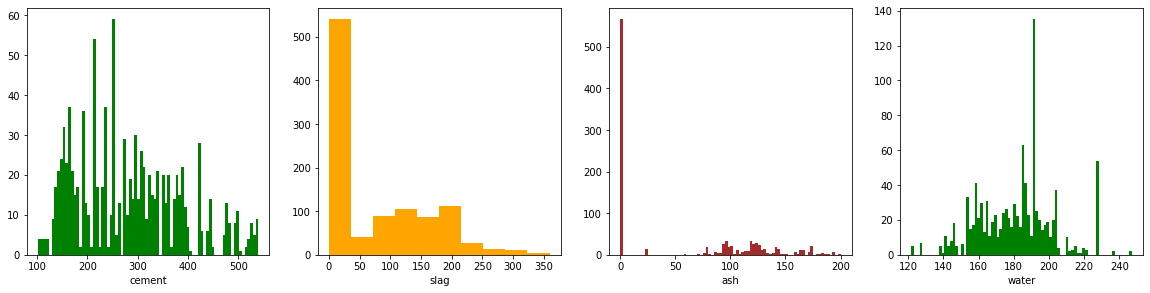

In [10]:
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
plt.hist(data['cement'],color='green',bins=80)
plt.xlabel('cement')

plt.subplot(2,4,2)
plt.hist(data['slag'],color='orange')
plt.xlabel('slag')

plt.subplot(2,4,3)
plt.hist(data['ash'],color='brown',bins=80)
plt.xlabel('ash')

plt.subplot(2,4,4)
plt.hist(data['water'],color='green',bins=80)
plt.xlabel('water')

plt.show()

# cement and water are somewhat normally distributed
# slag and ash are highly skewed toward the right, this is due to the fact that many of it's values are '0'

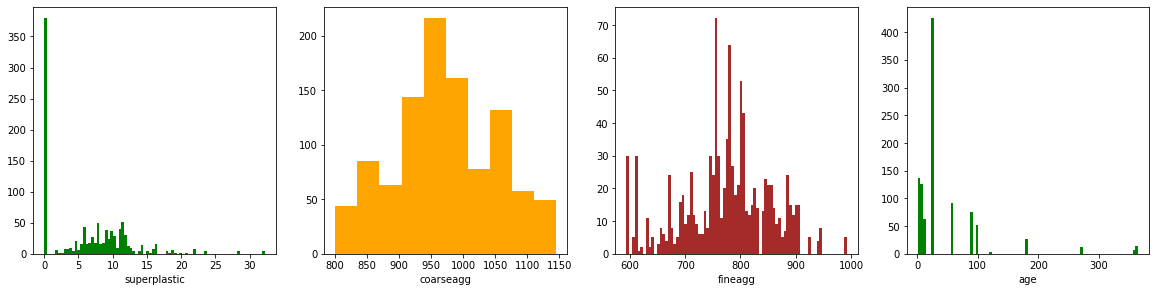

In [11]:
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
plt.hist(data['superplastic'],color='green',bins=80)
plt.xlabel('superplastic')

plt.subplot(2,4,2)
plt.hist(data['coarseagg'],color='orange')
plt.xlabel('coarseagg')

plt.subplot(2,4,3)
plt.hist(data['fineagg'],color='brown',bins=80)
plt.xlabel('fineagg')

plt.subplot(2,4,4)
plt.hist(data['age'],color='green',bins=80)
plt.xlabel('age')

plt.show()

# superplastic and age is highly skewed to the right
# coarseagg and fineagg is normally distributed

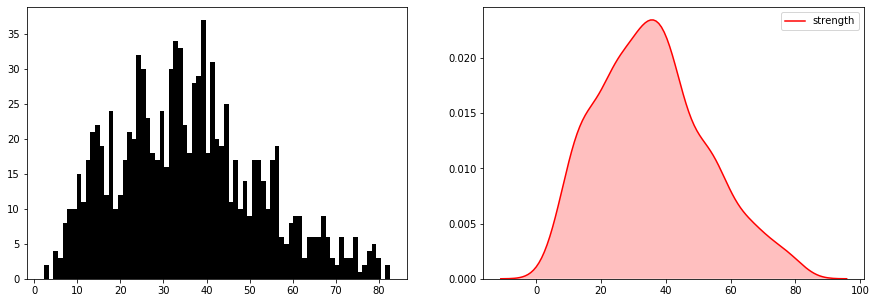

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(data['strength'],color='black',bins=75)


plt.subplot(1,2,2)
sns.kdeplot(data['strength'],color='red',shade=True)
plt.show()
# strength seems to be normally distributed

In [13]:
data_eda = data.copy()

In [14]:
for i in range(0,len(data_eda['age'])):
    if data_eda['age'][i]<=50:
        data_eda['age'][i]='Below 50'
    elif ((data_eda['age'][i]>50) & (data_eda['age'][i]<=100)):
        data_eda['age'][i]='50-100'
    elif ((data_eda['age'][i]>100) & (data_eda['age'][i]<=150)):
        data_eda['age'][i]='100-150'
    elif ((data_eda['age'][i]>150) & (data_eda['age'][i]<=200)):
        data_eda['age'][i]='150-200'
    elif ((data_eda['age'][i]>200) & (data_eda['age'][i]<=250)):
        data_eda['age'][i]='200-250'
    elif ((data_eda['age'][i]>250) & (data_eda['age'][i]<=300)):
        data_eda['age'][i]='250-300'
    elif ((data_eda['age'][i]>300) & (data_eda['age'][i]<=350)):
        data_eda['age'][i]='300-350'
    elif ((data_eda['age'][i]>350) & (data_eda['age'][i]<=400)):
        data_eda['age'][i]='350-400'

D:\Apps\bandi\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Apps\bandi\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\Apps\bandi\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """

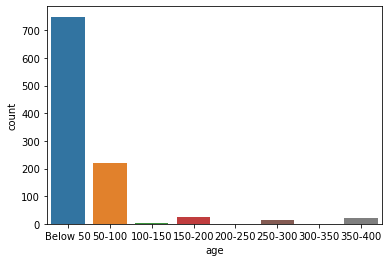

In [15]:
sns.countplot(data_eda['age'], order=['Below 50','50-100','100-150','150-200','200-250','250-300','300-350','350-400'])
plt.show()

# most of the concrete's strength are measured within less than '50 days'

In [16]:
data.describe().T

# The mean of slag is 73,and 3rd quartile is 142. however the max value is 359
# The mean of ash is 54,and 3rd quartile is 118. however the max value is 200
# The mean of superplastic is 6,and 3rd quartile is 10. however the max value is 32
# The mean of age is 45,and 3rd quartile is 56. however the max value is 365

# "which means there is presence of outliers"

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

In [17]:
data.std()

cement          104.506364
slag             86.279342
ash              63.997004
water            21.354219
superplastic      5.973841
coarseagg        77.753954
fineagg          80.175980
age              63.169912
strength         16.705742
dtype: float64

In [18]:
for i in data.columns:
    print("The mean and median of {} is {:.3f} & {} respectively\n".format(i,data[i].mean(),data[i].median()))

The mean and median of cement is 281.168 & 272.9 respectively

The mean and median of slag is 73.896 & 22.0 respectively

The mean and median of ash is 54.188 & 0.0 respectively

The mean and median of water is 181.567 & 185.0 respectively

The mean and median of superplastic is 6.205 & 6.4 respectively

The mean and median of coarseagg is 972.919 & 968.0 respectively

The mean and median of fineagg is 773.580 & 779.5 respectively

The mean and median of age is 45.662 & 28.0 respectively

The mean and median of strength is 35.818 & 34.445 respectively



In [19]:
data.corr()
# None of the independent attributes are highly correlated. Which is good news
# However, there are to attributes which are in "high" correlation with "strength" too

cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275216 -0.397467 -0.081587      0.092386  -0.109349   
slag         -0.275216  1.000000 -0.323580  0.107252      0.043270  -0.283999   
ash          -0.397467 -0.323580  1.000000 -0.256984      0.377503  -0.009961   
water        -0.081587  0.107252 -0.256984  1.000000     -0.657533  -0.182294   
superplastic  0.092386  0.043270  0.377503 -0.657533      1.000000  -0.265999   
coarseagg    -0.109349 -0.283999 -0.009961 -0.182294     -0.265999   1.000000   
fineagg      -0.222718 -0.281603  0.079108 -0.450661      0.222691  -0.178481   
age           0.081946 -0.044246 -0.154371  0.277618     -0.192700  -0.003016   
strength      0.497832  0.134829 -0.105755 -0.289633      0.366079  -0.164935   

               fineagg       age  strength  
cement       -0.222718  0.081946  0.497832  
slag         -0.281603 -0.044246  0.134829  
ash           0.079108 -0.154371 -0.105755  
water        -0.450661  0.277618 -0.289633  
superplastic  0.222691 -0.192700  0.366079  
coarseagg    -0.178481 -0.003016 -0.164935  
fineagg       1.000000 -0.156095 -0.167241  
age          -0.156095  1.000000  0.328873  
strength     -0.167241  0.328873  1.000000

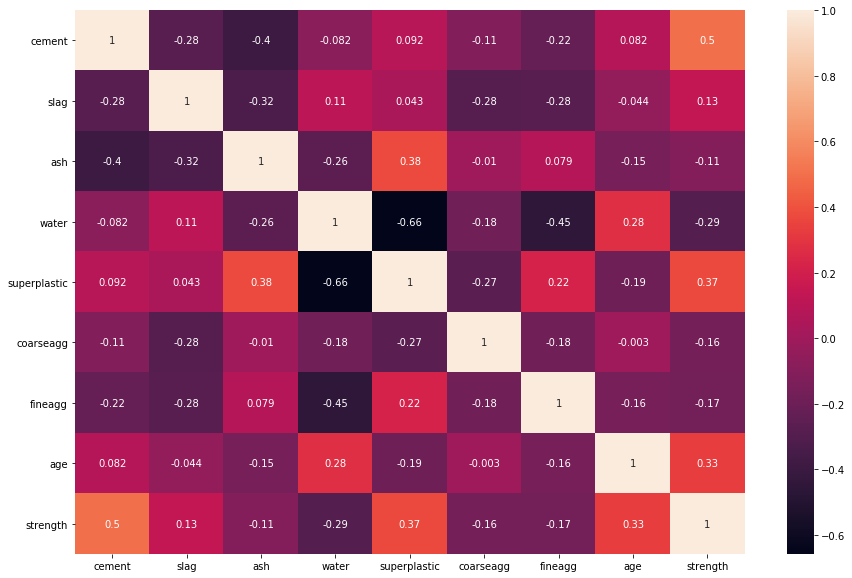

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

# no high correlated attributes
# The highest correlated attribute with 'strength' is 'cement' with a correlation of 0.50
# The second highest would be 'superplastic' with 0.37, followed by 'age' (0.33) and 'water' (0.29)

# Among the independent attributes, 'water' & 'superplastic' seem to be of (0.66), negative correlation
# 'fine agg' and 'water' seem to be negatively correlated (0.45)

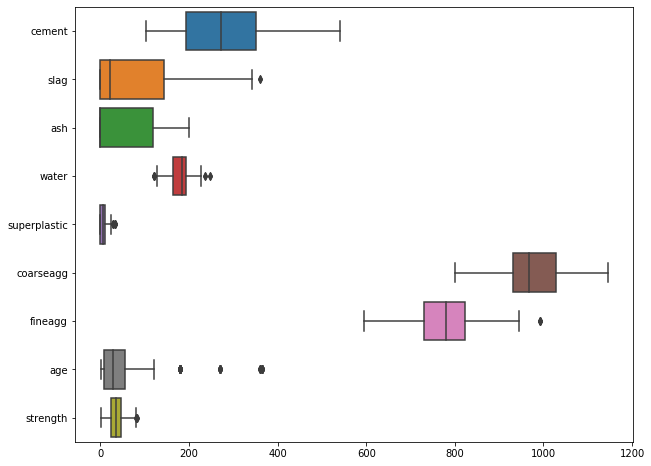

In [21]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data,orient="h")
plt.show()

# Outliers are present in slag, water, superplastic, fineagg, age,strength.

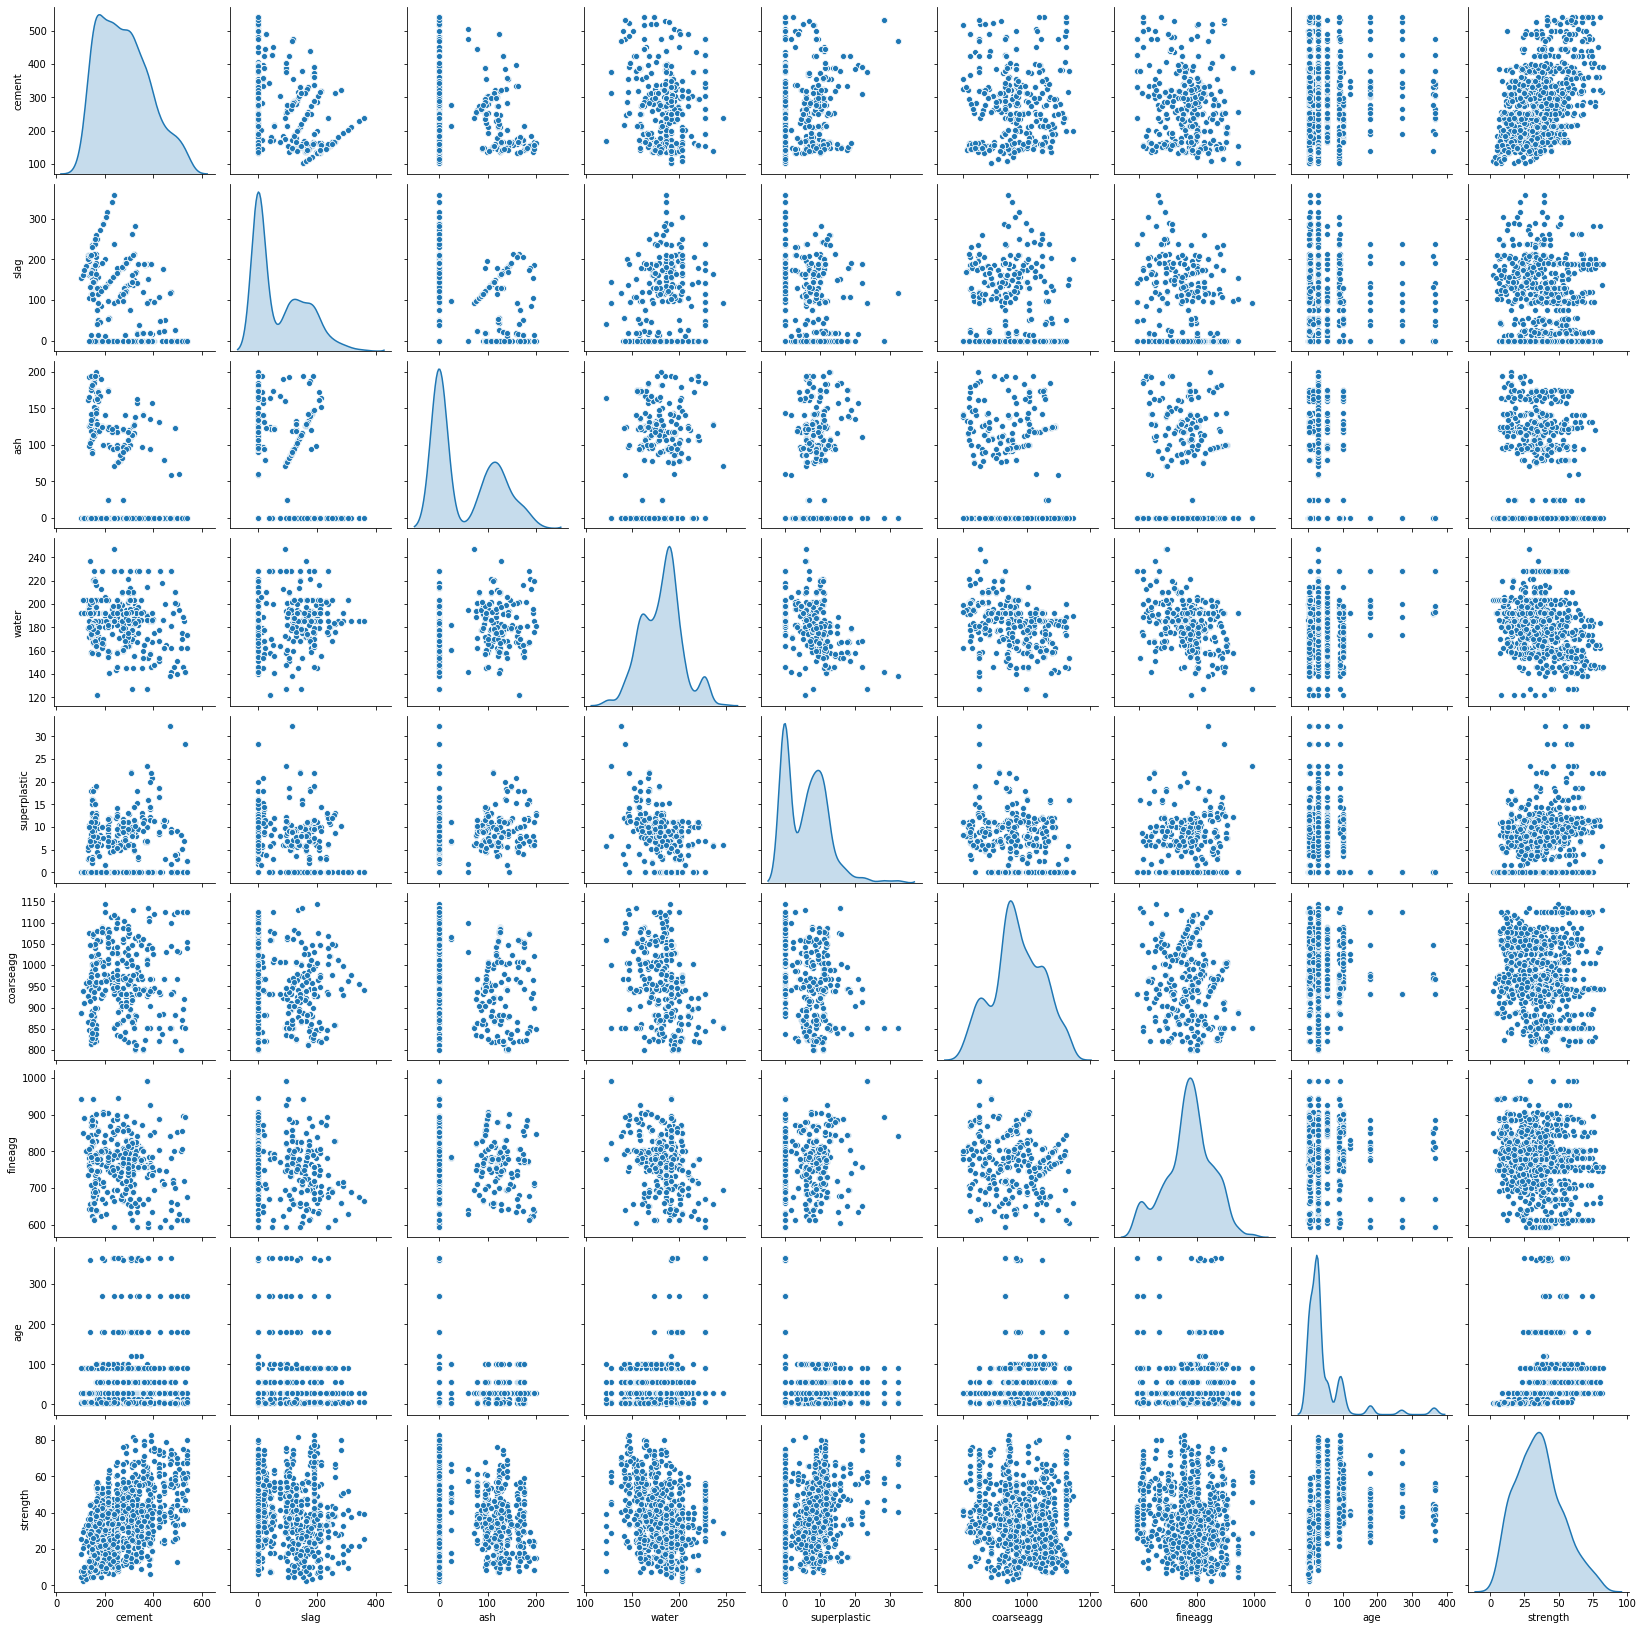

In [22]:
sns.pairplot(data,diag_kind='kde')
plt.show()

# From the scattered points from the below pair-plot, it is kind of clear that all the attributes are not so correlated at all.
# Amongst everything the highly correlated is cement & strength (0.5)

# Also there could be 3 - 15 clusters (there are 3 to 5 gaussians, as observed from the "diag_kde plot")

# Since there are no highly correlated attributes, i am concluding that all the attributes are to be kept for analysis

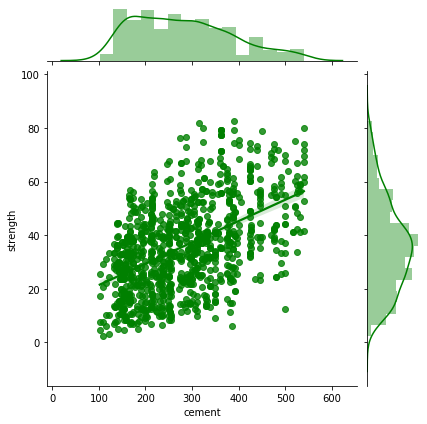

In [23]:
sns.jointplot('cement','strength',data=data,color='green',kind='reg')
plt.show()

# From the below scatter plot, It is clear that, "if more amount of cement is added, the strength is higher"
# In other words, compressive strength of concrete increases with increase in the amount of cement

# Treatment of Outliers

In [24]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3-Q1

In [25]:
data[((data < (Q1-1.5*IQR)) | (data>(Q3+1.5*IQR))).any(axis=1)]

# There are only 89 rows of outliers. 
# It is better to remove them off rather than corrupt the data with imputing the outliers with median values

cement   slag   ash  water  superplastic  coarseagg  fineagg  age  \
44     531.3    0.0   0.0  141.8          28.2      852.1    893.7   91   
51     331.0    0.0   0.0  192.0           0.0      978.0    825.0  180   
64     332.5  142.5   0.0  228.0           0.0      932.0    594.0  365   
66     237.0   92.0  71.0  247.0           6.0      853.0    695.0   28   
93     427.5   47.5   0.0  228.0           0.0      932.0    594.0  180   
...      ...    ...   ...    ...           ...        ...      ...  ...   
995    380.0    0.0   0.0  228.0           0.0      932.0    670.0  365   
1003   323.7  282.8   0.0  183.8          10.3      942.7    659.9   56   
1017   139.6  209.4   0.0  192.0           0.0     1047.0    806.9  180   
1026   531.3    0.0   0.0  141.8          28.2      852.1    893.7    3   
1028   342.0   38.0   0.0  228.0           0.0      932.0    670.0  270   

      strength  
44       59.20  
51       39.00  
64       41.05  
66       28.63  
93       41.84  
...        ...  
995      52.52  
1003     80.20  
1017     44.21  
1026     41.30  
1028     55.06  

[89 rows x 9 columns]

In [26]:
cleandf = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
cleandf.shape

# removing off the values from data which are lesser than "1.5 times the IQR" from "1st quartile" and 
# greater than "1.5 times IQR" from the "3rd quartile"

# which removes off 89 rows. 

(941, 9)

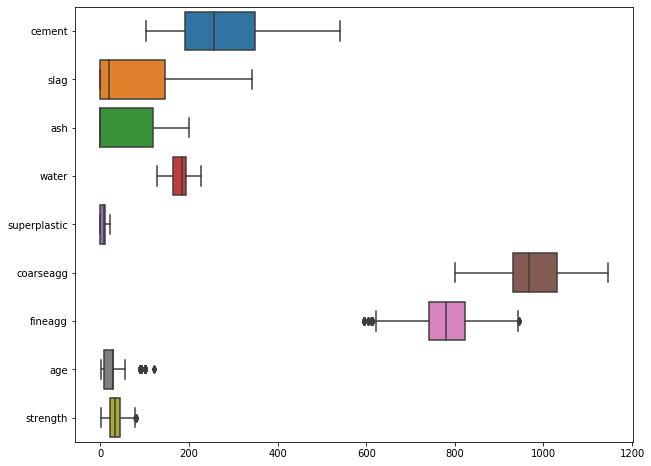

In [27]:
plt.figure(figsize=(10,8))
sns.boxplot(data=cleandf,orient="h")
plt.show()

# The cleaned data and is free of old outliers. 
# However, new outliers are formed

In [28]:
cleandf.describe().T

# Now there is no significant difference between the 75% value and "max" value, as when observed without removing outliers

count        mean         std     min     25%    50%      75%  \
cement        941.0  275.765250  101.888133  102.00  190.30  255.5   349.00   
slag          941.0   73.860680   86.357928    0.00    0.00   20.0   145.00   
ash           941.0   58.019979   64.363959    0.00    0.00    0.0   118.30   
water         941.0  180.618066   18.748963  127.00  164.90  183.8   192.00   
superplastic  941.0    6.247396    5.340911    0.00    0.00    7.0    10.30   
coarseagg     941.0  974.808289   77.646578  801.00  932.00  968.0  1031.00   
fineagg       941.0  776.551860   75.075034  594.00  741.00  780.0   822.20   
age           941.0   32.376196   28.558690    1.00    7.00   28.0    28.00   
strength      941.0   34.887641   16.592538    2.33   22.63   33.4    44.64   

                 max  
cement         540.0  
slag           342.1  
ash            200.1  
water          228.0  
superplastic    22.1  
coarseagg     1145.0  
fineagg        945.0  
age            120.0  
strength        79.4

In [29]:
data_fin = cleandf.copy()
data_fin.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [30]:
data_fin['coarseagg_perkg_of_fineagg'] = data['coarseagg']/data['fineagg']

# since coarse_agg and fine_agg are mixed as an additional compound to fill in the air gaps,
# we can create a composite data, which is a combination of coarseagg and finagg
# It means that, the amount of coarsgeagg added "per kg" of fineagg

In [31]:
data = data_fin.copy()
data = data.drop({'coarseagg','fineagg'},axis=1)

In [32]:
z = data['strength']
data = data.drop('strength',axis=1)
data['strength']=z

In [33]:
data = data.reset_index()
data.drop({'index'},inplace=True,axis=1)
data.head()

cement   slag    ash  water  superplastic  age  coarseagg_perkg_of_fineagg  \
0   141.3  212.0    0.0  203.5           0.0   28                    1.298330   
1   168.9   42.2  124.3  158.3          10.8   14                    1.357448   
2   250.0    0.0   95.7  187.4           5.5   28                    1.111124   
3   266.0  114.0    0.0  228.0           0.0   28                    1.391045   
4   154.8  183.4    0.0  193.3           9.1   28                    1.503373   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [34]:
# For the complexity of the model, a simple linear model would do.

In [35]:
ss1 = StandardScaler()
data_scaled = ss1.fit_transform(data)

In [36]:
from sklearn.cluster import KMeans
cluster_range = range(3,16)   
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5,random_state=seed)
    clusters.fit(data_scaled)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

# From the below data on interia it is clear that the amount of error reduces significantly from 3 to 8. 
# However, after 8,  the inertia is reducing in very small amounts. 
# Hence, we can take the number of clusters to be 8

num_clusters  cluster_errors
0              3     4957.325685
1              4     4309.993113
2              5     3898.941009
3              6     3616.441448
4              7     3383.037800
5              8     3090.333023
6              9     2922.667031
7             10     2763.261379
8             11     2620.133352
9             12     2502.652659
10            13     2436.289391
11            14     2309.029695
12            15     2258.108558

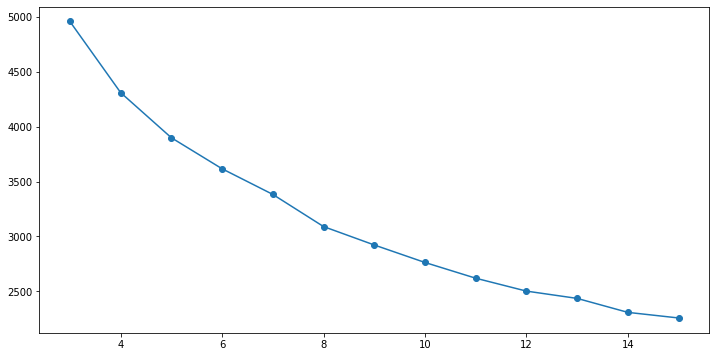

In [37]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# from the below graph it can be seen that the 'arm' bend is around 8. Hence let us try with  8clusters

In [38]:
cluster = KMeans( n_clusters = 8, random_state = seed )
cluster.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [39]:
pd.DataFrame(cluster.cluster_centers_,columns=data.columns)

cement      slag       ash     water  superplastic       age  \
0  1.827938 -0.202363 -0.849063 -0.224333     -0.357855 -0.059225   
1 -0.570946 -0.012127  0.937661  0.648861      0.226899 -0.212674   
2 -0.791717  1.361714 -0.888505  0.625995     -0.730773 -0.522656   
3  1.032841  0.533465 -0.547342 -0.883020      0.956609  0.052397   
4  0.595541 -0.817042 -0.836880  0.627287     -1.099492 -0.563003   
5 -0.404638 -0.650872  1.138279 -0.867262      0.781306 -0.549316   
6  0.010467  0.113028 -0.827733  1.067291     -1.081901  2.034887   
7 -0.551169 -0.607974  1.035652 -0.773296      0.431355  1.650946   

   coarseagg_perkg_of_fineagg  strength  
0                    2.808816  0.966718  
1                   -0.272337 -0.346929  
2                    0.180831 -0.692073  
3                   -0.607144  1.269804  
4                    0.162576 -0.669755  
5                   -0.063396 -0.429759  
6                    0.004062  0.321848  
7                   -0.009493  0.752859

In [40]:
prediction=cluster.predict(data_scaled)
data["GROUP"] = prediction
data

cement   slag    ash  water  superplastic  age  \
0     141.3  212.0    0.0  203.5           0.0   28   
1     168.9   42.2  124.3  158.3          10.8   14   
2     250.0    0.0   95.7  187.4           5.5   28   
3     266.0  114.0    0.0  228.0           0.0   28   
4     154.8  183.4    0.0  193.3           9.1   28   
..      ...    ...    ...    ...           ...  ...   
936   141.3  212.0    0.0  203.5           0.0    7   
937   297.2    0.0  117.5  174.8           9.5    3   
938   135.0    0.0  166.0  180.0          10.0   28   
939   276.4  116.0   90.3  179.6           8.9   28   
940   540.0    0.0    0.0  173.0           0.0    7   

     coarseagg_perkg_of_fineagg  strength  GROUP  
0                      1.298330     29.89      2  
1                      1.357448     23.51      5  
2                      1.111124     29.22      1  
3                      1.391045     45.85      2  
4                      1.503373     18.29      2  
..                          ...       ...    ...  
936                    1.298330     10.39      2  
937                    1.357399     21.91      5  
938                    1.193789     13.29      5  
939                    1.132500     44.28      1  
940                    1.835237     52.61      0  

[941 rows x 9 columns]

# CLUSTER ANALYSIS

In [41]:
data.groupby("GROUP").mean()
# Group 0 has the highest cement level, and is higher strength as well
# Group 2 has low cemnt content and low strength also

# Let us see more in details about the clusters

cement        slag         ash       water  superplastic  \
GROUP                                                                 
0      461.911429   56.394286    3.400000  176.414286      4.337143   
1      217.623567   72.814013  118.339490  192.777070      7.458599   
2      195.141549  191.392958    0.862676  192.348592      2.346479   
3      380.943590  119.905128   22.809615  164.071154     11.353846   
4      336.411565    3.340136    4.183673  192.372789      0.378231   
5      234.559355   17.682581  131.245161  164.366452     10.418065   
6      276.831148   83.616393    4.772131  200.618033      0.472131   
7      219.637500   21.385227  124.643182  166.127273      8.550000   

             age  coarseagg_perkg_of_fineagg   strength  
GROUP                                                    
0      30.685714                    1.769694  50.919429  
1      26.305732                    1.220918  29.134268  
2      17.457746                    1.301630  23.410493  
3      33.871795                    1.161286  55.945705  
4      16.306122                    1.298379  23.780612  
5      16.696774                    1.258132  27.760645  
6      90.459016                    1.270146  40.225082  
7      79.500000                    1.267732  47.372841

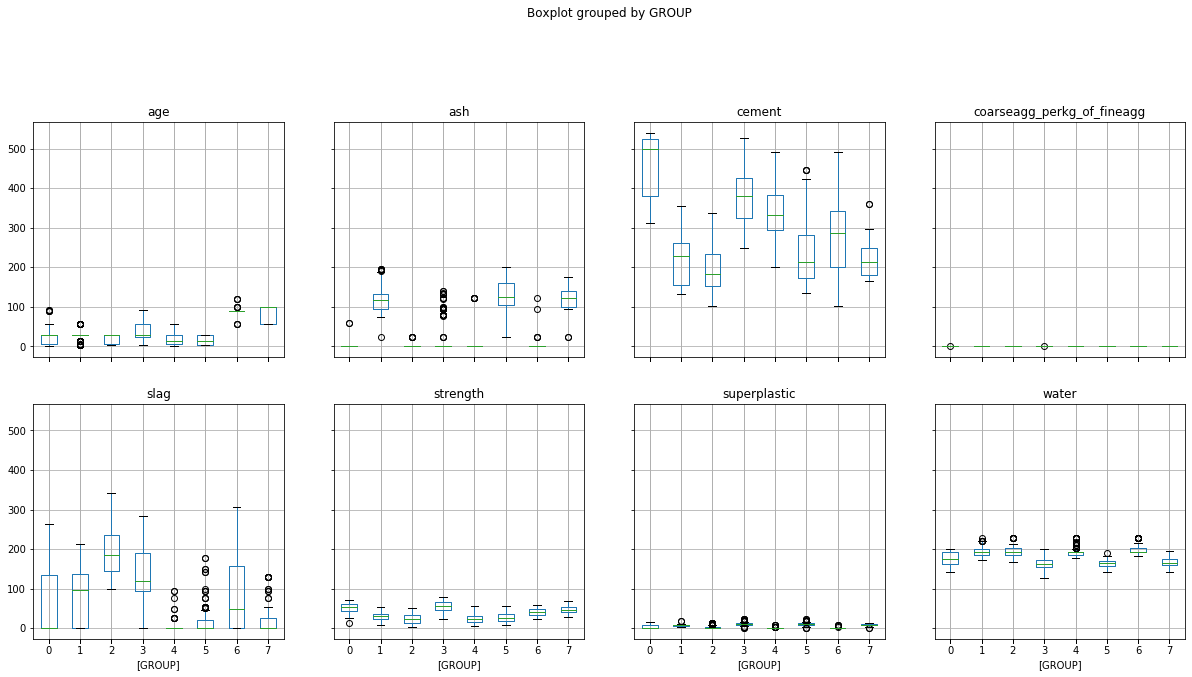

In [42]:
data.boxplot(by = 'GROUP',  layout=(4,4), figsize=(20, 20))
plt.show()

In [43]:
X = pairwise_distances(data.iloc[:,0:-1])
metrics.silhouette_score(X,cluster.labels_)
# The value is very close to '0' which means that there are over-lapping clusters. 
# However, since the silhouette score isn't negative, we can get releived of the fact that there are no points that a classified 
# under the wrong group

0.08024577879816629

In [44]:
data.GROUP.value_counts(sort=False)

0     35
1    157
2    142
3    156
4    147
5    155
6     61
7     88
Name: GROUP, dtype: int64

<Figure size 6480x4680 with 0 Axes>

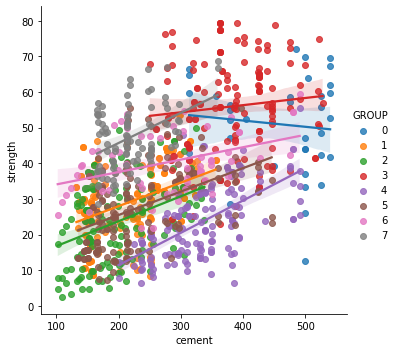

In [104]:
plt.figure(figsize=(90,65))
sns.lmplot(x='cement',y='strength',data=data,hue='GROUP')
plt.show()

# It can be seen that, Group 4 can predict the strength well (a perfect linear line)
# Group 1, 2, 5, 6, 7 gaussians are highly overlapping with eachother
# group 0 has very high variaance and is scattered. 
# Group 0 & group 3 have high strength and high cement content
# Group 3 line is almost horizontal, which means it is a poor predictor of strength
# Group 2 has low cement and low strength content

<Figure size 6480x4680 with 0 Axes>

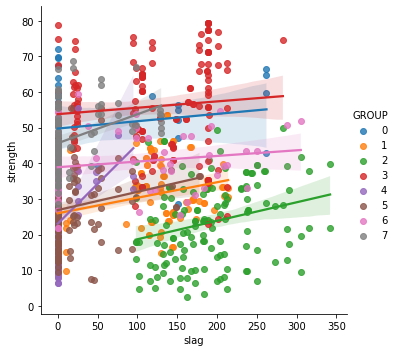

In [106]:
plt.figure(figsize=(90,65))
sns.lmplot(x='slag',y='strength',data=data,hue='GROUP')
plt.show()


# Except for group 2, 4 and group 7, almost all the lines are "horizontal", 
# which means "slag" itself is not much of a good predictor

# Group 2 has very high variance. Group 1 is biased towards '0'

<Figure size 6480x4680 with 0 Axes>

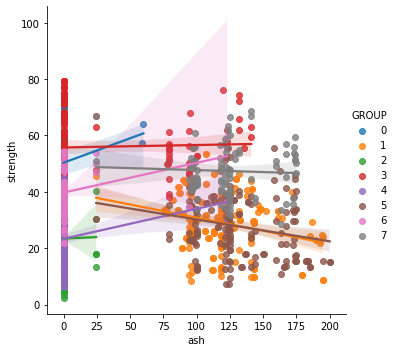

In [105]:
plt.figure(figsize=(90,65))
sns.lmplot(x='ash',y='strength',data=data,hue='GROUP')
plt.show()


# Group 3 has high strength 
# Group 3 line is horizontal. Hence it is a bad predictor of strength

# group 1,5,7 have high ash content, however the gaussians over lap eachother. The variance is very high

# Group 4, 6 have high bias towards '0'

# This all the clusters in general have high variance

<Figure size 6480x4680 with 0 Axes>

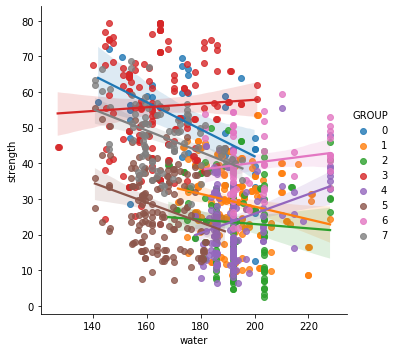

In [103]:
plt.figure(figsize=(90,65))
sns.lmplot(x='water',y='strength',data=data,hue='GROUP')
plt.show()

# clusters with high water content have low compressive strength.
# Group 5 seems to a better predictor. 

# Group 1, 2, 4, 6 are overlapping clusters. They belong to the "high water" content zone

# Group 0, 3 have high strength and low water content. Howevwer,0&3 overlap eachother
# Group 3 line is almost horizontal, which means it is a bad predictor of strength

# Whereas group 0 & 7 seem to be a good predictor

<Figure size 6480x4680 with 0 Axes>

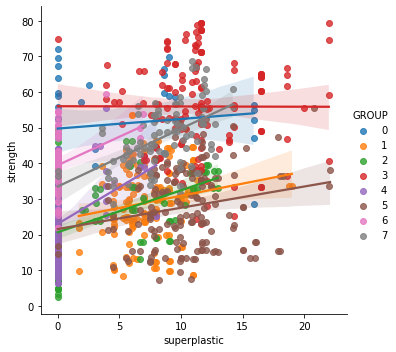

In [108]:
plt.figure(figsize=(90,65))
sns.lmplot(x='superplastic',y='strength',data=data,hue='GROUP')
plt.show()

# Group 0, 3 are horizontal. Which means they are a very bad predictor of strength

# Group 7 seems to be a good predictor of strength

# Group 1, 5, 2 seem to have very high variance and overlap eachother

<Figure size 6480x4680 with 0 Axes>

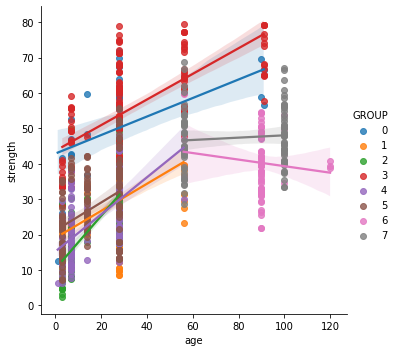

In [109]:
plt.figure(figsize=(90,65))
sns.lmplot(x='age',y='strength',data=data,hue='GROUP')
plt.show()

# All the group in the age vs strength predictor have very very high variance, which may result in poor prediction

# But it can bee seen that, higher the age, high the average compressive strength 

<Figure size 6480x4680 with 0 Axes>

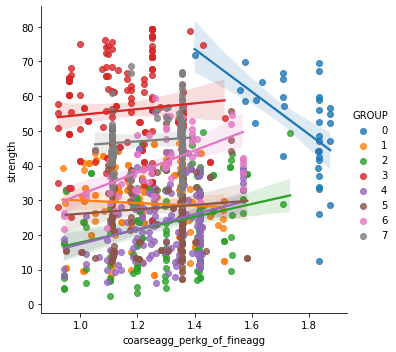

In [111]:
plt.figure(figsize=(90,65))
sns.lmplot(x='coarseagg_perkg_of_fineagg',y='strength',data=data,hue='GROUP')
plt.show()

# Group 3, 7, 1, 5 all have almost horizontal lines. Hence they are poor predictors of strength

# Group 6, 0 seems to be a good predictor of strength

# Group 2 and 4 have very high variance and the overlap eachother

# Groups with high strength have high coarse_agg /- kg of fine_agg ratio
# Groups with low coarse_agg/fine_agg ratio have low strength

In [45]:
data.head(10)

cement   slag    ash  water  superplastic  age  coarseagg_perkg_of_fineagg  \
0   141.3  212.0    0.0  203.5           0.0   28                    1.298330   
1   168.9   42.2  124.3  158.3          10.8   14                    1.357448   
2   250.0    0.0   95.7  187.4           5.5   28                    1.111124   
3   266.0  114.0    0.0  228.0           0.0   28                    1.391045   
4   154.8  183.4    0.0  193.3           9.1   28                    1.503373   
5   255.0    0.0    0.0  192.0           0.0   90                    0.941587   
6   166.8  250.2    0.0  203.5           0.0    7                    1.408605   
7   251.4    0.0  118.3  188.5           6.4   56                    1.357265   
8   296.0    0.0    0.0  192.0           0.0   28                    1.418301   
9   155.0  184.0  143.0  194.0           9.0   28                    1.258941   

   strength  GROUP  
0     29.89      2  
1     23.51      5  
2     29.22      1  
3     45.85      2  
4     18.29      2  
5     21.86      6  
6     15.75      2  
7     36.64      1  
8     21.65      4  
9     28.99      1

In [46]:
X = data.iloc[:,0:-2].values
Y = data.iloc[:,-2].values

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=seed,test_size=0.3)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

# LINEAR REGRESSION

In [48]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
X_test_scaled = ss.transform(X_test)
lr.score(X_test_scaled,y_test)

0.7698899896131519

In [51]:
lr.score(X_train_scaled,y_train)

0.76668312368894

In [49]:
for i in range(0,len(list(data.columns)[0:-2])):
      print("The coefficient of {} is {:.2f}".format(list(data.columns)[0:-2][i],list(lr.coef_)[i]))

print("\nThe intercept is {0:.2f}".format(lr.intercept_))

# The model doesn't seem to be over fit. Hence A simple linear model is ideal for performing prediction.

# The feature importance obtained accoring to Linear Regresion, cement, slag and age have high importance, 
# however, superplastic and coarseagge_perkg_of_fineagg have least importance

The coefficient of cement is 11.90
The coefficient of slag is 7.72
The coefficient of ash is 4.59
The coefficient of water is -3.50
The coefficient of superplastic is 1.07
The coefficient of age is 8.95
The coefficient of coarseagg_perkg_of_fineagg is -0.30

The intercept is 35.22


In [126]:
y_pred = lr.predict(X_test_scaled)
mse = mean_squared_error
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

The RMSE score is  8.156183934604678
The R-squared value is  0.722086962642168


# RIDGE

In [127]:
Ridge = Ridge(alpha=20)
Ridge.fit(X=X_train_scaled,y= y_train)
Ridge.score(X_test_scaled,y_test)

0.7757692628347718

In [136]:
for i in range(0,len(list(data.columns)[0:-2])):
      print("The coefficient of {} is {:.2f}".format(list(data.columns)[0:-2][i],list(Ridge.coef_)[i]))

# The coef_ seems to be "suppressed" when comapred with lineara regression
# Like linear regression, Ridge coeeficients also say that, coarseagg_perkg and superplastic have the least importance

# cement, slag, ash, age, water have high importance

The coefficient of cement is 10.86
The coefficient of slag is 6.77
The coefficient of ash is 3.54
The coefficient of water is -3.29
The coefficient of superplastic is 1.76
The coefficient of age is 8.63
The coefficient of coarseagg_perkg_of_fineagg is -0.07


In [130]:
y_pred = Ridge.predict(X_test_scaled)
mse = mean_squared_error
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

# R-squared value is less when compared with simple lineaar regression model

The RMSE score is  8.051315171099834
The R-squared value is  0.7052588413769745


# LASSO

In [131]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train_scaled,y_train)
lasso.score(X_test_scaled,y_test)

0.7741677860373652

In [135]:
for i in range(0,len(list(data.columns)[0:-2])):
      print("The coefficient of {} is {:.2f}".format(list(data.columns)[0:-2][i],list(lasso.coef_)[i]))


The coefficient of cement is 9.98
The coefficient of slag is 5.75
The coefficient of ash is 2.40
The coefficient of water is -2.95
The coefficient of superplastic is 2.14
The coefficient of age is 8.33
The coefficient of coarseagg_perkg_of_fineagg is 0.00


In [137]:
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

The RMSE score is  8.080015638127835
The R-squared value is  0.6713076782176639


In [138]:
# Let us try predicting the score after removing the least important columns (coarse_agg/fine_agg & superplastic)

In [143]:
data_rem = data.copy()
data_rem.drop({'superplastic','coarseagg_perkg_of_fineagg','GROUP'},axis=1,inplace=True)

In [144]:
data_rem

cement   slag    ash  water  age  strength
0     141.3  212.0    0.0  203.5   28     29.89
1     168.9   42.2  124.3  158.3   14     23.51
2     250.0    0.0   95.7  187.4   28     29.22
3     266.0  114.0    0.0  228.0   28     45.85
4     154.8  183.4    0.0  193.3   28     18.29
..      ...    ...    ...    ...  ...       ...
936   141.3  212.0    0.0  203.5    7     10.39
937   297.2    0.0  117.5  174.8    3     21.91
938   135.0    0.0  166.0  180.0   28     13.29
939   276.4  116.0   90.3  179.6   28     44.28
940   540.0    0.0    0.0  173.0    7     52.61

[941 rows x 6 columns]

In [165]:
X_rem = data_rem.iloc[:,0:-1]
Y_rem = data_rem.iloc[:,-1]

In [166]:
X_train_rem,X_test_rem,y_train_rem,y_test_rem = train_test_split(X_rem,Y_rem,random_state=seed,test_size=0.3)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train_rem)

In [168]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train_rem)
X_test_scaled = ss.transform(X_test_rem)
print("The linear regression score is: ",lr.score(X_test_scaled,y_test_rem))

The linear regression score is:  0.7661598201751117


In [152]:
y_pred = lr.predict(X_test_scaled)
mse = mean_squared_error
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test_rem)))
print("The R-squared value is ",r2_score(y_pred,y_test_rem))

The RMSE score is  8.22202557578397
The R-squared value is  0.7137860326505019


In [153]:
# It is clear that, even after removing 2 columns, there is not much difference in the r2_Score or the RMSE value

In [156]:
Ridge.fit(X=X_train_scaled,y= y_train_rem)
print("The Ridge regression score is: ",Ridge.score(X_test_scaled,y_test_rem))
y_pred = Ridge.predict(X_test_scaled)
mse = mean_squared_error
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test_rem)))
print("The R-squared value is ",r2_score(y_pred,y_test_rem))

The Ridge regression score is:  0.7709752691414978
The RMSE score is  8.13692749047857
The R-squared value is  0.6920758980156998


In [159]:
lasso.fit(X_train_scaled,y_train_rem)
print("The Lasso regression score is: ",lasso.score(X_test_scaled,y_test_rem))
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test_rem)))
print("The R-squared value is ",r2_score(y_pred,y_test_rem))

The Lasso regression score is:  0.7688630619554074
The RMSE score is  8.174363254179184
The R-squared value is  0.656242814100501


In [160]:
# Let us find the feature importance via decision tree also

# DECISION TREE

In [183]:
dtree = DecisionTreeRegressor(max_depth=6,random_state=seed)
dtree.fit(X_train_scaled,y_train)
dtree.score(X_test_scaled,y_test)

0.8275972034590776

In [184]:
y_pred = dtree.predict(X_test_scaled)
mse = mean_squared_error
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

# Decision tree by far, has the highest R-squared value and score

The RMSE score is  7.059783913503827
The R-squared value is  0.7882355821632734


In [185]:
dtree.feature_importances_

array([0.39048105, 0.10109264, 0.00481133, 0.11897449, 0.02171958,
       0.35284252, 0.0100784 ])

In [195]:
for i in range(0,len(list(data.columns)[0:-2])):
      print("The feature importance of {} is {:.4f}".format(list(data.columns)[i],dtree.feature_importances_[i]))
        
# In addition to coarseagg_perkg_of_fineagg and superplastic, 'ash' also does not have much of an importance

The feature importance of cement is 0.3905
The feature importance of slag is 0.1011
The feature importance of ash is 0.0048
The feature importance of water is 0.1190
The feature importance of superplastic is 0.0217
The feature importance of age is 0.3528
The feature importance of coarseagg_perkg_of_fineagg is 0.0101


In [197]:
data_rem_dtree=data_rem.copy()
data_rem_dtree.drop('ash',axis=1,inplace=True)

In [200]:
X_rem = data_rem_dtree.iloc[:,0:-1]
Y_rem = data_rem_dtree.iloc[:,-1]
X_train_rem,X_test_rem,y_train_rem,y_test_rem = train_test_split(X_rem,Y_rem,random_state=seed,test_size=0.3)
ss = StandardScaler()
X_train_scaled_rem = ss.fit_transform(X_train_rem)
X_test_scaled_rem = ss.transform(X_test_rem)
dtree = DecisionTreeRegressor(max_depth=6,random_state=seed)
dtree.fit(X_train_scaled_rem,y_train_rem)
dtree.score(X_test_scaled_rem,y_test_rem)

0.8185156774262545

In [201]:
y_pred = dtree.predict(X_test_scaled_rem)
mse = mean_squared_error
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test_rem)))
print("The R-squared value is ",r2_score(y_pred,y_test_rem))

# There is not a huge difference in score after dropping '3' attributes

The RMSE score is  7.243339020095123
The R-squared value is  0.7711440856159515


In [ ]:
# The target column in this dataset has continious variables. Hence this requires a "regression" model "only"

# The suitable algorithms are:
# Linear Regression
# Ridge
# Lasso
# Decision Tree Regressor
# Support Vector Regressor
# KNN Regressor
# Adaboost regression
# Gradient boosting regressor
# Random Forest regressor

# LINEAR REGRESSION

In [412]:
X = data.iloc[:,0:-2].values
Y = data.iloc[:,-2].values
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=seed,test_size=0.3)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [413]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)
print("The linear regression score is: ",lr.score(X_test_scaled,y_test_rem))
mse = mean_squared_error
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

The linear regression score is:  0.7698899896131519
The RMSE score is  8.156183934604678
The R-squared value is  0.722086962642168


In [414]:
scores = []
RMSE = []
r2= []
kf = KFold(n_splits=10, shuffle=False)
for train_index, test_index in kf.split(X,Y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    ss_kf = StandardScaler()
    X_train_scaled = ss_kf.fit_transform(X_train)
    X_test_scaled = ss_kf.transform(X_test)
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    y_pred = lr.predict(X_test_scaled)
    scores.append(lr.score(X_test_scaled, y_test))
    RMSE.append(np.sqrt(mse(y_pred, y_test)))
    r2.append(r2_score(y_pred,y_test))

In [415]:
print("The mean score is: ",np.mean(scores))
print("The standard deviation is: ",np.std(scores))

print("\nThe mean RMSE is: ",np.mean(RMSE))
print("The standard deviation is: ",np.std(RMSE))

print("\nThe mean r2_score is: ",np.mean(r2))
print("The standard deviation is: ",np.std(r2))

The mean score is:  0.7543197584259589
The standard deviation is:  0.052381093843459084

The mean RMSE is:  8.008431840654229
The standard deviation is:  0.7793264656587777

The mean r2_score is:  0.6775137041592925
The standard deviation is:  0.07055370333059073


In [435]:
model= "Linear Regression"
print("{:.2f}% to {:.2f}%".format((np.mean(scores)-2*np.std(scores))*100,(np.mean(scores)+2*np.std(scores))*100))
print("{:.2f} to {:.2f}".format((np.mean(RMSE)-2*np.std(RMSE)),(np.mean(RMSE)+2*np.std(RMSE))))
print("{:.2f} to {:.2f}".format((np.mean(r2)-2*np.std(r2)),(np.mean(r2)+2*np.std(r2))))

64.96% to 85.91%
6.45 to 9.57
0.54 to 0.82


In [436]:
a = pd.DataFrame({'Model perfomance at 95% confidence': model,'Score':'64.96% to 85.91%','RMSE':'6.45 to 9.57','R-squared':'0.54 to 0.82'} ,index=[1])
a

Model perfomance at 95% confidence             Score          RMSE  \
1                  Linear Regression  64.96% to 85.91%  6.45 to 9.57   

      R-squared  
1  0.54 to 0.82

# RIDGE

In [322]:
param_grid = {
    'alpha':[0.1,0.5,1,2,5,10,20,25,40,50,100,200,400,500,1000],
    'tol':[0.001],
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'random_state':[seed]
}

In [324]:
grid = GridSearchCV(Ridge(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] alpha=0.1, random_state=10, solver=auto, tol=0.001 ..............
[CV]  alpha=0.1, random_state=10, solver=auto, tol=0.001, score=0.751, total=   0.1s
[CV] alpha=0.1, random_state=10, solver=auto, tol=0.001 ..............
[CV]  alpha=0.1, random_state=10, solver=auto, tol=0.001, score=0.772, total=   0.0s
[CV] alpha=0.1, random_state=10, solver=auto, tol=0.001 ..............
[CV]  alpha=0.1, random_state=10, solver=auto, tol=0.001, score=0.759, total=   0.0s
[CV] alpha=0.1, random_state=10, solver=auto, tol=0.001 ..............
[CV]  alpha=0.1, random_state=10, solver=auto, tol=0.001, score=0.813, total=   0.0s
[CV] alpha=0.1, random_state=10, solver=auto, tol=0.001 ..............
[CV]  alpha=0.1, random_state=10, solver=auto, tol=0.001, score=0.735, total=   0.0s
[CV] alpha=0.1, random_state=10, solver=svd, tol=0.001 ...............
[CV]  alpha=0.1, random_state=10, solver=svd, tol=0.001, score=0.751, total=   0.0s
[CV

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] alpha=0.1, random_state=10, solver=lsqr, tol=0.001 ..............
[CV]  alpha=0.1, random_state=10, solver=lsqr, tol=0.001, score=0.772, total=   0.0s
[CV] alpha=0.1, random_state=10, solver=lsqr, tol=0.001 ..............
[CV]  alpha=0.1, random_state=10, solver=lsqr, tol=0.001, score=0.759, total=   0.0s
[CV] alpha=0.1, random_state=10, solver=lsqr, tol=0.001 ..............
[CV]  alpha=0.1, random_state=10, solver=lsqr, tol=0.001, score=0.813, total=   0.0s
[CV] alpha=0.1, random_state=10, solver=lsqr, tol=0.001 ..............
[CV]  alpha=0.1, random_state=10, solver=lsqr, tol=0.001, score=0.735, total=   0.0s
[CV] alpha=0.1, random_state=10, solver=sparse_cg, tol=0.001 .........
[CV]  alpha=0.1, random_state=10, solver=sparse_cg, tol=0.001, score=0.751, total=   0.0s
[CV] alpha=0.1, random_state=10, solver=sparse_cg, tol=0.001 .........
[CV]  alpha=0.1, random_state=10, solver=sparse_cg, tol=0.001, score=0.772, total=   0.0s
[CV] alpha=0.1, random_state=10, solver=sparse_cg, to

[CV]  alpha=1, random_state=10, solver=svd, tol=0.001, score=0.759, total=   0.0s
[CV] alpha=1, random_state=10, solver=svd, tol=0.001 .................
[CV]  alpha=1, random_state=10, solver=svd, tol=0.001, score=0.813, total=   0.0s
[CV] alpha=1, random_state=10, solver=svd, tol=0.001 .................
[CV]  alpha=1, random_state=10, solver=svd, tol=0.001, score=0.735, total=   0.0s
[CV] alpha=1, random_state=10, solver=cholesky, tol=0.001 ............
[CV]  alpha=1, random_state=10, solver=cholesky, tol=0.001, score=0.751, total=   0.0s
[CV] alpha=1, random_state=10, solver=cholesky, tol=0.001 ............
[CV]  alpha=1, random_state=10, solver=cholesky, tol=0.001, score=0.772, total=   0.0s
[CV] alpha=1, random_state=10, solver=cholesky, tol=0.001 ............
[CV]  alpha=1, random_state=10, solver=cholesky, tol=0.001, score=0.759, total=   0.0s
[CV] alpha=1, random_state=10, solver=cholesky, tol=0.001 ............
[CV]  alpha=1, random_state=10, solver=cholesky, tol=0.001, score=0

[CV] alpha=5, random_state=10, solver=lsqr, tol=0.001 ................
[CV]  alpha=5, random_state=10, solver=lsqr, tol=0.001, score=0.812, total=   0.0s
[CV] alpha=5, random_state=10, solver=lsqr, tol=0.001 ................
[CV]  alpha=5, random_state=10, solver=lsqr, tol=0.001, score=0.735, total=   0.0s
[CV] alpha=5, random_state=10, solver=sparse_cg, tol=0.001 ...........
[CV]  alpha=5, random_state=10, solver=sparse_cg, tol=0.001, score=0.752, total=   0.0s
[CV] alpha=5, random_state=10, solver=sparse_cg, tol=0.001 ...........
[CV]  alpha=5, random_state=10, solver=sparse_cg, tol=0.001, score=0.773, total=   0.0s
[CV] alpha=5, random_state=10, solver=sparse_cg, tol=0.001 ...........
[CV]  alpha=5, random_state=10, solver=sparse_cg, tol=0.001, score=0.758, total=   0.0s
[CV] alpha=5, random_state=10, solver=sparse_cg, tol=0.001 ...........
[CV]  alpha=5, random_state=10, solver=sparse_cg, tol=0.001, score=0.812, total=   0.0s
[CV] alpha=5, random_state=10, solver=sparse_cg, tol=0.0

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    1.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.5, 1, 2, 5], 'random_state': [10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga'],
                         'tol': [0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [332]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'alpha': 2, 'random_state': 10, 'solver': 'sag', 'tol': 0.001}
0.7661163587907367
Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=10, solver='sag', tol=0.001)


In [437]:
ridge = Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=10, solver='sag', tol=0.001)

In [438]:
ridge.fit(X_train_scaled,y_train)
print("The score on train data: ",ridge.score(X_train_scaled,y_train))
print("\nThe score on test data: ",ridge.score(X_test_scaled,y_test))


The score on train data:  0.7735123281956078

The score on test data:  0.7302650463418574


In [439]:
y_pred = ridge.predict(X_test_scaled)
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

# The r-squared value is very less. This cannot be a suitable model

The RMSE score is  8.664582057553247
The R-squared value is  0.5639314051774779


In [440]:
scores = []
RMSE = []
r2= []
kf = KFold(n_splits=10, shuffle=False)
for train_index, test_index in kf.split(X,Y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    ss_kf = StandardScaler()
    X_train_scaled = ss_kf.fit_transform(X_train)
    X_test_scaled = ss_kf.transform(X_test)
    ridge = Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=10, solver='sag', tol=0.001)
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)
    scores.append(ridge.score(X_test_scaled, y_test))
    RMSE.append(np.sqrt(mse(y_pred, y_test)))
    r2.append(r2_score(y_pred,y_test))

In [441]:
print("The mean score is: ",np.mean(scores))
print("The standard deviation is: ",np.std(scores))

print("\nThe mean RMSE is: ",np.mean(RMSE))
print("The standard deviation is: ",np.std(RMSE))

print("\nThe mean r2_score is: ",np.mean(r2))
print("The standard deviation is: ",np.std(r2))

The mean score is:  0.7543240560864403
The standard deviation is:  0.05223064993283098

The mean RMSE is:  8.008833681547875
The standard deviation is:  0.7798619046440464

The mean r2_score is:  0.6754286058253263
The standard deviation is:  0.07072216178360125


In [442]:
model= "Ridge Regression"
print("{:.2f}% to {:.2f}%".format((np.mean(scores)-2*np.std(scores))*100,(np.mean(scores)+2*np.std(scores))*100))
print("{:.2f} to {:.2f}".format((np.mean(RMSE)-2*np.std(RMSE)),(np.mean(RMSE)+2*np.std(RMSE))))
print("{:.2f} to {:.2f}".format((np.mean(r2)-2*np.std(r2)),(np.mean(r2)+2*np.std(r2))))

64.99% to 85.88%
6.45 to 9.57
0.53 to 0.82


In [443]:
b = pd.DataFrame({'Model perfomance at 95% confidence': model,'Score':'64.99% to 85.88%','RMSE':'6.45 to 9.57','R-squared':'0.53 to 0.82'} ,index=[2])
b

Model perfomance at 95% confidence             Score          RMSE  \
2                   Ridge Regression  64.99% to 85.88%  6.45 to 9.57   

      R-squared  
2  0.53 to 0.82

# LASSO

In [347]:

param_grid = {
    'alpha':[0.1,0.5,1,2,5,10,20,25,50,75,100,150,200,300,400,500,750,1000],
    'max_iter':[1000],
    'tol':[0.0001,0.001,0.01,0.1,1.0],
    'random_state':[seed],
    'selection':['cyclic','random']
}

In [348]:
grid = GridSearchCV(Lasso(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] alpha=0.1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=0.1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=0.754, total=   0.0s
[CV] alpha=0.1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=0.1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=0.773, total=   0.0s
[CV] alpha=0.1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=0.1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=0.756, total=   0.0s
[CV] alpha=0.1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=0.1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=0.812, total=   0.0s
[CV] alpha=0.1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=0.1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=0.736, total=   0.0s
[CV] alpha=0.1, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  alpha=0.1, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=0.754, total=   0.1s
[CV] alpha=0.1, max_iter=1000, random_state=10, selection=random, tol=0.0001 
[CV]  alpha=0.1, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=0.773, total=   0.0s
[CV] alpha=0.1, max_iter=1000, random_state=10, selection=random, tol=0.0001 
[CV]  alpha=0.1, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=0.756, total=   0.0s
[CV] alpha=0.1, max_iter=1000, random_state=10, selection=random, tol=0.0001 
[CV]  alpha=0.1, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=0.812, total=   0.0s
[CV] alpha=0.1, max_iter=1000, random_state=10, selection=random, tol=0.0001 
[CV]  alpha=0.1, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=0.736, total=   0.0s
[CV] alpha=0.1, max_iter=1000, random_state=10, selection=random, tol=0.001 
[CV]  alpha=0.1, max_iter=1000, random_state=10, selection=random, tol=0.001, sco

[CV]  alpha=1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=0.724, total=   0.1s
[CV] alpha=1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=0.744, total=   0.0s
[CV] alpha=1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=0.702, total=   0.0s
[CV] alpha=1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=0.755, total=   0.0s
[CV] alpha=1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=0.702, total=   0.0s
[CV] alpha=1, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=1, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=0.724, total=   0.0

[CV]  alpha=2, max_iter=1000, random_state=10, selection=random, tol=0.01, score=0.674, total=   0.0s
[CV] alpha=2, max_iter=1000, random_state=10, selection=random, tol=0.01 
[CV]  alpha=2, max_iter=1000, random_state=10, selection=random, tol=0.01, score=0.690, total=   0.0s
[CV] alpha=2, max_iter=1000, random_state=10, selection=random, tol=0.01 
[CV]  alpha=2, max_iter=1000, random_state=10, selection=random, tol=0.01, score=0.633, total=   0.0s
[CV] alpha=2, max_iter=1000, random_state=10, selection=random, tol=0.01 
[CV]  alpha=2, max_iter=1000, random_state=10, selection=random, tol=0.01, score=0.688, total=   0.0s
[CV] alpha=2, max_iter=1000, random_state=10, selection=random, tol=0.01 
[CV]  alpha=2, max_iter=1000, random_state=10, selection=random, tol=0.01, score=0.654, total=   0.0s
[CV] alpha=2, max_iter=1000, random_state=10, selection=random, tol=0.1 
[CV]  alpha=2, max_iter=1000, random_state=10, selection=random, tol=0.1, score=0.671, total=   0.0s
[CV] alpha=2, max_it

[CV]  alpha=10, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.000, total=   0.0s
[CV] alpha=10, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=10, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.012, total=   0.0s
[CV] alpha=10, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=10, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.002, total=   0.0s
[CV] alpha=10, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=10, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.041, total=   0.0s
[CV] alpha=10, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=10, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.029, total=   0.0s
[CV] alpha=10, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=10, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.000, tot

[CV]  alpha=20, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=-0.041, total=   0.0s
[CV] alpha=20, max_iter=1000, random_state=10, selection=random, tol=0.0001 
[CV]  alpha=20, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=-0.029, total=   0.0s
[CV] alpha=20, max_iter=1000, random_state=10, selection=random, tol=0.0001 
[CV]  alpha=20, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=-0.000, total=   0.0s
[CV] alpha=20, max_iter=1000, random_state=10, selection=random, tol=0.001 
[CV]  alpha=20, max_iter=1000, random_state=10, selection=random, tol=0.001, score=-0.012, total=   0.0s
[CV] alpha=20, max_iter=1000, random_state=10, selection=random, tol=0.001 
[CV]  alpha=20, max_iter=1000, random_state=10, selection=random, tol=0.001, score=-0.002, total=   0.0s
[CV] alpha=20, max_iter=1000, random_state=10, selection=random, tol=0.001 
[CV]  alpha=20, max_iter=1000, random_state=10, selection=random, tol=0.001, score=-0.041,

[CV]  alpha=25, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=-0.012, total=   0.0s
[CV] alpha=25, max_iter=1000, random_state=10, selection=random, tol=0.0001 
[CV]  alpha=25, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=-0.002, total=   0.0s
[CV] alpha=25, max_iter=1000, random_state=10, selection=random, tol=0.0001 
[CV]  alpha=25, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=-0.041, total=   0.0s
[CV] alpha=25, max_iter=1000, random_state=10, selection=random, tol=0.0001 
[CV]  alpha=25, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=-0.029, total=   0.0s
[CV] alpha=25, max_iter=1000, random_state=10, selection=random, tol=0.0001 
[CV]  alpha=25, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=-0.000, total=   0.0s
[CV] alpha=25, max_iter=1000, random_state=10, selection=random, tol=0.001 
[CV]  alpha=25, max_iter=1000, random_state=10, selection=random, tol=0.001, score=-0.

[CV]  alpha=50, max_iter=1000, random_state=10, selection=random, tol=0.001, score=-0.000, total=   0.0s
[CV] alpha=50, max_iter=1000, random_state=10, selection=random, tol=0.01 
[CV]  alpha=50, max_iter=1000, random_state=10, selection=random, tol=0.01, score=-0.012, total=   0.0s
[CV] alpha=50, max_iter=1000, random_state=10, selection=random, tol=0.01 
[CV]  alpha=50, max_iter=1000, random_state=10, selection=random, tol=0.01, score=-0.002, total=   0.0s
[CV] alpha=50, max_iter=1000, random_state=10, selection=random, tol=0.01 
[CV]  alpha=50, max_iter=1000, random_state=10, selection=random, tol=0.01, score=-0.041, total=   0.0s
[CV] alpha=50, max_iter=1000, random_state=10, selection=random, tol=0.01 
[CV]  alpha=50, max_iter=1000, random_state=10, selection=random, tol=0.01, score=-0.029, total=   0.0s
[CV] alpha=50, max_iter=1000, random_state=10, selection=random, tol=0.01 
[CV]  alpha=50, max_iter=1000, random_state=10, selection=random, tol=0.01, score=-0.000, total=   0.0s


[CV]  alpha=75, max_iter=1000, random_state=10, selection=random, tol=0.1, score=-0.000, total=   0.0s
[CV] alpha=75, max_iter=1000, random_state=10, selection=random, tol=1.0 
[CV]  alpha=75, max_iter=1000, random_state=10, selection=random, tol=1.0, score=-0.012, total=   0.0s
[CV] alpha=75, max_iter=1000, random_state=10, selection=random, tol=1.0 
[CV]  alpha=75, max_iter=1000, random_state=10, selection=random, tol=1.0, score=-0.002, total=   0.0s
[CV] alpha=75, max_iter=1000, random_state=10, selection=random, tol=1.0 
[CV]  alpha=75, max_iter=1000, random_state=10, selection=random, tol=1.0, score=-0.041, total=   0.0s
[CV] alpha=75, max_iter=1000, random_state=10, selection=random, tol=1.0 
[CV]  alpha=75, max_iter=1000, random_state=10, selection=random, tol=1.0, score=-0.029, total=   0.0s
[CV] alpha=75, max_iter=1000, random_state=10, selection=random, tol=1.0 
[CV]  alpha=75, max_iter=1000, random_state=10, selection=random, tol=1.0, score=-0.000, total=   0.0s
[CV] alpha=1

[CV]  alpha=100, max_iter=1000, random_state=10, selection=random, tol=1.0, score=-0.041, total=   0.0s
[CV] alpha=100, max_iter=1000, random_state=10, selection=random, tol=1.0 
[CV]  alpha=100, max_iter=1000, random_state=10, selection=random, tol=1.0, score=-0.029, total=   0.0s
[CV] alpha=100, max_iter=1000, random_state=10, selection=random, tol=1.0 
[CV]  alpha=100, max_iter=1000, random_state=10, selection=random, tol=1.0, score=-0.000, total=   0.0s
[CV] alpha=150, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=150, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.012, total=   0.0s
[CV] alpha=150, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=150, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.002, total=   0.0s
[CV] alpha=150, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=150, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.04

[CV]  alpha=200, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.012, total=   0.0s
[CV] alpha=200, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=200, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.002, total=   0.0s
[CV] alpha=200, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=200, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.041, total=   0.0s
[CV] alpha=200, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=200, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.029, total=   0.0s
[CV] alpha=200, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=200, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.000, total=   0.0s
[CV] alpha=200, max_iter=1000, random_state=10, selection=cyclic, tol=0.01 
[CV]  alpha=200, max_iter=1000, random_state=10, selection=cyclic, tol=0.01, score=-0.

[CV]  alpha=300, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.002, total=   0.0s
[CV] alpha=300, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=300, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.041, total=   0.0s
[CV] alpha=300, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=300, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.029, total=   0.0s
[CV] alpha=300, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=300, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.000, total=   0.0s
[CV] alpha=300, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=300, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.012, total=   0.0s
[CV] alpha=300, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=300, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, 

[CV]  alpha=400, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.002, total=   0.0s
[CV] alpha=400, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=400, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.041, total=   0.0s
[CV] alpha=400, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=400, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.029, total=   0.0s
[CV] alpha=400, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=400, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.000, total=   0.0s
[CV] alpha=400, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=400, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.012, total=   0.0s
[CV] alpha=400, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=400, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, 

[CV]  alpha=500, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.041, total=   0.0s
[CV] alpha=500, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=500, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.029, total=   0.0s
[CV] alpha=500, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=500, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.000, total=   0.0s
[CV] alpha=500, max_iter=1000, random_state=10, selection=cyclic, tol=0.01 
[CV]  alpha=500, max_iter=1000, random_state=10, selection=cyclic, tol=0.01, score=-0.012, total=   0.0s
[CV] alpha=500, max_iter=1000, random_state=10, selection=cyclic, tol=0.01 
[CV]  alpha=500, max_iter=1000, random_state=10, selection=cyclic, tol=0.01, score=-0.002, total=   0.0s
[CV] alpha=500, max_iter=1000, random_state=10, selection=cyclic, tol=0.01 
[CV]  alpha=500, max_iter=1000, random_state=10, selection=cyclic, tol=0.01, score=-0.041,

[CV] alpha=750, max_iter=1000, random_state=10, selection=cyclic, tol=0.01 
[CV]  alpha=750, max_iter=1000, random_state=10, selection=cyclic, tol=0.01, score=-0.029, total=   0.0s
[CV] alpha=750, max_iter=1000, random_state=10, selection=cyclic, tol=0.01 
[CV]  alpha=750, max_iter=1000, random_state=10, selection=cyclic, tol=0.01, score=-0.000, total=   0.0s
[CV] alpha=750, max_iter=1000, random_state=10, selection=cyclic, tol=0.1 
[CV]  alpha=750, max_iter=1000, random_state=10, selection=cyclic, tol=0.1, score=-0.012, total=   0.0s
[CV] alpha=750, max_iter=1000, random_state=10, selection=cyclic, tol=0.1 
[CV]  alpha=750, max_iter=1000, random_state=10, selection=cyclic, tol=0.1, score=-0.002, total=   0.0s
[CV] alpha=750, max_iter=1000, random_state=10, selection=cyclic, tol=0.1 
[CV]  alpha=750, max_iter=1000, random_state=10, selection=cyclic, tol=0.1, score=-0.041, total=   0.0s
[CV] alpha=750, max_iter=1000, random_state=10, selection=cyclic, tol=0.1 
[CV]  alpha=750, max_iter=

[CV] alpha=1000, max_iter=1000, random_state=10, selection=cyclic, tol=0.1 
[CV]  alpha=1000, max_iter=1000, random_state=10, selection=cyclic, tol=0.1, score=-0.029, total=   0.0s
[CV] alpha=1000, max_iter=1000, random_state=10, selection=cyclic, tol=0.1 
[CV]  alpha=1000, max_iter=1000, random_state=10, selection=cyclic, tol=0.1, score=-0.000, total=   0.0s
[CV] alpha=1000, max_iter=1000, random_state=10, selection=cyclic, tol=1.0 
[CV]  alpha=1000, max_iter=1000, random_state=10, selection=cyclic, tol=1.0, score=-0.012, total=   0.0s
[CV] alpha=1000, max_iter=1000, random_state=10, selection=cyclic, tol=1.0 
[CV]  alpha=1000, max_iter=1000, random_state=10, selection=cyclic, tol=1.0, score=-0.002, total=   0.0s
[CV] alpha=1000, max_iter=1000, random_state=10, selection=cyclic, tol=1.0 
[CV]  alpha=1000, max_iter=1000, random_state=10, selection=cyclic, tol=1.0, score=-0.041, total=   0.0s
[CV] alpha=1000, max_iter=1000, random_state=10, selection=cyclic, tol=1.0 
[CV]  alpha=1000, m

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    6.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.5, 1, 2, 5, 10, 20, 25, 50, 75, 100,
                                   150, 200, 300, 400, 500, 750, 1000],
                         'max_iter': [1000], 'random_state': [10],
                         'selection': ['cyclic', 'random'],
                         'tol': [0.0001, 0.001, 0.01, 0.1, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [349]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'alpha': 0.1, 'max_iter': 1000, 'random_state': 10, 'selection': 'cyclic', 'tol': 0.0001}
0.7660362826393158
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=10,
      selection='cyclic', tol=0.0001, warm_start=False)


In [444]:
lasso = Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=10,
      selection='cyclic', tol=0.0001, warm_start=False)

In [445]:
lasso.fit(X_train_scaled,y_train)
print("The score on train data: ",lasso.score(X_train_scaled,y_train))
print("\nThe score on test data: ",lasso.score(X_test_scaled,y_test))

The score on train data:  0.773015076737731

The score on test data:  0.7324464985069783


In [446]:
y_pred = lasso.predict(X_test_scaled)
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

# The R-squared value is very high. Not a good model

The RMSE score is  8.629473996755182
The R-squared value is  0.5544851902565268


In [447]:
scores = []
RMSE = []
r2= []
kf = KFold(n_splits=10, shuffle=False)
for train_index, test_index in kf.split(X,Y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    ss_kf = StandardScaler()
    X_train_scaled = ss_kf.fit_transform(X_train)
    X_test_scaled = ss_kf.transform(X_test)
    model = Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=10,
      selection='cyclic', tol=0.0001, warm_start=False)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(model.score(X_test_scaled, y_test))
    RMSE.append(np.sqrt(mse(y_pred, y_test)))
    r2.append(r2_score(y_pred,y_test))

In [448]:
print("The mean score is: ",np.mean(scores))
print("The standard deviation is: ",np.std(scores))

print("\nThe mean RMSE is: ",np.mean(RMSE))
print("The standard deviation is: ",np.std(RMSE))

print("\nThe mean r2_score is: ",np.mean(r2))
print("The standard deviation is: ",np.std(r2))

The mean score is:  0.7545798813384772
The standard deviation is:  0.05120172725903837

The mean RMSE is:  8.008166530394938
The standard deviation is:  0.7856899877070387

The mean r2_score is:  0.6663138695052322
The standard deviation is:  0.07170258820199997


In [449]:
model= "Lasso Regression"
print("{:.2f}% to {:.2f}%".format((np.mean(scores)-2*np.std(scores))*100,(np.mean(scores)+2*np.std(scores))*100))
print("{:.2f} to {:.2f}".format((np.mean(RMSE)-2*np.std(RMSE)),(np.mean(RMSE)+2*np.std(RMSE))))
print("{:.2f} to {:.2f}".format((np.mean(r2)-2*np.std(r2)),(np.mean(r2)+2*np.std(r2))))

65.22% to 85.70%
6.44 to 9.58
0.52 to 0.81


In [450]:
c = pd.DataFrame({'Model perfomance at 95% confidence': model,'Score':'65.22% to 85.70%','RMSE':'6.44 to 9.58','R-squared':'0.52 to 0.81'} ,index=[3])
c

Model perfomance at 95% confidence             Score          RMSE  \
3                   Lasso Regression  65.22% to 85.70%  6.44 to 9.58   

      R-squared  
3  0.52 to 0.81

# DECISION TREE REGRESSOR

In [387]:

param_grid = {
    'criterion':["mse", "friedman_mse", "mae"],
    'max_depth':[1,2,3,4,5,6,7,8],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,2,3],
    'random_state':[seed]
}

In [388]:
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] criterion=mse, max_depth=1, min_samples_leaf=1, min_samples_split=2, random_state=10 
[CV]  criterion=mse, max_depth=1, min_samples_leaf=1, min_samples_split=2, random_state=10, score=0.092, total=   0.0s
[CV] criterion=mse, max_depth=1, min_samples_leaf=1, min_samples_split=2, random_state=10 
[CV]  criterion=mse, max_depth=1, min_samples_leaf=1, min_samples_split=2, random_state=10, score=0.227, total=   0.0s
[CV] criterion=mse, max_depth=1, min_samples_leaf=1, min_samples_split=2, random_state=10 
[CV]  criterion=mse, max_depth=1, min_samples_leaf=1, min_samples_split=2, random_state=10, score=0.269, total=   0.0s
[CV] criterion=mse, max_depth=1, min_samples_leaf=1, min_samples_split=2, random_state=10 
[CV]  criterion=mse, max_depth=1, min_samples_leaf=1, min_samples_split=2, random_state=10, score=0.252, total=   0.0s
[CV] criterion=mse, max_depth=1, min_samples_leaf=1, min_samples_split=2, random_state=10 
[CV] 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] criterion=mse, max_depth=1, min_samples_leaf=3, min_samples_split=2, random_state=10 
[CV]  criterion=mse, max_depth=1, min_samples_leaf=3, min_samples_split=2, random_state=10, score=0.092, total=   0.0s
[CV] criterion=mse, max_depth=1, min_samples_leaf=3, min_samples_split=2, random_state=10 
[CV]  criterion=mse, max_depth=1, min_samples_leaf=3, min_samples_split=2, random_state=10, score=0.227, total=   0.0s
[CV] criterion=mse, max_depth=1, min_samples_leaf=3, min_samples_split=2, random_state=10 
[CV]  criterion=mse, max_depth=1, min_samples_leaf=3, min_samples_split=2, random_state=10, score=0.269, total=   0.0s
[CV] criterion=mse, max_depth=1, min_samples_leaf=3, min_samples_split=2, random_state=10 
[CV]  criterion=mse, max_depth=1, min_samples_leaf=3, min_samples_split=2, random_state=10, score=0.252, total=   0.0s
[CV] criterion=mse, max_depth=1, min_samples_leaf=3, min_samples_split=2, random_state=10 
[CV]  criterion=mse, max_depth=1, min_samples_leaf=3, min_samples_sp

[CV]  criterion=mse, max_depth=2, min_samples_leaf=3, min_samples_split=3, random_state=10, score=0.527, total=   0.0s
[CV] criterion=mse, max_depth=2, min_samples_leaf=3, min_samples_split=3, random_state=10 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=3, min_samples_split=3, random_state=10, score=0.497, total=   0.0s
[CV] criterion=mse, max_depth=2, min_samples_leaf=3, min_samples_split=3, random_state=10 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=3, min_samples_split=3, random_state=10, score=0.325, total=   0.0s
[CV] criterion=mse, max_depth=2, min_samples_leaf=3, min_samples_split=4, random_state=10 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=3, min_samples_split=4, random_state=10, score=0.334, total=   0.0s
[CV] criterion=mse, max_depth=2, min_samples_leaf=3, min_samples_split=4, random_state=10 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=3, min_samples_split=4, random_state=10, score=0.453, total=   0.0s
[CV] criterion=mse, max_depth=2, min_samp

[CV]  criterion=mse, max_depth=3, min_samples_leaf=3, min_samples_split=4, random_state=10, score=0.574, total=   0.0s
[CV] criterion=mse, max_depth=3, min_samples_leaf=3, min_samples_split=4, random_state=10 
[CV]  criterion=mse, max_depth=3, min_samples_leaf=3, min_samples_split=4, random_state=10, score=0.569, total=   0.0s
[CV] criterion=mse, max_depth=3, min_samples_leaf=3, min_samples_split=4, random_state=10 
[CV]  criterion=mse, max_depth=3, min_samples_leaf=3, min_samples_split=4, random_state=10, score=0.637, total=   0.0s
[CV] criterion=mse, max_depth=3, min_samples_leaf=3, min_samples_split=4, random_state=10 
[CV]  criterion=mse, max_depth=3, min_samples_leaf=3, min_samples_split=4, random_state=10, score=0.647, total=   0.0s
[CV] criterion=mse, max_depth=3, min_samples_leaf=3, min_samples_split=4, random_state=10 
[CV]  criterion=mse, max_depth=3, min_samples_leaf=3, min_samples_split=4, random_state=10, score=0.501, total=   0.0s
[CV] criterion=mse, max_depth=3, min_samp

[CV]  criterion=mse, max_depth=4, min_samples_leaf=3, min_samples_split=2, random_state=10, score=0.664, total=   0.0s
[CV] criterion=mse, max_depth=4, min_samples_leaf=3, min_samples_split=2, random_state=10 
[CV]  criterion=mse, max_depth=4, min_samples_leaf=3, min_samples_split=2, random_state=10, score=0.694, total=   0.0s
[CV] criterion=mse, max_depth=4, min_samples_leaf=3, min_samples_split=2, random_state=10 
[CV]  criterion=mse, max_depth=4, min_samples_leaf=3, min_samples_split=2, random_state=10, score=0.780, total=   0.0s
[CV] criterion=mse, max_depth=4, min_samples_leaf=3, min_samples_split=2, random_state=10 
[CV]  criterion=mse, max_depth=4, min_samples_leaf=3, min_samples_split=2, random_state=10, score=0.666, total=   0.0s
[CV] criterion=mse, max_depth=4, min_samples_leaf=3, min_samples_split=3, random_state=10 
[CV]  criterion=mse, max_depth=4, min_samples_leaf=3, min_samples_split=3, random_state=10, score=0.613, total=   0.0s
[CV] criterion=mse, max_depth=4, min_samp

[CV]  criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=4, random_state=10, score=0.823, total=   0.0s
[CV] criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=4, random_state=10 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=4, random_state=10, score=0.707, total=   0.0s
[CV] criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=5, random_state=10 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=5, random_state=10, score=0.674, total=   0.0s
[CV] criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=5, random_state=10 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=5, random_state=10, score=0.740, total=   0.0s
[CV] criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=5, random_state=10 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=5, random_state=10, score=0.782, total=   0.0s
[CV] criterion=mse, max_depth=5, min_samp

[CV] criterion=mse, max_depth=6, min_samples_leaf=2, min_samples_split=2, random_state=10 
[CV]  criterion=mse, max_depth=6, min_samples_leaf=2, min_samples_split=2, random_state=10, score=0.776, total=   0.0s
[CV] criterion=mse, max_depth=6, min_samples_leaf=2, min_samples_split=2, random_state=10 
[CV]  criterion=mse, max_depth=6, min_samples_leaf=2, min_samples_split=2, random_state=10, score=0.852, total=   0.0s
[CV] criterion=mse, max_depth=6, min_samples_leaf=2, min_samples_split=2, random_state=10 
[CV]  criterion=mse, max_depth=6, min_samples_leaf=2, min_samples_split=2, random_state=10, score=0.817, total=   0.0s
[CV] criterion=mse, max_depth=6, min_samples_leaf=2, min_samples_split=2, random_state=10 
[CV]  criterion=mse, max_depth=6, min_samples_leaf=2, min_samples_split=2, random_state=10, score=0.705, total=   0.0s
[CV] criterion=mse, max_depth=6, min_samples_leaf=2, min_samples_split=3, random_state=10 
[CV]  criterion=mse, max_depth=6, min_samples_leaf=2, min_samples_spl

[CV]  criterion=mse, max_depth=7, min_samples_leaf=1, min_samples_split=2, random_state=10, score=0.765, total=   0.0s
[CV] criterion=mse, max_depth=7, min_samples_leaf=1, min_samples_split=3, random_state=10 
[CV]  criterion=mse, max_depth=7, min_samples_leaf=1, min_samples_split=3, random_state=10, score=0.785, total=   0.0s
[CV] criterion=mse, max_depth=7, min_samples_leaf=1, min_samples_split=3, random_state=10 
[CV]  criterion=mse, max_depth=7, min_samples_leaf=1, min_samples_split=3, random_state=10, score=0.826, total=   0.0s
[CV] criterion=mse, max_depth=7, min_samples_leaf=1, min_samples_split=3, random_state=10 
[CV]  criterion=mse, max_depth=7, min_samples_leaf=1, min_samples_split=3, random_state=10, score=0.843, total=   0.0s
[CV] criterion=mse, max_depth=7, min_samples_leaf=1, min_samples_split=3, random_state=10 
[CV]  criterion=mse, max_depth=7, min_samples_leaf=1, min_samples_split=3, random_state=10, score=0.843, total=   0.0s
[CV] criterion=mse, max_depth=7, min_samp

[CV]  criterion=mse, max_depth=7, min_samples_leaf=3, min_samples_split=3, random_state=10, score=0.787, total=   0.0s
[CV] criterion=mse, max_depth=7, min_samples_leaf=3, min_samples_split=3, random_state=10 
[CV]  criterion=mse, max_depth=7, min_samples_leaf=3, min_samples_split=3, random_state=10, score=0.825, total=   0.0s
[CV] criterion=mse, max_depth=7, min_samples_leaf=3, min_samples_split=3, random_state=10 
[CV]  criterion=mse, max_depth=7, min_samples_leaf=3, min_samples_split=3, random_state=10, score=0.825, total=   0.0s
[CV] criterion=mse, max_depth=7, min_samples_leaf=3, min_samples_split=3, random_state=10 
[CV]  criterion=mse, max_depth=7, min_samples_leaf=3, min_samples_split=3, random_state=10, score=0.847, total=   0.0s
[CV] criterion=mse, max_depth=7, min_samples_leaf=3, min_samples_split=3, random_state=10 
[CV]  criterion=mse, max_depth=7, min_samples_leaf=3, min_samples_split=3, random_state=10, score=0.749, total=   0.0s
[CV] criterion=mse, max_depth=7, min_samp

[CV]  criterion=mse, max_depth=8, min_samples_leaf=2, min_samples_split=3, random_state=10, score=0.765, total=   0.0s
[CV] criterion=mse, max_depth=8, min_samples_leaf=2, min_samples_split=3, random_state=10 
[CV]  criterion=mse, max_depth=8, min_samples_leaf=2, min_samples_split=3, random_state=10, score=0.839, total=   0.0s
[CV] criterion=mse, max_depth=8, min_samples_leaf=2, min_samples_split=3, random_state=10 
[CV]  criterion=mse, max_depth=8, min_samples_leaf=2, min_samples_split=3, random_state=10, score=0.850, total=   0.0s
[CV] criterion=mse, max_depth=8, min_samples_leaf=2, min_samples_split=3, random_state=10 
[CV]  criterion=mse, max_depth=8, min_samples_leaf=2, min_samples_split=3, random_state=10, score=0.874, total=   0.0s
[CV] criterion=mse, max_depth=8, min_samples_leaf=2, min_samples_split=3, random_state=10 
[CV]  criterion=mse, max_depth=8, min_samples_leaf=2, min_samples_split=3, random_state=10, score=0.779, total=   0.0s
[CV] criterion=mse, max_depth=8, min_samp

[CV]  criterion=friedman_mse, max_depth=1, min_samples_leaf=1, min_samples_split=3, random_state=10, score=0.269, total=   0.0s
[CV] criterion=friedman_mse, max_depth=1, min_samples_leaf=1, min_samples_split=3, random_state=10 
[CV]  criterion=friedman_mse, max_depth=1, min_samples_leaf=1, min_samples_split=3, random_state=10, score=0.252, total=   0.0s
[CV] criterion=friedman_mse, max_depth=1, min_samples_leaf=1, min_samples_split=3, random_state=10 
[CV]  criterion=friedman_mse, max_depth=1, min_samples_leaf=1, min_samples_split=3, random_state=10, score=0.158, total=   0.0s
[CV] criterion=friedman_mse, max_depth=1, min_samples_leaf=1, min_samples_split=4, random_state=10 
[CV]  criterion=friedman_mse, max_depth=1, min_samples_leaf=1, min_samples_split=4, random_state=10, score=0.092, total=   0.0s
[CV] criterion=friedman_mse, max_depth=1, min_samples_leaf=1, min_samples_split=4, random_state=10 
[CV]  criterion=friedman_mse, max_depth=1, min_samples_leaf=1, min_samples_split=4, rand

[CV]  criterion=friedman_mse, max_depth=2, min_samples_leaf=1, min_samples_split=4, random_state=10, score=0.453, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, min_samples_leaf=1, min_samples_split=4, random_state=10 
[CV]  criterion=friedman_mse, max_depth=2, min_samples_leaf=1, min_samples_split=4, random_state=10, score=0.527, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, min_samples_leaf=1, min_samples_split=4, random_state=10 
[CV]  criterion=friedman_mse, max_depth=2, min_samples_leaf=1, min_samples_split=4, random_state=10, score=0.497, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, min_samples_leaf=1, min_samples_split=4, random_state=10 
[CV]  criterion=friedman_mse, max_depth=2, min_samples_leaf=1, min_samples_split=4, random_state=10, score=0.325, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, min_samples_leaf=1, min_samples_split=5, random_state=10 
[CV]  criterion=friedman_mse, max_depth=2, min_samples_leaf=1, min_samples_split=5, rand

[CV]  criterion=friedman_mse, max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=10, score=0.501, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, min_samples_leaf=1, min_samples_split=3, random_state=10 
[CV]  criterion=friedman_mse, max_depth=3, min_samples_leaf=1, min_samples_split=3, random_state=10, score=0.574, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, min_samples_leaf=1, min_samples_split=3, random_state=10 
[CV]  criterion=friedman_mse, max_depth=3, min_samples_leaf=1, min_samples_split=3, random_state=10, score=0.569, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, min_samples_leaf=1, min_samples_split=3, random_state=10 
[CV]  criterion=friedman_mse, max_depth=3, min_samples_leaf=1, min_samples_split=3, random_state=10, score=0.637, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, min_samples_leaf=1, min_samples_split=3, random_state=10 
[CV]  criterion=friedman_mse, max_depth=3, min_samples_leaf=1, min_samples_split=3, rand

[CV]  criterion=friedman_mse, max_depth=3, min_samples_leaf=3, min_samples_split=5, random_state=10, score=0.647, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, min_samples_leaf=3, min_samples_split=5, random_state=10 
[CV]  criterion=friedman_mse, max_depth=3, min_samples_leaf=3, min_samples_split=5, random_state=10, score=0.501, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, min_samples_leaf=1, min_samples_split=2, random_state=10 
[CV]  criterion=friedman_mse, max_depth=4, min_samples_leaf=1, min_samples_split=2, random_state=10, score=0.613, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, min_samples_leaf=1, min_samples_split=2, random_state=10 
[CV]  criterion=friedman_mse, max_depth=4, min_samples_leaf=1, min_samples_split=2, random_state=10, score=0.664, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, min_samples_leaf=1, min_samples_split=2, random_state=10 
[CV]  criterion=friedman_mse, max_depth=4, min_samples_leaf=1, min_samples_split=2, rand

[CV]  criterion=friedman_mse, max_depth=4, min_samples_leaf=3, min_samples_split=3, random_state=10, score=0.666, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, min_samples_leaf=3, min_samples_split=4, random_state=10 
[CV]  criterion=friedman_mse, max_depth=4, min_samples_leaf=3, min_samples_split=4, random_state=10, score=0.613, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, min_samples_leaf=3, min_samples_split=4, random_state=10 
[CV]  criterion=friedman_mse, max_depth=4, min_samples_leaf=3, min_samples_split=4, random_state=10, score=0.664, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, min_samples_leaf=3, min_samples_split=4, random_state=10 
[CV]  criterion=friedman_mse, max_depth=4, min_samples_leaf=3, min_samples_split=4, random_state=10, score=0.694, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, min_samples_leaf=3, min_samples_split=4, random_state=10 
[CV]  criterion=friedman_mse, max_depth=4, min_samples_leaf=3, min_samples_split=4, rand

[CV]  criterion=friedman_mse, max_depth=5, min_samples_leaf=2, min_samples_split=5, random_state=10, score=0.755, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, min_samples_leaf=2, min_samples_split=5, random_state=10 
[CV]  criterion=friedman_mse, max_depth=5, min_samples_leaf=2, min_samples_split=5, random_state=10, score=0.782, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, min_samples_leaf=2, min_samples_split=5, random_state=10 
[CV]  criterion=friedman_mse, max_depth=5, min_samples_leaf=2, min_samples_split=5, random_state=10, score=0.821, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, min_samples_leaf=2, min_samples_split=5, random_state=10 
[CV]  criterion=friedman_mse, max_depth=5, min_samples_leaf=2, min_samples_split=5, random_state=10, score=0.707, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, min_samples_leaf=3, min_samples_split=2, random_state=10 
[CV]  criterion=friedman_mse, max_depth=5, min_samples_leaf=3, min_samples_split=2, rand

[CV]  criterion=friedman_mse, max_depth=6, min_samples_leaf=2, min_samples_split=2, random_state=10, score=0.852, total=   0.0s
[CV] criterion=friedman_mse, max_depth=6, min_samples_leaf=2, min_samples_split=2, random_state=10 
[CV]  criterion=friedman_mse, max_depth=6, min_samples_leaf=2, min_samples_split=2, random_state=10, score=0.817, total=   0.0s
[CV] criterion=friedman_mse, max_depth=6, min_samples_leaf=2, min_samples_split=2, random_state=10 
[CV]  criterion=friedman_mse, max_depth=6, min_samples_leaf=2, min_samples_split=2, random_state=10, score=0.705, total=   0.0s
[CV] criterion=friedman_mse, max_depth=6, min_samples_leaf=2, min_samples_split=3, random_state=10 
[CV]  criterion=friedman_mse, max_depth=6, min_samples_leaf=2, min_samples_split=3, random_state=10, score=0.757, total=   0.0s
[CV] criterion=friedman_mse, max_depth=6, min_samples_leaf=2, min_samples_split=3, random_state=10 
[CV]  criterion=friedman_mse, max_depth=6, min_samples_leaf=2, min_samples_split=3, rand

[CV]  criterion=friedman_mse, max_depth=7, min_samples_leaf=1, min_samples_split=3, random_state=10, score=0.824, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, min_samples_leaf=1, min_samples_split=3, random_state=10 
[CV]  criterion=friedman_mse, max_depth=7, min_samples_leaf=1, min_samples_split=3, random_state=10, score=0.843, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, min_samples_leaf=1, min_samples_split=3, random_state=10 
[CV]  criterion=friedman_mse, max_depth=7, min_samples_leaf=1, min_samples_split=3, random_state=10, score=0.843, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, min_samples_leaf=1, min_samples_split=3, random_state=10 
[CV]  criterion=friedman_mse, max_depth=7, min_samples_leaf=1, min_samples_split=3, random_state=10, score=0.768, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, min_samples_leaf=1, min_samples_split=4, random_state=10 
[CV]  criterion=friedman_mse, max_depth=7, min_samples_leaf=1, min_samples_split=4, rand

[CV]  criterion=friedman_mse, max_depth=7, min_samples_leaf=3, min_samples_split=3, random_state=10, score=0.749, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, min_samples_leaf=3, min_samples_split=4, random_state=10 
[CV]  criterion=friedman_mse, max_depth=7, min_samples_leaf=3, min_samples_split=4, random_state=10, score=0.787, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, min_samples_leaf=3, min_samples_split=4, random_state=10 
[CV]  criterion=friedman_mse, max_depth=7, min_samples_leaf=3, min_samples_split=4, random_state=10, score=0.825, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, min_samples_leaf=3, min_samples_split=4, random_state=10 
[CV]  criterion=friedman_mse, max_depth=7, min_samples_leaf=3, min_samples_split=4, random_state=10, score=0.825, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, min_samples_leaf=3, min_samples_split=4, random_state=10 
[CV]  criterion=friedman_mse, max_depth=7, min_samples_leaf=3, min_samples_split=4, rand

[CV]  criterion=friedman_mse, max_depth=8, min_samples_leaf=2, min_samples_split=3, random_state=10, score=0.775, total=   0.0s
[CV] criterion=friedman_mse, max_depth=8, min_samples_leaf=2, min_samples_split=4, random_state=10 
[CV]  criterion=friedman_mse, max_depth=8, min_samples_leaf=2, min_samples_split=4, random_state=10, score=0.765, total=   0.0s
[CV] criterion=friedman_mse, max_depth=8, min_samples_leaf=2, min_samples_split=4, random_state=10 
[CV]  criterion=friedman_mse, max_depth=8, min_samples_leaf=2, min_samples_split=4, random_state=10, score=0.839, total=   0.0s
[CV] criterion=friedman_mse, max_depth=8, min_samples_leaf=2, min_samples_split=4, random_state=10 
[CV]  criterion=friedman_mse, max_depth=8, min_samples_leaf=2, min_samples_split=4, random_state=10, score=0.850, total=   0.0s
[CV] criterion=friedman_mse, max_depth=8, min_samples_leaf=2, min_samples_split=4, random_state=10 
[CV]  criterion=friedman_mse, max_depth=8, min_samples_leaf=2, min_samples_split=4, rand

[CV]  criterion=mae, max_depth=1, min_samples_leaf=1, min_samples_split=4, random_state=10, score=0.029, total=   0.0s
[CV] criterion=mae, max_depth=1, min_samples_leaf=1, min_samples_split=5, random_state=10 
[CV]  criterion=mae, max_depth=1, min_samples_leaf=1, min_samples_split=5, random_state=10, score=0.306, total=   0.0s
[CV] criterion=mae, max_depth=1, min_samples_leaf=1, min_samples_split=5, random_state=10 
[CV]  criterion=mae, max_depth=1, min_samples_leaf=1, min_samples_split=5, random_state=10, score=0.223, total=   0.0s
[CV] criterion=mae, max_depth=1, min_samples_leaf=1, min_samples_split=5, random_state=10 
[CV]  criterion=mae, max_depth=1, min_samples_leaf=1, min_samples_split=5, random_state=10, score=0.224, total=   0.0s
[CV] criterion=mae, max_depth=1, min_samples_leaf=1, min_samples_split=5, random_state=10 
[CV]  criterion=mae, max_depth=1, min_samples_leaf=1, min_samples_split=5, random_state=10, score=0.263, total=   0.0s
[CV] criterion=mae, max_depth=1, min_samp

[CV]  criterion=mae, max_depth=1, min_samples_leaf=3, min_samples_split=5, random_state=10, score=0.263, total=   0.0s
[CV] criterion=mae, max_depth=1, min_samples_leaf=3, min_samples_split=5, random_state=10 
[CV]  criterion=mae, max_depth=1, min_samples_leaf=3, min_samples_split=5, random_state=10, score=0.029, total=   0.0s
[CV] criterion=mae, max_depth=2, min_samples_leaf=1, min_samples_split=2, random_state=10 
[CV]  criterion=mae, max_depth=2, min_samples_leaf=1, min_samples_split=2, random_state=10, score=0.443, total=   0.0s
[CV] criterion=mae, max_depth=2, min_samples_leaf=1, min_samples_split=2, random_state=10 
[CV]  criterion=mae, max_depth=2, min_samples_leaf=1, min_samples_split=2, random_state=10, score=0.436, total=   0.0s
[CV] criterion=mae, max_depth=2, min_samples_leaf=1, min_samples_split=2, random_state=10 
[CV]  criterion=mae, max_depth=2, min_samples_leaf=1, min_samples_split=2, random_state=10, score=0.517, total=   0.0s
[CV] criterion=mae, max_depth=2, min_samp

[CV]  criterion=mae, max_depth=2, min_samples_leaf=3, min_samples_split=2, random_state=10, score=0.295, total=   0.0s
[CV] criterion=mae, max_depth=2, min_samples_leaf=3, min_samples_split=3, random_state=10 
[CV]  criterion=mae, max_depth=2, min_samples_leaf=3, min_samples_split=3, random_state=10, score=0.443, total=   0.0s
[CV] criterion=mae, max_depth=2, min_samples_leaf=3, min_samples_split=3, random_state=10 
[CV]  criterion=mae, max_depth=2, min_samples_leaf=3, min_samples_split=3, random_state=10, score=0.436, total=   0.0s
[CV] criterion=mae, max_depth=2, min_samples_leaf=3, min_samples_split=3, random_state=10 
[CV]  criterion=mae, max_depth=2, min_samples_leaf=3, min_samples_split=3, random_state=10, score=0.517, total=   0.0s
[CV] criterion=mae, max_depth=2, min_samples_leaf=3, min_samples_split=3, random_state=10 
[CV]  criterion=mae, max_depth=2, min_samples_leaf=3, min_samples_split=3, random_state=10, score=0.502, total=   0.0s
[CV] criterion=mae, max_depth=2, min_samp

[CV]  criterion=mae, max_depth=4, min_samples_leaf=1, min_samples_split=3, random_state=10, score=0.640, total=   0.0s
[CV] criterion=mae, max_depth=4, min_samples_leaf=1, min_samples_split=3, random_state=10 
[CV]  criterion=mae, max_depth=4, min_samples_leaf=1, min_samples_split=3, random_state=10, score=0.714, total=   0.0s
[CV] criterion=mae, max_depth=4, min_samples_leaf=1, min_samples_split=3, random_state=10 
[CV]  criterion=mae, max_depth=4, min_samples_leaf=1, min_samples_split=3, random_state=10, score=0.718, total=   0.0s
[CV] criterion=mae, max_depth=4, min_samples_leaf=1, min_samples_split=3, random_state=10 
[CV]  criterion=mae, max_depth=4, min_samples_leaf=1, min_samples_split=3, random_state=10, score=0.622, total=   0.0s
[CV] criterion=mae, max_depth=4, min_samples_leaf=1, min_samples_split=4, random_state=10 
[CV]  criterion=mae, max_depth=4, min_samples_leaf=1, min_samples_split=4, random_state=10, score=0.591, total=   0.0s
[CV] criterion=mae, max_depth=4, min_samp

[CV]  criterion=mae, max_depth=4, min_samples_leaf=3, min_samples_split=3, random_state=10, score=0.730, total=   0.0s
[CV] criterion=mae, max_depth=4, min_samples_leaf=3, min_samples_split=3, random_state=10 
[CV]  criterion=mae, max_depth=4, min_samples_leaf=3, min_samples_split=3, random_state=10, score=0.622, total=   0.0s
[CV] criterion=mae, max_depth=4, min_samples_leaf=3, min_samples_split=4, random_state=10 
[CV]  criterion=mae, max_depth=4, min_samples_leaf=3, min_samples_split=4, random_state=10, score=0.591, total=   0.0s
[CV] criterion=mae, max_depth=4, min_samples_leaf=3, min_samples_split=4, random_state=10 
[CV]  criterion=mae, max_depth=4, min_samples_leaf=3, min_samples_split=4, random_state=10, score=0.640, total=   0.0s
[CV] criterion=mae, max_depth=4, min_samples_leaf=3, min_samples_split=4, random_state=10 
[CV]  criterion=mae, max_depth=4, min_samples_leaf=3, min_samples_split=4, random_state=10, score=0.714, total=   0.0s
[CV] criterion=mae, max_depth=4, min_samp

[CV]  criterion=mae, max_depth=6, min_samples_leaf=1, min_samples_split=4, random_state=10, score=0.773, total=   0.0s
[CV] criterion=mae, max_depth=6, min_samples_leaf=1, min_samples_split=4, random_state=10 
[CV]  criterion=mae, max_depth=6, min_samples_leaf=1, min_samples_split=4, random_state=10, score=0.801, total=   0.0s
[CV] criterion=mae, max_depth=6, min_samples_leaf=1, min_samples_split=4, random_state=10 
[CV]  criterion=mae, max_depth=6, min_samples_leaf=1, min_samples_split=4, random_state=10, score=0.780, total=   0.0s
[CV] criterion=mae, max_depth=6, min_samples_leaf=1, min_samples_split=4, random_state=10 
[CV]  criterion=mae, max_depth=6, min_samples_leaf=1, min_samples_split=4, random_state=10, score=0.766, total=   0.0s
[CV] criterion=mae, max_depth=6, min_samples_leaf=1, min_samples_split=5, random_state=10 
[CV]  criterion=mae, max_depth=6, min_samples_leaf=1, min_samples_split=5, random_state=10, score=0.716, total=   0.0s
[CV] criterion=mae, max_depth=6, min_samp

[CV]  criterion=mae, max_depth=6, min_samples_leaf=3, min_samples_split=4, random_state=10, score=0.776, total=   0.0s
[CV] criterion=mae, max_depth=6, min_samples_leaf=3, min_samples_split=4, random_state=10 
[CV]  criterion=mae, max_depth=6, min_samples_leaf=3, min_samples_split=4, random_state=10, score=0.770, total=   0.0s
[CV] criterion=mae, max_depth=6, min_samples_leaf=3, min_samples_split=5, random_state=10 
[CV]  criterion=mae, max_depth=6, min_samples_leaf=3, min_samples_split=5, random_state=10, score=0.665, total=   0.0s
[CV] criterion=mae, max_depth=6, min_samples_leaf=3, min_samples_split=5, random_state=10 
[CV]  criterion=mae, max_depth=6, min_samples_leaf=3, min_samples_split=5, random_state=10, score=0.759, total=   0.0s
[CV] criterion=mae, max_depth=6, min_samples_leaf=3, min_samples_split=5, random_state=10 
[CV]  criterion=mae, max_depth=6, min_samples_leaf=3, min_samples_split=5, random_state=10, score=0.795, total=   0.0s
[CV] criterion=mae, max_depth=6, min_samp

[CV]  criterion=mae, max_depth=7, min_samples_leaf=2, min_samples_split=4, random_state=10, score=0.787, total=   0.0s
[CV] criterion=mae, max_depth=7, min_samples_leaf=2, min_samples_split=5, random_state=10 
[CV]  criterion=mae, max_depth=7, min_samples_leaf=2, min_samples_split=5, random_state=10, score=0.759, total=   0.0s
[CV] criterion=mae, max_depth=7, min_samples_leaf=2, min_samples_split=5, random_state=10 
[CV]  criterion=mae, max_depth=7, min_samples_leaf=2, min_samples_split=5, random_state=10, score=0.772, total=   0.0s
[CV] criterion=mae, max_depth=7, min_samples_leaf=2, min_samples_split=5, random_state=10 
[CV]  criterion=mae, max_depth=7, min_samples_leaf=2, min_samples_split=5, random_state=10, score=0.827, total=   0.0s
[CV] criterion=mae, max_depth=7, min_samples_leaf=2, min_samples_split=5, random_state=10 
[CV]  criterion=mae, max_depth=7, min_samples_leaf=2, min_samples_split=5, random_state=10, score=0.813, total=   0.0s
[CV] criterion=mae, max_depth=7, min_samp

[CV]  criterion=mae, max_depth=8, min_samples_leaf=1, min_samples_split=4, random_state=10, score=0.760, total=   0.1s
[CV] criterion=mae, max_depth=8, min_samples_leaf=1, min_samples_split=5, random_state=10 
[CV]  criterion=mae, max_depth=8, min_samples_leaf=1, min_samples_split=5, random_state=10, score=0.794, total=   0.0s
[CV] criterion=mae, max_depth=8, min_samples_leaf=1, min_samples_split=5, random_state=10 
[CV]  criterion=mae, max_depth=8, min_samples_leaf=1, min_samples_split=5, random_state=10, score=0.797, total=   0.1s
[CV] criterion=mae, max_depth=8, min_samples_leaf=1, min_samples_split=5, random_state=10 
[CV]  criterion=mae, max_depth=8, min_samples_leaf=1, min_samples_split=5, random_state=10, score=0.798, total=   0.0s
[CV] criterion=mae, max_depth=8, min_samples_leaf=1, min_samples_split=5, random_state=10 
[CV]  criterion=mae, max_depth=8, min_samples_leaf=1, min_samples_split=5, random_state=10, score=0.852, total=   0.0s
[CV] criterion=mae, max_depth=8, min_samp

[CV]  criterion=mae, max_depth=8, min_samples_leaf=3, min_samples_split=5, random_state=10, score=0.740, total=   0.0s
[CV] criterion=mae, max_depth=8, min_samples_leaf=3, min_samples_split=5, random_state=10 
[CV]  criterion=mae, max_depth=8, min_samples_leaf=3, min_samples_split=5, random_state=10, score=0.796, total=   0.1s
[CV] criterion=mae, max_depth=8, min_samples_leaf=3, min_samples_split=5, random_state=10 
[CV]  criterion=mae, max_depth=8, min_samples_leaf=3, min_samples_split=5, random_state=10, score=0.784, total=   0.0s
[CV] criterion=mae, max_depth=8, min_samples_leaf=3, min_samples_split=5, random_state=10 
[CV]  criterion=mae, max_depth=8, min_samples_leaf=3, min_samples_split=5, random_state=10, score=0.831, total=   0.0s
[CV] criterion=mae, max_depth=8, min_samples_leaf=3, min_samples_split=5, random_state=10 
[CV]  criterion=mae, max_depth=8, min_samples_leaf=3, min_samples_split=5, random_state=10, score=0.772, total=   0.1s


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:   25.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                  

In [389]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'criterion': 'friedman_mse', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 10}
0.824444067559725
DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')


In [451]:
dtree = DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

In [452]:
dtree.fit(X_train_scaled,y_train)
print("The score on train data: ",dtree.score(X_train_scaled,y_train))
print("\nThe score on test data: ",dtree.score(X_test_scaled,y_test))

The score on train data:  0.9431828598345041

The score on test data:  0.867421404786551


In [453]:
y_pred = dtree.predict(X_test_scaled)
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

# By far, decision tree has the best R-squared value and the lowest RMSE value

The RMSE score is  6.0745723836372605
The R-squared value is  0.8579713115526507


In [454]:
scores = []
RMSE = []
r2= []
kf = KFold(n_splits=10, shuffle=False)
for train_index, test_index in kf.split(X,Y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    ss_kf = StandardScaler()
    X_train_scaled = ss_kf.fit_transform(X_train)
    X_test_scaled = ss_kf.transform(X_test)
    model = DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(model.score(X_test_scaled, y_test))
    RMSE.append(np.sqrt(mse(y_pred, y_test)))
    r2.append(r2_score(y_pred,y_test))

In [455]:
print("The mean score is: ",np.mean(scores))
print("The standard deviation is: ",np.std(scores))

print("\nThe mean RMSE is: ",np.mean(RMSE))
print("The standard deviation is: ",np.std(RMSE))

print("\nThe mean r2_score is: ",np.mean(r2))
print("The standard deviation is: ",np.std(r2))

The mean score is:  0.8500374700779542
The standard deviation is:  0.03693117466628787

The mean RMSE is:  6.2320518155280125
The standard deviation is:  0.5137811447625409

The mean r2_score is:  0.8391561348313834
The standard deviation is:  0.03744945873000117


In [456]:
model= "Decision Tree Regressor"
print("{:.2f}% to {:.2f}%".format((np.mean(scores)-2*np.std(scores))*100,(np.mean(scores)+2*np.std(scores))*100))
print("{:.2f} to {:.2f}".format((np.mean(RMSE)-2*np.std(RMSE)),(np.mean(RMSE)+2*np.std(RMSE))))
print("{:.2f} to {:.2f}".format((np.mean(r2)-2*np.std(r2)),(np.mean(r2)+2*np.std(r2))))

77.62% to 92.39%
5.20 to 7.26
0.76 to 0.91


In [457]:
d = pd.DataFrame({'Model perfomance at 95% confidence': model,'Score':'77.62% to 92.39%',
                  'RMSE':'5.20 to 7.26','R-squared':'0.76 to 0.91'} ,index=[4])
d

Model perfomance at 95% confidence             Score          RMSE  \
4            Decision Tree Regressor  77.62% to 92.39%  5.20 to 7.26   

      R-squared  
4  0.76 to 0.91

In [469]:

param_grid= {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'degree':[2,3],
    'gamma':['scale','auto'],
    'coef0':[0.0],
    'tol':[0.001,0.01,0.1,0.0001,1],
    'C':[0.1,0.5,1,5,10,25,50,75,100,200,350,500,750,800,1000],
    'epsilon':[0.1,0.01,0.5,1],
}

In [470]:
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 4800 candidates, totalling 24000 fits
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001, score=0.742, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001, score=0.759, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001, score=0.722, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001, score=0.772, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scal

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.742, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.759, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.722, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.772, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.713, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=0.1, coef0=0

[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=1, score=0.063, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=1, score=0.077, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001, score=0.261, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001, score=0.217, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001, score=0.151, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, ga

[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001, score=0.423, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001, score=0.361, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001, score=0.423, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001, score=0.424, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=0.461, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV] 

[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1, score=0.069, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1, score=-0.027, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1, score=0.064, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1, score=0.078, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001, score=0.058, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gam

[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.01, score=0.421, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.01, score=0.360, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.01, score=0.425, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.01, score=0.423, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=0.464, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=0.1, coef0=0.0,

[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=-0.027, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=0.062, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=0.078, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=0.058, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=0.071, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=0.1, coef0=0.0, 

[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.260, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.211, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.144, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.238, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.227, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, k

[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1, score=0.721, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1, score=0.773, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1, score=0.714, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001, score=0.741, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001, score=0.759, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=0.1, co

[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01, score=0.237, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01, score=0.229, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1, score=0.261, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1, score=0.218, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1, score=0.151, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.01, gamma=aut

[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.713, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01, score=0.741, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01, score=0.758, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01, score=0.720, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01, score=0.775, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=0.1, coef0=

[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001, score=0.218, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001, score=0.150, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001, score=0.242, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001, score=0.229, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01, score=0.260, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0

[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1, score=0.425, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1, score=0.360, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1, score=0.425, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1, score=0.424, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.741, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=2, 

[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=0.059, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=0.071, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=-0.030, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=0.064, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=0.079, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1 
[CV]  C=0.1, coef0=0.0, degree=2, 

[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1, score=0.459, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1, score=0.427, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1, score=0.364, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1, score=0.426, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1, score=0.424, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=0.1, coef0=0.0, deg

[CV]  C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.001, score=0.081, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=0.059, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=0.071, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=-0.025, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=0.063, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=scale, 

[CV]  C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=1, score=0.225, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001, score=0.459, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001, score=0.431, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001, score=0.365, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001, score=0.421, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=0.1, coef0=0.0, degr

[CV]  C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.775, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.715, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=1, score=0.742, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=1, score=0.756, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=1, score=0.717, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=1 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=l

[CV]  C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.1, score=0.228, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.263, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.221, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.152, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.244, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel

[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.713, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1, score=0.741, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1, score=0.759, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1, score=0.722, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1, score=0.772, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=0.1, coef0=0.0, degre

[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001, score=0.424, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=0.461, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=0.424, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=0.354, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=0.424, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=0.1, coef0=0.0, degree=3, e

[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1, score=0.215, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1, score=0.278, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1, score=0.296, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001, score=0.288, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001, score=0.315, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.1

[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.01, score=0.360, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.01, score=0.425, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.01, score=0.423, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=0.464, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=0.422, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=0.1, coef0=0.0, d

[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=0.286, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=0.321, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=0.217, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=0.270, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=0.296, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=0.1, coef0=0.

[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.211, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.144, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.238, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.227, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001, score=0.463, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.01

[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001, score=0.741, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001, score=0.759, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001, score=0.721, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001, score=0.773, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001, score=0.714, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=1 
[CV] 

[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1, score=0.261, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1, score=0.218, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1, score=0.151, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1, score=0.237, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1, score=0.229, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.01, gamma=aut

[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.775, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.713, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01, score=0.741, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01, score=0.758, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01, score=0.720, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=0.1, coef

[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1, score=0.297, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001, score=0.260, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001, score=0.218, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001, score=0.150, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001, score=0.242, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0

[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001, score=0.424, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001, score=0.424, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1, score=0.456, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1, score=0.425, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1, score=0.360, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=0.1, coef0=0.0, d

[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01, score=0.427, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01, score=0.363, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01, score=0.426, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01, score=0.424, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1, score=0.459, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=0.1, coef0=0.0,

[CV]  C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.0001, score=0.228, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=1, score=0.262, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=1, score=0.217, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=1, score=0.144, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=1, score=0.245, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=1, score=0.225, total

[CV]  C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.741, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.756, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.720, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.775, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.715, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=1 
[CV]  C=0.1, coef0=0.0, degree=3, e

[CV]  C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.1, score=0.243, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.1, score=0.228, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.263, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.221, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.152, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=0.1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, 

[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.804, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.730, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1, score=0.756, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1, score=0.773, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1, score=0.749, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=0.5, coef0=0.0, deg

[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001, score=0.654, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001, score=0.605, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01, score=0.647, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01, score=0.609, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01, score=0.542, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, 

[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=0.681, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=0.722, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=0.676, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001, score=0.756, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001, score=0.773, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree

[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.102, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.196, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.070, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.160, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.206, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.

[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=0.723, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=0.712, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=0.679, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=0.719, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=0.675, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV] 

[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=0.099, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=0.199, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=0.074, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=0.158, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=0.207, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=2, eps

[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001, score=0.720, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001, score=0.674, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=0.722, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=0.713, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=0.679, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.0

[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1, score=0.755, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1, score=0.774, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1, score=0.747, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1, score=0.802, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1, score=0.731, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.01, 

[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001, score=0.646, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001, score=0.611, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001, score=0.541, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001, score=0.654, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001, score=0.604, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=1 
[CV]  C=0.5, coef0=0.0, degree=2, e

[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01, score=0.805, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01, score=0.730, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.757, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.774, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.750, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=0.5, coef0=0.0, deg

[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001, score=0.646, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001, score=0.606, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01, score=0.644, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01, score=0.607, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01, score=0.543, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, 

[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1, score=0.685, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1, score=0.726, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1, score=0.674, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.757, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.774, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree

[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=0.196, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=0.077, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=0.163, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=0.206, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=0.101, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5

[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1, score=0.684, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1, score=0.721, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1, score=0.676, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=0.722, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=0.711, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=0.5, co

[CV]  C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=0.166, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=0.205, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=0.101, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=0.199, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=0.077, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=po

[CV]  C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001, score=0.684, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001, score=0.722, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001, score=0.677, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01, score=0.723, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01, score=0.709, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=0.5, coef0=0.0, d

[CV]  C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=1, score=0.731, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.101, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.197, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.076, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.167, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kerne

[CV]  C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.534, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.641, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.597, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=0.723, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=0.710, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoi

[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.804, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.730, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1, score=0.756, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1, score=0.771, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1, score=0.750, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=0.5, coef0=0.0, degree=3, e

[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.609, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.542, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.654, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.606, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001, score=0.647, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamm

[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01, score=0.773, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01, score=0.749, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01, score=0.804, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01, score=0.730, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1, score=0.756, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=3,

[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.646, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.610, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.543, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.653, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.605, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamm

[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=0.719, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=0.675, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=0.721, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=0.713, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=0.680, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=0.5, coef0=0.0, degree=3, e

[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=0.503, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=0.537, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=0.540, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.510, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.582, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=0.5, coef0=0.0, d

[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=0.722, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=0.713, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=0.679, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=0.720, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=0.674, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[

[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.579, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.500, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.541, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.540, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01, score=0.511, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=3,

[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0.607, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0.537, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0.651, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0.604, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001, score=0.722, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.01, gamma=au

[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.729, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.757, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.774, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.750, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.805, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV

[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01, score=0.646, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01, score=0.606, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.644, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.607, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.543, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=scal

[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.774, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.750, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.805, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.730, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01, score=0.757, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=0.5, coef0=0.0,

[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=0.494, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=0.541, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=0.540, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001, score=0.644, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001, score=0.608, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel

[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=0.711, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=0.683, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=0.721, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=0.676, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=0.720, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=0.5, co

[CV]  C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=0.580, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=0.498, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=0.533, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=0.539, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.510, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=scale, ker

[CV]  C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=1, score=0.804, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=1, score=0.731, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.511, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.577, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.497, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=po

[CV]  C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.601, total=   0.1s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.639, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.597, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.534, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.641, total=   0.0s
[CV] C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=0.5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.597, total=   0.0s
[C

[CV]  C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.756, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.772, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.753, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.807, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.730, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=1, coef0=0.0, deg

[CV]  C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01, score=0.710, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.736, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.730, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.678, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.765, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, 

[CV]  C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.192, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.237, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.736, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.731, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.679, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001,

[CV]  C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=0.686, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=0.729, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=0.654, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=0.695, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=0.698, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.1, 

[CV]  C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=0.236, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.101, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.267, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.131, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.187, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=2, e

[CV]  C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=0.655, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=0.694, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=0.696, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=0.680, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=0.722, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=1, coef0=0.0, degree=

[CV]  C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.188, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.236, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01, score=0.101, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01, score=0.266, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01, score=0.130, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto,

[CV]  C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0.767, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0.710, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001, score=0.694, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001, score=0.694, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001, score=0.679, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.01

[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.754, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.807, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.728, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=1, score=0.756, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=1, score=0.774, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, 

[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.679, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.764, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.711, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001, score=0.735, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001, score=0.732, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=

[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01, score=0.754, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01, score=0.807, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01, score=0.728, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1, score=0.757, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1, score=0.774, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto

[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001, score=0.711, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01, score=0.735, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01, score=0.732, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01, score=0.679, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01, score=0.763, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=1, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01, 

[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.001, score=0.757, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.001, score=0.774, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.001, score=0.754, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.001, score=0.807, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.001, score=0.729, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=sc

[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=1, score=0.118, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=1, score=0.198, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=1, score=0.234, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.001, score=0.734, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.001, score=0.733, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.001, score=0.680, tot

[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.1, score=0.267, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.1, score=0.120, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.1, score=0.193, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.1, score=0.237, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.0001, score=0.104, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.0001, score=0.267

[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01, score=0.654, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.1, score=0.696, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.1, score=0.692, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.1, score=0.679, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.1, score=0.720, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=1, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid

[CV]  C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01, score=0.659, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01, score=0.597, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01, score=0.616, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01, score=0.576, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.1, score=0.575, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kerne

[CV]  C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.001, score=0.692, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.001, score=0.685, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.001, score=0.730, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.001, score=0.654, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01, score=0.694, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=1, coef0=0.0, d

[CV]  C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=1, score=0.773, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=1, score=0.754, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=1, score=0.806, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=1, score=0.730, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001, score=0.576, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=

[CV]  C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001, score=0.731, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001, score=0.679, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001, score=0.764, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001, score=0.710, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=1, score=0.736, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=1,

[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.1, score=0.808, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.1, score=0.729, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001, score=0.756, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001, score=0.772, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001, score=0.753, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=1, coef0=0.

[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.01, score=0.765, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.01, score=0.710, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1, score=0.737, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1, score=0.730, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1, score=0.678, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=r

[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001, score=0.753, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001, score=0.808, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001, score=0.729, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.01, score=0.756, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.01, score=0.772, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=1, coef0=0.0, degree=3, eps

[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=1, score=0.575, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.001, score=0.736, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.001, score=0.731, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.001, score=0.679, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.001, score=0.764, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kerne

[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001, score=0.730, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001, score=0.655, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=1, score=0.691, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=1, score=0.694, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=1, score=0.682, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.01,

[CV]  C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1, score=0.597, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1, score=0.614, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1, score=0.578, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.0001, score=0.577, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.0001, score=0.660, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=scal

[CV]  C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.01, score=0.724, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.01, score=0.653, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1, score=0.697, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1, score=0.694, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1, score=0.678, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=1, coef0=0.0, degree=3, epsil

[CV]  C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.001, score=0.577, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01, score=0.578, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01, score=0.658, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01, score=0.595, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01, score=0.618, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly,

[CV]  C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001, score=0.696, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001, score=0.695, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001, score=0.677, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001, score=0.718, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001, score=0.653, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=1, coef0=0.0, degree=3,

[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=1, score=0.808, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=1, score=0.733, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.001, score=0.580, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.001, score=0.664, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.001, score=0.592, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0

[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=1, score=0.678, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=1, score=0.764, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=1, score=0.713, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001, score=0.696, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001, score=0.690, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.00

[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.774, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.753, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.807, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.729, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=1, score=0.756, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=lin

[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.1, score=0.681, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.1, score=0.762, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.1, score=0.712, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.733, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.734, total=   0.1s
[CV] C=1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=1, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.680, tot

[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.755, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.810, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.728, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1, score=0.756, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1, score=0.773, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, 

[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001, score=0.856, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001, score=0.835, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001, score=0.872, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001, score=0.833, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01, score=0.810, total=   0.0s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kerne

[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=-1.962, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=-1.502, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=-2.155, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001, score=0.756, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001, score=0.773, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, ga

[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001, score=0.226, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001, score=0.202, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.043, total=   0.0s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.317, total=   0.0s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.164, total=   0.0s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.

[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-1.628, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-2.379, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-2.494, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-1.779, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-1.908, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=5, coef0=0.0, de

[CV]  C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=0.321, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=0.163, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=0.227, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=0.204, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=0.037, total=   0.0s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=s

[CV]  C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001, score=-2.567, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001, score=-1.253, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001, score=-1.937, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001, score=-1.634, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001, score=-2.319, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  

[CV]  C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001, score=0.728, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1, score=0.756, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1, score=0.772, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1, score=0.756, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1, score=0.808, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=

[CV]  C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001, score=0.809, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001, score=0.856, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001, score=0.835, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001, score=0.872, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001, score=0.833, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.01, gamma=aut

[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.756, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.773, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.756, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.809, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.728, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, ga

[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01, score=0.855, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01, score=0.835, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01, score=0.873, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01, score=0.832, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.810, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol

[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.756, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.809, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.728, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01, score=0.756, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01, score=0.773, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, 

[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=0.310, total=   0.0s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=0.163, total=   0.0s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=0.235, total=   0.0s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=0.201, total=   0.0s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001, score=0.810, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001, score=0.855

[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=-1.195, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=-1.897, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=-1.605, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=-2.129, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-2.294, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=5, coef0=0.0, degree=2

[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=0.312, total=   0.0s
[CV] C=5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=0.169, total=   0.0s
[CV] C=5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=0.224, total=   0.0s
[CV] C=5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=0.202, total=   0.0s
[CV] C=5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.046, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, 

[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01, score=-1.887, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01, score=-1.952, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01, score=-1.484, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01, score=-2.292, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1, score=-2.476, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gamma

[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.225, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.203, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=0.046, total=   0.0s
[CV] C=5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=0.312, total=   0.0s
[CV] C=5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=0.168, total=   0.0s
[CV] C=5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=0.2

[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-2.336, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-1.820, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-1.828, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-1.572, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-2.421, total=   0.1s
[CV] C=5, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=5, coef0=0.0, degree=2, epsilon=1, gam

[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.728, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1, score=0.755, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1, score=0.772, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1, score=0.757, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1, score=0.810, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=

[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.872, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.833, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001, score=0.810, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001, score=0.856, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001, score=0.835, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, k

[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01, score=0.755, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01, score=0.810, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01, score=0.728, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1, score=0.756, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1, score=0.773, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto

[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.872, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.833, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01, score=0.809, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01, score=0.856, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01, score=0.835, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01

[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=-1.897, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=-1.613, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=-2.193, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001, score=0.756, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001, score=0.773, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.

[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.712, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.677, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.730, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.626, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=1, score=0.678, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01,

[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=-1.250, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=-1.938, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=-1.634, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=-2.314, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.0001, score=-2.567, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=5, coef0

[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01, score=0.682, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01, score=0.711, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01, score=0.677, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01, score=0.732, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01, score=0.626, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, ker

[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0.835, total=   0.0s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001, score=-2.368, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001, score=-1.776, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001, score=-1.897, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001, score=-1.558, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=5, coef0=0.0, de

[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.728, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=1, score=0.755, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=1, score=0.774, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=1, score=0.758, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=1, score=0.807, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=

[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.832, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001, score=0.810, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001, score=0.855, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001, score=0.835, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001, score=0.873, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=sc

[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01, score=0.809, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01, score=0.728, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1, score=0.756, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1, score=0.773, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1, score=0.756, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, 

[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001, score=0.835, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001, score=0.873, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001, score=0.832, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01, score=0.810, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01, score=0.855, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.

[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-1.224, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-1.899, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-1.652, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-2.146, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.001, score=0.757, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kern

[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.717, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.685, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.732, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.643, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=1, score=0.672, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=1,

[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1, score=-1.483, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1, score=-2.294, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-2.483, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-1.888, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-1.952, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=5, coef0=0.0, degree=3, ep

[CV] C=5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=0.642, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.1, score=0.675, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.1, score=0.717, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.1, score=0.684, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.1, score=0.735, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=5, coef0=0.0, 

[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-2.421, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01, score=-2.336, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01, score=-1.820, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01, score=-1.828, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01, score=-1.572, total=   0.1s
[CV] C=5, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=5, coef0=0.0, degree=3, epsilon=1, gamma=auto,

[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=1, score=0.809, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=1, score=0.727, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.001, score=0.031, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.001, score=0.314, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.001, score=0.162, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, 

[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001, score=0.863, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001, score=0.887, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001, score=0.845, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=1, score=0.819, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=1, score=0.870, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel

[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1, score=0.756, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1, score=0.773, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1, score=0.755, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1, score=0.810, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1, score=0.726, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, g

[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.845, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01, score=0.820, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01, score=0.869, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01, score=0.863, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01, score=0.887, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf,

[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=-11.251, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=-9.931, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=-11.004, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001, score=0.757, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001, score=0.773, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=10, coef0=0.0, degree=

[CV] C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.315, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.165, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.229, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.178, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=1, score=0.028, total=   0.1s
[CV] C=10, coef0=0.0, degree=2

[CV]  C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=-12.218, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=-10.670, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=-9.178, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=-9.808, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=-13.130, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=1

[CV]  C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.179, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01, score=0.034, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01, score=0.314, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01, score=0.165, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01, score=0.227, total=   0.0s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.01, ga

[CV]  C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.728, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.756, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.772, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.756, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.809, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=10, c

[CV]  C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01, score=0.846, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.822, total=   0.0s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.870, total=   0.0s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.863, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.888, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf

[CV]  C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=0.235, total=   0.0s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=0.172, total=   0.0s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001, score=0.823, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001, score=0.870, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001, score=0.863, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf,

[CV]  C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=-9.551, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-12.476, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-8.675, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-9.922, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-10.231, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=0.5, ga

[CV]  C=10, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.018, total=   0.0s
[CV] C=10, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.323, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.155, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.236, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.181, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=1, gamma=scale

[CV]  C=10, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01, score=-11.462, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1, score=-14.655, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1, score=-10.688, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1, score=-11.667, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=10, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1, score=-9.472, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=10, coef0=0.0, degree=2, epsilon

[CV]  C=10, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.181, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=10, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=0.018, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=10, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=0.323, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=10, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=0.155, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=10, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=0.236, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=10, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01, 

[CV]  C=10, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.846, total=   0.0s
[CV] C=10, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-14.828, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-8.401, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-8.911, total=   0.1s
[CV] C=10, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-9.887, total=   0.0s
[CV] C=10, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=10, coef0=0.0, degree=2, epsilon=1,

[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.810, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.727, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1, score=0.755, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1, score=0.772, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1, score=0.757, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1,

[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.845, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001, score=0.819, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001, score=0.869, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001, score=0.863, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001, score=0.887, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.

[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01, score=0.810, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01, score=0.727, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1, score=0.756, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1, score=0.773, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1, score=0.755, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, g

[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.887, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.845, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01, score=0.820, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01, score=0.869, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01, score=0.863, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rb

[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=-10.298, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=-11.251, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=-9.931, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=-11.004, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001, score=0.757, total=   0.2s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=10, coef0=0.0, degree=3, epsil

[CV]  C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=0.660, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.686, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.728, total=   0.2s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.699, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.759, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=10, coef0=0.0, 

[CV]  C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=-9.180, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=-9.804, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=-13.130, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=-12.218, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=-10.670, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C

[CV]  C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.728, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.698, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.760, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.661, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01, score=0.686, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.

[CV]  C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0.863, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0.886, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0.845, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001, score=-12.288, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001, score=-10.332, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.01,

[CV]  C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.728, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.756, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.772, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.756, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.809, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=10, c

[CV]  C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.822, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.870, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.863, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.888, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.846, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=r

[CV]  C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=0.756, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=0.665, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001, score=0.823, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001, score=0.870, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001, score=0.863, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf,

[CV]  C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=-10.135, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=-9.551, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-12.476, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-8.675, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-9.922, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=10, coef0=0.0, degree=3, epsil

[CV]  C=10, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=0.697, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=0.761, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=0.671, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.692, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.729, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=p

[CV]  C=10, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01, score=-11.649, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=10, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01, score=-9.435, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=10, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01, score=-11.462, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1, score=-14.655, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1, score=-10.688, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=10, coef0=0.0, degree=3, eps

[CV]  C=10, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.729, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.697, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.762, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.671, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=10, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=0.692, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=10, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=

[CV]  C=10, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.867, total=   0.0s
[CV] C=10, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.865, total=   0.0s
[CV] C=10, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.887, total=   0.0s
[CV] C=10, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=10, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.846, total=   0.0s
[CV] C=10, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-14.828, total=   0.1s
[CV] C=10, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=10, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-8.40

[CV]  C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1, score=0.728, total=   0.2s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.756, total=   0.2s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.773, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.756, total=   0.2s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.810, total=   0.2s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=25, c

[CV]  C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.833, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.877, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.876, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.900, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.858, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=r

[CV]  C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.292, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.146, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.245, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.160, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.833, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, 

[CV]  C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-93.866, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-57.996, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-71.883, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-65.359, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-87.727, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV] 

[CV]  C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=0.250, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=0.165, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=-0.024, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=0.298, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=0.149, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.01,

[CV]  C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001, score=-60.931, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001, score=-88.068, total=   0.0s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=-96.913, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=-59.520, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=-73.641, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.0

[CV]  C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1, score=0.755, total=   0.3s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1, score=0.771, total=   0.2s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1, score=0.757, total=   0.2s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1, score=0.810, total=   0.2s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1, score=0.728, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=auto,

[CV]  C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001, score=0.876, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001, score=0.876, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001, score=0.900, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001, score=0.857, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0.832, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.01, gamma=au

[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.756, total=   0.2s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.772, total=   0.2s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.756, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.809, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.727, total=   0.2s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsi

[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001, score=0.899, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001, score=0.861, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01, score=0.837, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01, score=0.878, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01, score=0.878, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale

[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1, score=-59.531, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1, score=-73.102, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1, score=-60.905, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1, score=-87.481, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.756, total=   0.2s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=25, coef0=0.0, degree=2, eps

[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.1, score=0.159, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=-0.030, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=0.291, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=0.146, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=0.252, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0

[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01, score=-63.749, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01, score=-87.444, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1, score=-96.065, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1, score=-57.822, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1, score=-71.758, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=25, coef0=0.0, degr

[CV]  C=25, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.001, score=0.140, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.001, score=0.242, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.001, score=0.154, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=25, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=-0.030, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=25, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=0.301, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=25, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=

[CV]  C=25, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.756, total=   0.2s
[CV] C=25, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.774, total=   0.2s
[CV] C=25, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.758, total=   0.2s
[CV] C=25, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.810, total=   0.2s
[CV] C=25, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.731, total=   0.2s
[CV] C=25, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=1, g

[CV]  C=25, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.1, score=0.882, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.1, score=0.880, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.1, score=0.901, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=25, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.1, score=0.865, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.842, total=   0.1s
[CV] C=25, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.882

[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.756, total=   0.2s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.773, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.756, total=   0.2s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.810, total=   0.2s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.728, total=   0.2s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=25, coef0=0.0, degree=3

[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001, score=0.833, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001, score=0.876, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001, score=0.876, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001, score=0.900, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001, score=0.858, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma

[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=-95.673, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=-56.389, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=-73.573, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=-60.685, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=-86.299, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=25, coef0=0.0, degree=3, epsil

[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1, score=0.670, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001, score=0.693, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001, score=0.729, total=   0.4s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001, score=0.707, total=   0.2s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001, score=0.779, total=   0.2s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.

[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-94.117, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-58.000, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-71.872, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-65.354, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-87.737, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=25, coef0=0.0, degr

[CV]  C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=0.708, total=   0.2s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=0.779, total=   0.2s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=0.671, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=0.692, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=0.728, total=   0.2s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=25, coef0=0.0, degree=3, ep

[CV]  C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.832, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.876, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.876, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.898, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.859, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmo

[CV]  C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1, score=0.756, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1, score=0.810, total=   0.2s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1, score=0.727, total=   0.2s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001, score=0.757, total=   0.2s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001, score=0.773, total=   0.2s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=25, coef0=0.0, de

[CV]  C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01, score=0.876, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01, score=0.900, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01, score=0.857, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1, score=0.832, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1, score=0.876, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel

[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.756, total=   0.2s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.773, total=   0.2s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.756, total=   0.2s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.809, total=   0.2s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.727, total=   0.2s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=25, coef0=0.0

[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.0001, score=0.674, total=   0.2s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1, score=0.692, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1, score=0.729, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1, score=0.707, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1, score=0.783, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol

[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1, score=-87.592, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001, score=-94.216, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001, score=-59.534, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001, score=-73.506, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001, score=-60.967, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0

[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01, score=0.781, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01, score=0.674, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.1, score=0.695, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.1, score=0.729, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.1, score=0.709, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=po

[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001, score=-87.443, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01, score=-96.069, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01, score=-57.819, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01, score=-71.760, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01, score=-63.749, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=25, coef0=0

[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=1, score=0.758, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=1, score=0.811, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=1, score=0.735, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.001, score=0.698, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.001, score=0.727, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, 

[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.0001, score=0.880, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.0001, score=0.901, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.0001, score=0.865, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=1, score=0.841, total=   0.0s
[CV] C=25, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=1, score=0.884, total=   0.0s
[CV] C=25, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=1, score=0.8

[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.1, score=0.774, total=   0.2s
[CV] C=25, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.1, score=0.758, total=   0.2s
[CV] C=25, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.1, score=0.810, total=   0.2s
[CV] C=25, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.1, score=0.730, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.756, total=   0.2s
[CV] C=25, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=auto, kerne

[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.01, score=0.882, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.01, score=0.880, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.01, score=0.901, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.01, score=0.865, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.1, score=0.841, total=   0.1s
[CV] C=25, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=25, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.1, score=0.882, tot

[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001, score=0.756, total=   0.3s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001, score=0.773, total=   0.2s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001, score=0.756, total=   0.3s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001, score=0.810, total=   0.3s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001, score=0.727, total=   0.3s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=50, coef0=0.0

[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.0001, score=0.158, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=1, score=-0.077, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=1, score=0.293, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=1, score=0.148, total=   0.0s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=1, score=0.264, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, to

[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.1, score=-297.863, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-317.755, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-279.963, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-258.891, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-293.919, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, 

[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.01, score=0.146, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.01, score=0.261, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.01, score=0.158, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1, score=-0.071, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1, score=0.293, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel

[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001, score=-218.055, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001, score=-223.235, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001, score=-239.939, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001, score=-292.023, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.01, score=-355.094, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=

[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001, score=0.810, total=   0.5s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001, score=0.727, total=   0.3s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=1, score=0.756, total=   0.2s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=1, score=0.773, total=   0.3s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=1, score=0.757, total=   0.4s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=1 
[CV]  C=50, coef0=0.0, degree=2, ep

[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1, score=0.890, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1, score=0.897, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1, score=0.865, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.0001, score=0.840, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.0001, score=0.880, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01

[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001, score=0.727, total=   0.3s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.01, score=0.757, total=   0.3s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.01, score=0.773, total=   0.3s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.01, score=0.756, total=   0.3s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.01, score=0.810, total=   0.3s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=50, coef0=0.0, degree

[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=1, score=0.268, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=1, score=0.162, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.001, score=0.840, total=   0.3s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.001, score=0.880, total=   0.2s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.001, score=0.890, total=   0.2s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, 

[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001, score=-273.519, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001, score=-240.029, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001, score=-230.992, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=1, score=-355.086, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=1, score=-214.508, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=50

[CV]  C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1, score=-0.063, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1, score=0.284, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1, score=0.145, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1, score=0.256, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1, score=0.150, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=scal

[CV]  C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.01, score=-235.715, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.01, score=-280.196, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.01, score=-291.195, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.01, score=-244.261, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1, score=-329.939, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=

[CV]  C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=1, score=0.728, total=   0.3s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.001, score=-0.064, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.001, score=0.284, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.001, score=0.145, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.001, score=0.255, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.5, gamma

[CV]  C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.0001, score=0.901, total=   0.2s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.0001, score=0.867, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=1, score=0.842, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=1, score=0.883, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=1, score=0.889, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=1, score=0.

[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.1, score=0.758, total=   0.2s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.1, score=0.810, total=   0.2s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.1, score=0.731, total=   0.2s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.0001, score=0.756, total=   0.3s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.0001, score=0.774, total=   0.3s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, g

[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.01, score=0.888, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.01, score=0.888, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.01, score=0.902, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.01, score=0.870, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.1, score=0.849, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.1, score

[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.001, score=0.756, total=   0.3s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.001, score=0.774, total=   0.3s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.001, score=0.758, total=   0.3s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.001, score=0.810, total=   0.3s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.001, score=0.731, total=   0.2s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=a

[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.0001, score=0.155, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=1, score=-0.057, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=1, score=0.287, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=1, score=0.132, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=1, score=0.250, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=1, score=0.152, total=   0.1s
[

[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-231.752, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-272.766, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-239.789, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-237.427, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=1, score=-354.931, total=   0.1s
[CV] C=50, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=50, coef0=0.0, degree=

[CV]  C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.001, score=-297.838, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01, score=-317.755, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01, score=-279.964, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01, score=-258.893, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01, score=-293.918, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]

[CV]  C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=1, score=0.771, total=   0.2s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=1, score=0.757, total=   0.3s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=1, score=0.810, total=   0.3s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=1, score=0.727, total=   0.3s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001, score=0.685, total=   0.3s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel

[CV]  C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001, score=0.840, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001, score=0.880, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001, score=0.890, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001, score=0.898, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001, score=0.865, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.1, gamma=aut

[CV]  C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.01, score=0.810, total=   0.3s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.01, score=0.727, total=   0.3s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.1, score=0.757, total=   0.2s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.1, score=0.774, total=   0.3s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.1, score=0.756, total=   0.3s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=50, coef0=0.0, degr

[CV]  C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.001, score=0.890, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.001, score=0.897, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.001, score=0.864, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.01, score=0.840, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.01, score=0.880, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.01

[CV]  C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.0001, score=-292.970, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1, score=-330.364, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1, score=-228.792, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1, score=-279.676, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1, score=-365.910, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=50, coef0=0.

[CV]  C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.01, score=-214.153, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.01, score=-273.519, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.01, score=-240.023, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.01, score=-230.992, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.1, score=-355.096, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=

[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=1, score=0.809, total=   0.2s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=1, score=0.728, total=   0.2s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001, score=0.692, total=   0.3s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001, score=0.726, total=   0.3s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001, score=0.718, total=   0.2s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, 

[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001, score=0.889, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001, score=0.901, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001, score=0.867, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=1, score=0.842, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=1, score=0.883, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel

[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1, score=0.756, total=   0.2s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1, score=0.772, total=   0.2s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1, score=0.756, total=   0.2s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1, score=0.809, total=   0.2s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1, score=0.727, total=   0.2s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, g

[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001, score=0.867, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01, score=0.844, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01, score=0.881, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01, score=0.888, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01, score=0.901, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf,

[CV]  C=50, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-223.787, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.001, score=0.756, total=   0.3s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.001, score=0.774, total=   0.3s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.001, score=0.758, total=   0.3s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.001, score=0.810, total=   0.3s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=50, coef0=0.0, degree=3, epsilo

[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.781, total=   0.2s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.676, total=   0.2s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=1, score=0.687, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=1, score=0.720, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=1, score=0.712, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=1, score=0.

[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1, score=-284.154, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1, score=-322.170, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1, score=-221.086, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-314.742, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-234.192, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=50, coef0=0.

[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=0.723, total=   0.2s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=0.718, total=   0.2s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=0.781, total=   0.3s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=0.676, total=   0.2s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.1, score=0.692, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.1, score

[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-231.752, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-272.766, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-239.789, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-237.427, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=50, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01, score=-354.916, total=   0.1s
[CV] C=50, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=50, coef0=0.0, degre

[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.727, total=   0.5s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=1, score=0.755, total=   0.3s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=1, score=0.772, total=   0.4s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=1, score=0.756, total=   0.3s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=1, score=0.809, total=   0.3s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=sca

[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.866, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001, score=0.848, total=   0.2s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001, score=0.883, total=   0.2s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001, score=0.896, total=   0.2s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001, score=0.896, total=   0.2s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.

[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01, score=0.756, total=   0.3s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01, score=0.810, total=   0.4s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01, score=0.728, total=   0.4s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1, score=0.756, total=   0.3s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1, score=0.773, total=   0.3s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1,

[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.895, total=   0.2s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.896, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.866, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01, score=0.849, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01, score=0.883, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=

[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=-666.842, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=-590.709, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=-657.514, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001, score=0.757, total=   0.4s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001, score=0.774, total=   0.4s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=75, coef0=0.0, deg

[CV]  C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=-0.082, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.288, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.144, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.265, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.149, total=   0.2s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=1 
[CV]  C=75, coef0=0.0, d

[CV]  C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=-523.286, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=-788.422, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=-490.073, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=-682.071, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=-669.933, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]

[CV]  C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.144, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.264, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.149, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01, score=-0.082, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01, score=0.290, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.0

[CV]  C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0.896, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0.865, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001, score=-798.583, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001, score=-441.300, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001, score=-666.901, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=75, coef0=0.0, de

[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.756, total=   0.4s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.773, total=   0.4s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.757, total=   0.4s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.809, total=   0.5s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.727, total=   0.4s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=1 
[CV]  C=75, coe

[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.853, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.887, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.895, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.900, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.866, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=r

[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.809, total=   0.4s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.727, total=   0.4s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01, score=0.756, total=   0.4s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01, score=0.773, total=   0.3s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01, score=0.757, total=   0.4s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=75, coef0=0.0, degree=2, epsi

[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=0.141, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=0.258, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=0.144, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001, score=0.853, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001, score=0.887, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0

[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=-587.818, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=-589.670, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-805.993, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-688.419, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-653.291, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=75, coef0=0.0, degree=

[CV]  C=75, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=0.134, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=0.246, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=0.153, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=-0.057, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.289, total=   0.2s
[CV] C=75, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=

[CV]  C=75, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01, score=-592.244, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1, score=-798.494, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1, score=-630.113, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1, score=-681.329, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1, score=-718.827, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=75, coef0=0.0, degree=2, e

[CV]  C=75, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.247, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.152, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=75, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=-0.057, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=75, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=0.290, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=75, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=0.135, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=75, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.0

[CV]  C=75, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.904, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=75, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.868, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-793.878, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-711.344, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-666.146, total=   0.1s
[CV] C=75, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=75, coef0=0.0, degree=2, epsilon=1, gamma=auto,

[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.773, total=   0.4s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.756, total=   0.4s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.810, total=   0.4s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.727, total=   0.4s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1, score=0.755, total=   0.3s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=75, coef0=0.0, de

[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.849, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.883, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.896, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.896, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.866, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=r

[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001, score=0.810, total=   0.4s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001, score=0.727, total=   0.4s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01, score=0.756, total=   0.4s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01, score=0.773, total=   0.3s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01, score=0.756, total=   0.3s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=75, coef0=0.0, degree=3, epsi

[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.782, total=   0.2s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.666, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.849, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.883, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.895, total=   0.2s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf,

[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-657.451, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=-806.708, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=-487.517, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=-666.842, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=-590.709, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=75, coef0=0.0, degree=3, epsilon

[CV]  C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=0.713, total=   0.2s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=0.781, total=   0.2s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=0.663, total=   0.4s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.680, total=   0.9s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.726, total=   0.9s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=3, ep

[CV]  C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=-682.081, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=-669.952, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=-523.286, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=-788.422, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=-490.073, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 


[CV]  C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=1, score=0.728, total=   0.3s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.680, total=   0.4s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.726, total=   0.6s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.714, total=   0.3s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.781, total=   0.5s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0

[CV]  C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001, score=0.866, total=   0.2s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0.847, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0.883, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0.895, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0.896, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0

[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.772, total=   0.3s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.756, total=   0.3s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.809, total=   0.3s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.727, total=   0.3s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.756, total=   0.4s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=3

[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001, score=0.866, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01, score=0.853, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01, score=0.887, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01, score=0.894, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01, score=0.900, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, 

[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1, score=-557.806, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.756, total=   0.4s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.773, total=   0.3s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.757, total=   0.4s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.809, total=   0.4s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=75, coef0=0.0, degree

[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=0.781, total=   1.4s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=0.677, total=   0.9s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=0.680, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=0.721, total=   0.2s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=0.719, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=

[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1, score=-587.800, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1, score=-589.712, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=-805.864, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=-688.577, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=-653.273, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]

[CV]  C=75, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=0.720, total=   0.3s
[CV] C=75, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=75, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=0.719, total=   0.2s
[CV] C=75, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=75, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=0.780, total=   0.3s
[CV] C=75, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=75, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=0.679, total=   0.2s
[CV] C=75, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=0.689, total=   0.2s
[CV] C=75, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol

[CV]  C=75, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001, score=-718.822, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001, score=-592.241, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=75, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01, score=-798.479, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=75, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01, score=-630.117, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=75, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01, score=-681.323, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=75, coef0=0.0,

[CV]  C=75, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=1, score=0.774, total=   0.3s
[CV] C=75, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=1, score=0.759, total=   0.3s
[CV] C=75, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=1, score=0.809, total=   0.4s
[CV] C=75, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=1, score=0.733, total=   0.3s
[CV] C=75, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.688, total=   0.3s
[CV] C=75, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.001, scor

[CV]  C=75, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.895, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.903, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=75, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.868, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.858, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.891, total=   0.1s
[CV] C=75, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=75, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.893, total= 

[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1, score=0.756, total=   0.4s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1, score=0.773, total=   0.4s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1, score=0.756, total=   0.4s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1, score=0.810, total=   0.4s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1, score=0.728, total=   0.4s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=100, coef0=0.0, deg

[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001, score=0.896, total=   0.2s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001, score=0.865, total=   0.2s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01, score=0.854, total=   0.2s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01, score=0.888, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01, score=0.898, total=   0.2s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, 

[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=-1457.896, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=-1015.277, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=-1218.217, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=-1236.424, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=-891.817, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=100, coef0=

[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1, score=0.150, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001, score=-0.087, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001, score=0.284, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001, score=0.143, total=   0.2s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001, score=0.260, total=   0.2s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=2

[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.01, score=-947.409, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.01, score=-944.658, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-1279.858, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-1022.012, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-1266.022, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=1

[CV]  C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=0.258, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=0.147, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=-0.091, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=0.283, total=   0.0s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=0.145, total=   0.0s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=100, coef0=0.0, de

[CV]  C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.897, total=   0.0s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.895, total=   0.0s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.864, total=   0.0s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001, score=-1456.524, total=   0.0s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001, score=-1016.442, total=   0.0s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=100, coef0=0.0

[CV]  C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1, score=0.810, total=   0.3s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1, score=0.727, total=   0.2s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001, score=0.757, total=   0.3s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001, score=0.774, total=   0.3s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001, score=0.756, total=   0.3s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=1

[CV]  C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01, score=0.887, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01, score=0.897, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01, score=0.896, total=   0.4s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01, score=0.865, total=   0.2s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1, score=0.854, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.01, gamma

[CV]  C=100, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=1, score=-898.107, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.756, total=   0.5s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.773, total=   0.9s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.757, total=   0.5s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.809, total=   0.4s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=10

[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.0001, score=0.146, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=1, score=-0.077, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=1, score=0.277, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=1, score=0.145, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=1, score=0.255, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kern

[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1, score=-1217.723, total=   0.0s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1, score=-938.649, total=   0.0s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1, score=-886.005, total=   0.0s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001, score=-1399.558, total=   0.0s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001, score=-1107.298, total=   0.0s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid,

[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01, score=0.278, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01, score=0.142, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01, score=0.255, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01, score=0.146, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.1, score=-0.074, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma

[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001, score=-1272.155, total=   0.0s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001, score=-961.285, total=   0.0s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001, score=-1065.272, total=   0.0s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01, score=-1410.170, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01, score=-967.612, total=   0.0s
[CV] C=100, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0

[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.0001, score=0.731, total=   0.4s
[CV] C=100, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=1, score=0.755, total=   0.2s
[CV] C=100, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=1, score=0.774, total=   0.2s
[CV] C=100, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=1, score=0.758, total=   0.2s
[CV] C=100, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=1, score=0.808, total=   0.2s
[CV] C=100, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=

[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.1, score=0.904, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.1, score=0.869, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.0001, score=0.863, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.0001, score=0.895, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.0001, score=0.897, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=scale, k

[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.01, score=0.774, total=   0.3s
[CV] C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.01, score=0.758, total=   0.3s
[CV] C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.01, score=0.810, total=   0.3s
[CV] C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.01, score=0.731, total=   0.3s
[CV] C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.1, score=0.756, total=   0.3s
[CV] C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=au

[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.001, score=0.895, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.001, score=0.896, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.001, score=0.904, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.001, score=0.869, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.01, score=0.863, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=

[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=1, score=-920.828, total=   0.0s
[CV] C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=100, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=1, score=-1014.415, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001, score=0.756, total=   0.4s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001, score=0.773, total=   0.3s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001, score=0.756, total=   0.3s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=100, coef0=0.

[CV]  C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.0001, score=0.724, total=   1.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.0001, score=0.717, total=   0.4s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.0001, score=0.780, total=   0.3s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.0001, score=0.669, total=   0.5s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=1, score=0.675, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=1 
[CV]  C=100, coef0=0.0, degree=3, e

[CV]  C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01, score=-891.645, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.1, score=-1456.807, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.1, score=-1016.318, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.1, score=-1218.159, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.1, score=-1238.146, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.1 


[CV]  C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001, score=0.724, total=   0.5s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001, score=0.717, total=   0.2s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001, score=0.779, total=   0.3s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001, score=0.669, total=   0.4s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.01, score=0.676, total=   0.2s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0

[CV]  C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=1, score=0.897, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=1, score=0.864, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001, score=-1279.821, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001, score=-1022.010, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001, score=-1265.972, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=100, coef0=0.0

[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001, score=0.757, total=   0.3s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001, score=0.774, total=   0.4s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001, score=0.756, total=   0.4s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001, score=0.810, total=   0.3s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001, score=0.727, total=   0.3s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, to

[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.01, score=0.865, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1, score=0.854, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1, score=0.888, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1, score=0.897, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1, score=0.896, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, g

[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001, score=0.774, total=   0.4s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001, score=0.756, total=   0.3s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001, score=0.810, total=   0.3s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001, score=0.727, total=   0.4s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.01, score=0.757, total=   0.3s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=100, 

[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.0001, score=0.665, total=   0.4s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=1, score=0.674, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=1, score=0.724, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=1, score=0.710, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=1, score=0.781, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kerne

[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.1, score=-897.973, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001, score=-1269.406, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001, score=-1008.238, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001, score=-1265.963, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001, score=-973.067, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, ker

[CV]  C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.01, score=0.723, total=   0.3s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.01, score=0.720, total=   0.2s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.01, score=0.779, total=   0.2s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.01, score=0.674, total=   0.3s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1, score=0.676, total=   0.2s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0

[CV]  C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.001, score=-1399.557, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.001, score=-1107.298, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.001, score=-1217.735, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.001, score=-938.531, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.001, score=-886.021, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=si

[CV]  C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.0001, score=0.757, total=   0.3s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.0001, score=0.809, total=   0.4s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.0001, score=0.727, total=   0.3s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=1, score=0.755, total=   0.2s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=1, score=0.774, total=   0.2s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=1 
[CV]  C=100, coef0=0.0, degree=3, e

[CV]  C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.1, score=0.899, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.1, score=0.867, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.0001, score=0.859, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.0001, score=0.890, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.0001, score=0.898, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=0.5, ga

[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.01, score=0.756, total=   0.3s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.01, score=0.774, total=   0.3s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.01, score=0.758, total=   0.4s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.01, score=0.810, total=   0.3s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.01, score=0.731, total=   0.3s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=100, coef0=0.0, degree=3, epsilon

[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.001, score=0.863, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.001, score=0.895, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.001, score=0.897, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.001, score=0.903, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.001, score=0.869, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, ker

[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=1, score=-1013.567, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=1, score=-1216.974, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=1, score=-1257.315, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=1, score=-1011.489, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.001, score=0.756, total=   0.3s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=100, coef0=0.0, degree=3, epsi

[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.0001, score=0.687, total=   0.6s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.0001, score=0.721, total=   0.3s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.0001, score=0.714, total=   0.4s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.0001, score=0.776, total=   0.4s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.0001, score=0.677, total=   0.6s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto

[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.1, score=-1190.160, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.1, score=-920.297, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.1, score=-1014.501, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-1435.387, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-875.495, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=100, coef

[CV]  C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.001, score=0.147, total=   0.3s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01, score=-0.098, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01, score=0.275, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01, score=0.147, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01, score=0.261, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=200, coef0=0.0, degree=2, epsi

[CV]  C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=1, score=0.895, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=1, score=0.898, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=1, score=0.867, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.001, score=-5405.743, total=   0.0s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.001, score=-3631.151, total=   0.0s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=200, coef0=0.0, degree=2

[CV]  C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1, score=0.727, total=   0.4s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.0001, score=0.756, total=   0.6s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.0001, score=0.773, total=   0.4s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.0001, score=0.756, total=   0.7s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.0001, score=0.810, total=   0.5s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=200, 

[CV]  C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01, score=0.898, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01, score=0.867, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.1, score=0.859, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.1, score=0.900, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.1, score=0.897, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=r

[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001, score=0.774, total=   0.6s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001, score=0.756, total=   0.5s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001, score=0.810, total=   0.6s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001, score=0.727, total=   0.4s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.01, score=0.757, total=   0.5s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.01 
[CV

[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.261, total=   0.2s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.145, total=   0.4s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=1, score=-0.099, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=1, score=0.276, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=1, score=0.139, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.

[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=-3729.037, total=   0.0s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.0001, score=-5399.209, total=   0.0s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.0001, score=-3631.532, total=   0.0s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.0001, score=-4909.964, total=   0.0s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.0001, score=-4823.376, total=   0.0s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamm

[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01, score=0.144, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01, score=0.261, total=   0.2s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01, score=0.145, total=   0.2s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.1, score=-0.097, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.1, score=0.272, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.

[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001, score=-3822.154, total=   0.0s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001, score=-4801.021, total=   0.0s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001, score=-4161.559, total=   0.0s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001, score=-3634.601, total=   0.0s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.01, score=-6213.945, total=   0.0s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=si

[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.809, total=   0.5s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.727, total=   0.8s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=1, score=0.756, total=   0.4s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=1, score=0.774, total=   0.4s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=1, score=0.757, total=   0.4s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=1 
[CV]  C=200, coef0=0.0, degree=2, e

[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.902, total=   0.2s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.898, total=   0.3s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.902, total=   0.3s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.1, score=0.869, total=   0.2s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001, score=0.861, total=   0.5s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamm

[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.809, total=   0.6s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.727, total=   0.7s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01, score=0.756, total=   0.4s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01, score=0.773, total=   0.4s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01, score=0.757, total=   0.5s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=200, coef0=0.0, deg

[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=0.131, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=0.256, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=0.138, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001, score=0.862, total=   0.2s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001, score=0.902, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel

[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=-5499.416, total=   0.0s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=-3434.814, total=   0.0s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=-4799.527, total=   0.0s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=-4066.827, total=   0.0s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=-3786.686, total=   0.0s
[CV] C=200, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=s

[CV]  C=200, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=0.151, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=-0.073, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=0.285, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=0.136, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=0.253, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=pol

[CV]  C=200, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01, score=-4906.899, total=   0.0s
[CV] C=200, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=200, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01, score=-5923.745, total=   0.0s
[CV] C=200, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=200, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01, score=-3713.472, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1, score=-5412.783, total=   0.0s
[CV] C=200, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1, score=-3632.378, total=   0.0s
[CV] C=200, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=200, co

[CV]  C=200, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.284, total=   0.2s
[CV] C=200, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.134, total=   0.2s
[CV] C=200, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.254, total=   0.2s
[CV] C=200, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.151, total=   0.2s
[CV] C=200, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=200, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=-0.072, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=200, coef0=0.0, degree=2, epsilon=1, gamma=auto, kerne

[CV]  C=200, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.900, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.911, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=200, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.872, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-5441.404, total=   0.1s
[CV] C=200, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-3605.619, total=   0.0s
[CV] C=200, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=200, coef0=0.0, degree=2, epsilon=1, gamma=auto, kerne

[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.756, total=   0.7s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.773, total=   0.4s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.756, total=   0.7s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.810, total=   0.5s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.727, total=   0.5s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV] 

[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01, score=0.897, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01, score=0.867, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.859, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.900, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.897, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=scal

[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001, score=0.756, total=   0.6s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001, score=0.773, total=   0.4s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001, score=0.756, total=   0.5s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001, score=0.810, total=   0.5s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001, score=0.727, total=   0.4s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=200, coef0=0.

[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001, score=0.765, total=   2.3s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001, score=0.667, total=   1.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.661, total=   0.2s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.721, total=   0.2s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.710, total=   0.2s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel

[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-3821.796, total=   0.0s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-4800.651, total=   0.0s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-4153.357, total=   0.0s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-3664.392, total=   0.0s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-6221.945, total=   0.0s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[

[CV]  C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=0.767, total=   0.7s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=0.663, total=   0.7s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=0.671, total=   0.4s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=0.722, total=   0.4s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=0.716, total=   0.5s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=200, coef0=0.0, deg

[CV]  C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.897, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.897, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.866, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001, score=-5399.209, total=   0.0s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001, score=-3631.534, total=   0.0s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=200, coef0=0.0

[CV]  C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1, score=0.810, total=   0.4s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1, score=0.727, total=   0.4s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001, score=0.757, total=   0.6s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001, score=0.774, total=   0.5s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001, score=0.756, total=   0.5s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=2

[CV]  C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01, score=0.897, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01, score=0.897, total=   0.2s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01, score=0.867, total=   0.2s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1, score=0.859, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1, score=0.899, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.01, gamma=a

[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.756, total=   0.4s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.773, total=   0.4s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.757, total=   0.6s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.809, total=   0.5s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.727, total=   0.6s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=200

[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.0001, score=0.768, total=   1.4s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.0001, score=0.671, total=   2.4s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1, score=0.664, total=   0.2s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1, score=0.718, total=   0.2s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1, score=0.712, total=   0.2s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=sc

[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1, score=-4908.352, total=   0.0s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1, score=-5210.452, total=   0.0s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1, score=-3728.539, total=   0.0s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001, score=-5398.954, total=   0.0s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001, score=-3633.223, total=   0.0s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoi

[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.001, score=0.671, total=   0.8s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01, score=0.669, total=   0.4s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01, score=0.719, total=   0.5s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01, score=0.711, total=   0.5s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01, score=0.768, total=   0.6s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, ga

[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=1, score=0.904, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=1, score=0.871, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001, score=-5499.416, total=   0.0s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001, score=-3434.813, total=   0.0s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001, score=-4799.525, total=   0.0s
[CV] C=200, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=200, coef0=0.0

[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.0001, score=0.756, total=   0.7s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.0001, score=0.774, total=   0.6s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.0001, score=0.758, total=   0.7s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.0001, score=0.810, total=   0.6s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.0001, score=0.731, total=   1.0s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=1 
[CV]  C=200, coef0=0.0, d

[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.1, score=0.863, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.1, score=0.906, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.1, score=0.899, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.1, score=0.911, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.1, score=0.872, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.0

[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.001, score=0.810, total=   0.8s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.001, score=0.731, total=   0.6s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.01, score=0.756, total=   0.5s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.01, score=0.774, total=   0.6s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.01, score=0.758, total=   0.5s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=200, coef0=0.0, degree=3, epsilon=1, ga

[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=1, score=0.770, total=   0.2s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=1, score=0.671, total=   0.2s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.001, score=0.864, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.001, score=0.906, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.001, score=0.899, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.001,

[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-3974.831, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-3715.764, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=1, score=-5442.397, total=   0.0s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=1, score=-3607.594, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=1, score=-4798.292, total=   0.1s
[CV] C=200, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=200, coef0=0.0, degree=3, e

[CV]  C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.1, score=0.282, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.1, score=0.146, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.1, score=0.258, total=   0.2s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.1, score=0.147, total=   0.2s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.0001, score=-0.097, total=   0.2s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=2, epsilo

[CV]  C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.001, score=-11634.290, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01, score=-19103.244, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01, score=-10339.782, total=   0.0s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01, score=-15051.432, total=   0.0s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01, score=-11297.038, total=   0.0s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sig

[CV]  C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=1, score=0.772, total=   0.6s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=1, score=0.756, total=   0.6s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=1, score=0.809, total=   0.8s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=1, score=0.727, total=   0.7s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001, score=-0.097, total=   0.2s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=

[CV]  C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001, score=0.860, total=   0.7s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001, score=0.907, total=   0.6s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001, score=0.895, total=   0.6s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001, score=0.902, total=   0.8s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001, score=0.866, total=   1.0s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.1

[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.01, score=0.756, total=   1.2s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.01, score=0.810, total=   0.8s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.01, score=0.727, total=   0.8s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.1, score=0.757, total=   0.6s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.1, score=0.773, total=   0.6s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=350, co

[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.001, score=0.859, total=   0.4s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.001, score=0.906, total=   0.4s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.001, score=0.894, total=   0.3s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.001, score=0.900, total=   0.4s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.001, score=0.866, total=   0.4s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=350, coef0=0.0, degree=

[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.0001, score=-11573.753, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1, score=-19103.117, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1, score=-10339.319, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1, score=-15052.100, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1, score=-11169.801, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1 


[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.1, score=0.279, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.1, score=0.144, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.1, score=0.261, total=   0.2s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.1, score=0.143, total=   0.2s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.0001, score=-0.103, total=   0.2s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=2, epsilo

[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.01, score=-14716.123, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.01, score=-12187.439, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.01, score=-11217.858, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.1, score=-19361.791, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.1, score=-14830.409, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid,

[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=1, score=0.728, total=   0.7s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001, score=-0.093, total=   0.3s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001, score=0.284, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001, score=0.142, total=   0.2s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001, score=0.256, total=   0.2s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=350, coef0=0.0, degree=

[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001, score=0.897, total=   0.4s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001, score=0.907, total=   0.4s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001, score=0.869, total=   0.3s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=1, score=0.862, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=1, score=0.910, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=sc

[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01, score=0.727, total=   1.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1, score=0.756, total=   0.7s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1, score=0.772, total=   0.8s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1, score=0.756, total=   0.8s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1, score=0.809, total=   0.7s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=350, coef0=0.0, degree=2, epsil

[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001, score=0.897, total=   0.3s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001, score=0.908, total=   0.5s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001, score=0.869, total=   0.4s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01, score=0.862, total=   0.3s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01, score=0.910, total=   0.3s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=au

[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-19363.640, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-11707.389, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-14713.311, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-12183.000, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-11032.714, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=350, coef0=0.0,

[CV]  C=350, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=0.253, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1, score=0.152, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=-0.076, total=   0.2s
[CV] C=350, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.282, total=   0.2s
[CV] C=350, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.135, total=   0.5s
[CV] C=350, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=1, gam

[CV]  C=350, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=1, score=0.734, total=   0.8s
[CV] C=350, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=-0.076, total=   0.2s
[CV] C=350, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.283, total=   0.3s
[CV] C=350, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.135, total=   0.3s
[CV] C=350, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.252, total=   0.4s
[CV] C=350, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=350, coef0=0.0, degree=2, epsilon=1, gamma=auto, kern

[CV]  C=350, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.873, total=   0.4s
[CV] C=350, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.868, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.914, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.900, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.912, total=   0.1s
[CV] C=350, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=350, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=1, score=0.873, total=   0.1s
[C

[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1, score=0.756, total=   0.6s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1, score=0.810, total=   0.7s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1, score=0.728, total=   0.8s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.756, total=   1.7s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.773, total=   0.8s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=350, co

[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01, score=0.860, total=   0.2s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01, score=0.907, total=   0.2s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01, score=0.894, total=   0.2s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01, score=0.901, total=   0.3s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.01, score=0.866, total=   0.2s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamm

[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=-15051.523, total=   0.0s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=-11300.629, total=   0.0s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=-11634.600, total=   0.0s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001, score=0.756, total=   1.0s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001, score=0.773, total=   0.6s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=350, co

[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001, score=0.662, total=   2.8s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001, score=0.720, total=   1.6s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001, score=0.712, total=   2.7s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001, score=0.762, total=   1.9s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001, score=0.659, total=   1.7s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=1 
[CV]  C=350, coef0=0.0, degree=3, e

[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-14830.551, total=   0.1s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-14715.612, total=   0.0s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-12180.605, total=   0.0s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-11217.969, total=   0.0s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-19355.688, total=   0.0s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.00

[CV]  C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=0.763, total=   1.5s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=0.654, total=   0.9s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=0.660, total=   1.0s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=0.721, total=   1.1s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=0.712, total=   1.0s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=350, coef0=0.0, deg

[CV]  C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.907, total=   0.1s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.893, total=   0.1s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.901, total=   0.1s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.868, total=   0.1s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001, score=-19103.304, total=   0.0s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=350, coef0=0.0, degree=3, epsilon

[CV]  C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1, score=0.756, total=   0.7s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1, score=0.810, total=   0.7s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1, score=0.727, total=   0.7s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001, score=0.757, total=   1.4s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001, score=0.774, total=   1.3s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=350, co

[CV]  C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01, score=0.859, total=   0.3s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01, score=0.906, total=   0.3s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01, score=0.895, total=   0.2s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01, score=0.901, total=   0.3s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01, score=0.866, total=   0.3s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.01, gam

[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.756, total=   0.8s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.773, total=   0.8s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.757, total=   0.8s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.809, total=   0.9s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.727, total=   1.0s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=350

[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.0001, score=0.766, total=   7.3s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.0001, score=0.667, total=   3.4s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1, score=0.660, total=   0.4s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1, score=0.712, total=   0.4s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1, score=0.709, total=   0.4s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=sc

[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1, score=-11628.887, total=   0.1s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1, score=-11207.578, total=   0.1s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001, score=-18909.772, total=   0.1s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001, score=-11329.201, total=   0.1s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001, score=-15049.593, total=   0.1s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, ke

[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01, score=0.662, total=   0.8s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01, score=0.719, total=   0.7s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01, score=0.706, total=   0.9s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01, score=0.766, total=   1.0s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01, score=0.668, total=   0.9s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamm

[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001, score=-14713.848, total=   0.0s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001, score=-12182.444, total=   0.0s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001, score=-11031.687, total=   0.0s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01, score=-19362.871, total=   0.0s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.01, score=-11706.997, total=   0.0s
[CV] C=350, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, 

[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.0001, score=0.731, total=   0.8s
[CV] C=350, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=1, score=0.756, total=   0.6s
[CV] C=350, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=1, score=0.774, total=   0.5s
[CV] C=350, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=1, score=0.758, total=   0.6s
[CV] C=350, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=1, score=0.810, total=   0.6s
[CV] C=350, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=

[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.1, score=0.912, total=   0.1s
[CV] C=350, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.1, score=0.873, total=   0.1s
[CV] C=350, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.0001, score=0.867, total=   0.2s
[CV] C=350, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.0001, score=0.914, total=   0.3s
[CV] C=350, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.0001, score=0.900, total=   0.4s
[CV] C=350, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=scale, k

[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.01, score=0.774, total=   0.7s
[CV] C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.01, score=0.758, total=   0.8s
[CV] C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.01, score=0.810, total=   0.8s
[CV] C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.01, score=0.731, total=   0.7s
[CV] C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.1, score=0.756, total=   0.6s
[CV] C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=au

[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.001, score=0.914, total=   0.2s
[CV] C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.001, score=0.899, total=   0.2s
[CV] C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.001, score=0.912, total=   0.2s
[CV] C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.001, score=0.873, total=   0.2s
[CV] C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.01, score=0.867, total=   0.2s
[CV] C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=

[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=1, score=-9828.075, total=   0.0s
[CV] C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=1, score=-14712.309, total=   0.1s
[CV] C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=1, score=-12183.024, total=   0.0s
[CV] C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=350, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=1, score=-10950.980, total=   0.1s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001, score=0.756, total=   1.4s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=500, coef0=0.0, degree=2,

[CV]  C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.0001, score=-0.101, total=   0.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.0001, score=0.280, total=   0.3s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.0001, score=0.143, total=   0.3s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.0001, score=0.258, total=   0.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.0001, score=0.146, total=   0.5s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=1 
[CV]  C=500, coef0=0.0, 

[CV]  C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.1, score=-32048.117, total=   0.0s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.1, score=-30710.369, total=   0.0s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.1, score=-29034.163, total=   0.0s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.1, score=-25542.284, total=   0.0s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-35380.478, total=   0.1s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid

[CV]  C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001, score=0.258, total=   0.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001, score=0.146, total=   0.3s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.01, score=-0.101, total=   0.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.01, score=0.282, total=   0.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.01, score=0.143, total=   0.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.1,

[CV]  C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=1, score=0.906, total=   0.1s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=1, score=0.866, total=   0.1s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001, score=-36455.653, total=   0.0s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001, score=-31459.615, total=   0.1s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001, score=-30027.123, total=   0.0s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=500, coef0=

[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001, score=0.757, total=   1.0s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001, score=0.774, total=   1.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001, score=0.756, total=   1.1s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001, score=0.810, total=   1.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001, score=0.727, total=   1.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, to

[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.01, score=0.904, total=   0.4s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.01, score=0.866, total=   0.3s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1, score=0.855, total=   0.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1, score=0.905, total=   0.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1, score=0.889, total=   0.3s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01,

[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001, score=0.757, total=   1.3s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001, score=0.774, total=   1.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001, score=0.756, total=   1.1s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001, score=0.810, total=   1.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001, score=0.727, total=   0.9s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=500

[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.0001, score=0.261, total=   0.3s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.0001, score=0.145, total=   0.4s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=1, score=-0.105, total=   0.1s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=1, score=0.274, total=   0.1s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=1, score=0.133, total=   0.1s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=

[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.1, score=-31459.365, total=   0.0s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.1, score=-30027.601, total=   0.0s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.1, score=-25062.681, total=   0.0s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.1, score=-26418.107, total=   0.0s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001, score=-39768.979, total=   0.0s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid

[CV]  C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001, score=0.256, total=   0.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001, score=0.144, total=   0.4s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.01, score=-0.093, total=   0.3s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.01, score=0.282, total=   0.1s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.01, score=0.142, total=   0.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=500, coef0=0.0, degree=2, ep

[CV]  C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=1, score=0.910, total=   0.1s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=1, score=0.893, total=   0.1s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=1, score=0.910, total=   0.1s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=1, score=0.871, total=   0.1s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.001, score=-34875.917, total=   0.0s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.5, gamm

[CV]  C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1, score=0.809, total=   0.8s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1, score=0.728, total=   0.8s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.0001, score=0.755, total=   1.0s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.0001, score=0.773, total=   1.0s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.0001, score=0.757, total=   1.3s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=500, coef0=

[CV]  C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01, score=0.909, total=   0.3s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01, score=0.892, total=   0.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01, score=0.909, total=   0.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01, score=0.870, total=   0.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.1, score=0.856, total=   0.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kern

[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.001, score=0.756, total=   1.1s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.001, score=0.774, total=   1.1s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.001, score=0.758, total=   1.4s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.001, score=0.810, total=   1.1s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.001, score=0.731, total=   0.8s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=500, coef0=0.0, degree=

[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.152, total=   0.4s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=1, score=-0.088, total=   0.1s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=1, score=0.286, total=   0.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=1, score=0.135, total=   0.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=1, score=0.255, total=   0.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=1, score=

[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-22772.660, total=   0.0s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-30704.581, total=   0.0s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-29016.736, total=   0.1s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-23995.059, total=   0.0s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=1, score=-34200.816, total=   0.1s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=1 


[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.1, score=-0.081, total=   0.1s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.1, score=0.284, total=   0.1s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.1, score=0.135, total=   0.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.1, score=0.252, total=   0.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.1, score=0.151, total=   0.2s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=0.

[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01, score=-36460.046, total=   0.0s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01, score=-21823.055, total=   0.0s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01, score=-30021.191, total=   0.0s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01, score=-25057.620, total=   0.0s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=500, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01, score=-23896.009, total=   0.0s
[CV] C=500, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=500, coe

[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1, score=0.756, total=   0.7s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1, score=0.809, total=   0.7s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=1, score=0.727, total=   0.7s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.001, score=0.655, total=   3.3s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.001, score=0.716, total=   1.7s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=500, coef0=0.0, degree=3, epsilo

[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001, score=0.855, total=   0.5s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001, score=0.906, total=   0.6s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001, score=0.890, total=   0.4s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001, score=0.905, total=   0.7s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001, score=0.866, total=   0.5s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=1 
[CV]  C=500, coef0=0.0, degree=3, e

[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01, score=0.756, total=   0.9s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01, score=0.810, total=   1.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01, score=0.728, total=   1.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1, score=0.756, total=   0.8s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1, score=0.773, total=   0.7s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=500, coef0=0.0, degree=3, e

[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.855, total=   0.4s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.906, total=   0.4s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.890, total=   0.4s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.906, total=   0.4s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.866, total=   0.4s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamm

[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-25062.321, total=   0.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-26418.402, total=   0.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=-36454.922, total=   0.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=-31458.363, total=   0.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1, score=-30025.484, total=   0.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=50

[CV]  C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=0.654, total=   0.7s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=0.717, total=   0.7s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=0.709, total=   0.5s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=0.756, total=   0.8s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=0.650, total=   0.5s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=3, eps

[CV]  C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=-32047.882, total=   0.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=-30711.081, total=   0.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=-29560.358, total=   0.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=-25542.367, total=   0.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=-35380.623, total=   0.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, ker

[CV]  C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=1, score=0.810, total=   0.9s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=1, score=0.728, total=   1.2s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.654, total=   2.8s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.718, total=   2.6s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.705, total=   4.3s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=500, coef0=0.0, degree=3, ep

[CV]  C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001, score=0.905, total=   0.5s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001, score=0.890, total=   0.5s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001, score=0.905, total=   0.7s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001, score=0.866, total=   0.6s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0.853, total=   0.1s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.0

[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01, score=0.809, total=   1.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01, score=0.727, total=   1.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.756, total=   0.7s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.772, total=   0.7s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.756, total=   0.8s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=500, coef0=0.0, deg

[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001, score=0.909, total=   0.3s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001, score=0.892, total=   0.3s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001, score=0.909, total=   0.3s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001, score=0.870, total=   0.4s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01, score=0.857, total=   0.2s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0

[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1, score=-32057.388, total=   0.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1, score=-30708.825, total=   0.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1, score=-29030.469, total=   0.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1, score=-24001.889, total=   0.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.756, total=   1.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=500, c

[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.1, score=0.665, total=   0.6s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=0.658, total=   6.2s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=0.718, total=   4.8s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=0.705, total=   4.5s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=0.764, total=   4.5s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=3,

[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1, score=-30024.432, total=   0.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1, score=-24677.263, total=   0.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1, score=-23908.108, total=   0.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=-36457.596, total=   0.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=-22737.184, total=   0.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, to

[CV]  C=500, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=0.658, total=   1.1s
[CV] C=500, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=500, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=0.715, total=   0.9s
[CV] C=500, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=500, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=0.714, total=   1.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=500, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=0.765, total=   1.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=500, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=0.669, total=   0.8s
[CV] C=500, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=1, gamma=scale, ker

[CV]  C=500, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001, score=-34200.517, total=   0.1s
[CV] C=500, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001, score=-22772.647, total=   0.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001, score=-30704.581, total=   0.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001, score=-29016.738, total=   0.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001, score=-23995.055, total=   0.0s
[CV] C=500, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.

[CV]  C=500, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.758, total=   1.5s
[CV] C=500, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.810, total=   1.2s
[CV] C=500, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.731, total=   0.8s
[CV] C=500, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=1, score=0.757, total=   0.7s
[CV] C=500, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=1, score=0.774, total=   0.7s
[CV] C=500, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=1, gamma=auto

[CV]  C=500, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.1, score=0.897, total=   0.1s
[CV] C=500, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.1, score=0.912, total=   0.1s
[CV] C=500, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=500, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.1, score=0.872, total=   0.1s
[CV] C=500, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.861, total=   0.3s
[CV] C=500, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.915, total=   0.4s
[CV] C=500, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=500, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=rbf, tol=0.

[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.756, total=   1.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.773, total=   1.1s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.756, total=   1.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.810, total=   1.4s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.728, total=   1.3s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=750, coef0=0.

[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=1, score=0.253, total=   0.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=1, score=0.149, total=   0.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001, score=0.849, total=   0.5s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001, score=0.900, total=   0.5s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001, score=0.883, total=   0.5s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, ga

[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=-85455.208, total=   0.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=-72854.167, total=   0.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=-72808.919, total=   0.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=-43502.794, total=   0.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=-52430.068, total=   0.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=750, 

[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1, score=0.259, total=   0.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1, score=0.147, total=   0.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001, score=-0.102, total=   0.4s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001, score=0.281, total=   0.6s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001, score=0.146, total=   0.6s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=2, epsi

[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-79501.724, total=   0.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-68632.652, total=   0.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-67561.752, total=   0.1s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-62960.749, total=   0.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-63712.132, total=   0.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[C

[CV]  C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=0.142, total=   0.5s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=0.261, total=   0.4s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=0.144, total=   0.7s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=-0.110, total=   0.3s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=0.280, total=   0.3s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=750, coef0=0.0, 

[CV]  C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.900, total=   0.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.885, total=   0.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.909, total=   0.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.869, total=   0.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001, score=-85569.056, total=   0.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=750, coef0=0.0, degree=2, epsilon

[CV]  C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1, score=0.756, total=   1.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1, score=0.810, total=   1.1s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1, score=0.727, total=   1.1s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001, score=0.757, total=   2.1s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001, score=0.774, total=   1.7s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=750, co

[CV]  C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01, score=0.849, total=   0.4s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01, score=0.898, total=   0.4s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01, score=0.883, total=   0.5s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01, score=0.909, total=   0.5s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01, score=0.869, total=   0.5s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.01, gam

[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.755, total=   1.7s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.773, total=   1.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.757, total=   1.5s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.809, total=   1.5s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.001, score=0.727, total=   1.5s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=750

[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.0001, score=0.255, total=   0.5s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=0.0001, score=0.144, total=   0.3s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=1, score=-0.089, total=   0.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=1, score=0.282, total=   0.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=1, score=0.133, total=   0.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=poly, tol=1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=s

[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1, score=-72560.943, total=   0.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1, score=-72803.890, total=   0.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1, score=-60793.335, total=   0.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.1, score=-52223.461, total=   0.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.0001, score=-85575.420, total=   0.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid

[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.001, score=0.255, total=   0.4s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.001, score=0.144, total=   1.1s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01, score=-0.093, total=   0.3s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01, score=0.278, total=   0.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01, score=0.142, total=   0.4s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5,

[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=1, score=0.911, total=   0.1s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=rbf, tol=1, score=0.872, total=   0.1s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001, score=-79389.635, total=   0.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001, score=-68493.307, total=   0.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001, score=-67558.610, total=   0.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=750, coef0=

[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.0001, score=0.756, total=   1.6s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.0001, score=0.774, total=   1.9s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.0001, score=0.758, total=   3.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.0001, score=0.810, total=   1.4s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=0.0001, score=0.731, total=   1.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=linear, tol=1 
[CV]  C=750, coef0=0.0, d

[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.01, score=0.873, total=   0.3s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.1, score=0.855, total=   0.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.1, score=0.911, total=   0.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.1, score=0.885, total=   0.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.1, score=0.911, total=   0.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=0.1, 

[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.001, score=0.758, total=   1.6s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.001, score=0.810, total=   1.4s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.001, score=0.731, total=   1.1s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.01, score=0.756, total=   1.3s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.01, score=0.774, total=   1.3s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=750, coef0=0.0, degree=2, epsilon=1, 

[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=1, score=0.292, total=   0.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=1, score=0.134, total=   0.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=1, score=0.253, total=   0.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=poly, tol=1, score=0.150, total=   0.2s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.001, score=0.855, total=   0.3s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.001, score=0.911

[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-48962.819, total=   0.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-67554.698, total=   0.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-62957.902, total=   0.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-63922.026, total=   0.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=1, score=-79389.800, total=   0.0s
[CV] C=750, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=75

[CV]  C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01, score=0.751, total=   1.7s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01, score=0.651, total=   1.4s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.1, score=0.650, total=   0.8s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.1, score=0.714, total=   0.8s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.1, score=0.702, total=   0.9s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.1, 

[CV]  C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01, score=-85570.202, total=   0.1s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01, score=-72853.282, total=   0.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01, score=-72802.629, total=   0.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01, score=-43502.773, total=   0.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.01, score=-52432.205, total=   0.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigm

[CV]  C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=1, score=0.757, total=   1.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=1, score=0.809, total=   1.2s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=linear, tol=1, score=0.727, total=   1.4s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001, score=0.650, total=   3.4s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001, score=0.714, total=   2.7s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.1, gam

[CV]  C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001, score=0.900, total=   1.1s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001, score=0.883, total=   1.1s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001, score=0.910, total=   1.6s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.0001, score=0.870, total=   0.7s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=1, score=0.849, total=   0.2s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, tol=1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.1, gamma=au

[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.01, score=0.810, total=   1.2s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.01, score=0.727, total=   1.4s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.1, score=0.757, total=   1.2s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.1, score=0.773, total=   1.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.1, score=0.756, total=   1.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=750, coef

[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.001, score=0.898, total=   0.7s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.001, score=0.883, total=   0.8s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.001, score=0.909, total=   1.1s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.001, score=0.869, total=   1.1s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.01, score=0.849, total=   0.6s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=750, coef0=0.0, degree=3,

[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1, score=-85454.276, total=   0.1s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1, score=-73863.799, total=   0.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1, score=-72808.905, total=   0.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1, score=-47310.892, total=   0.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=1, score=-52429.815, total=   0.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001 
[CV

[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.1, score=0.704, total=   0.9s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.1, score=0.751, total=   1.2s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.1, score=0.646, total=   1.1s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.0001, score=0.650, total=   4.1s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.0001, score=0.715, total=   7.1s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=3, e

[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.01, score=-55315.402, total=   0.1s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.1, score=-79386.216, total=   0.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.1, score=-67392.535, total=   0.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.1, score=-67562.436, total=   0.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.1, score=-62961.154, total=   0.1s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol

[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001, score=0.717, total=   6.9s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001, score=0.707, total=   2.6s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001, score=0.762, total=   5.5s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.001, score=0.660, total=   2.8s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.01, score=0.653, total=   1.4s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=750, coef0=0.0, degree=3,

[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.0001, score=0.872, total=   0.7s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=1, score=0.854, total=   0.1s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=1, score=0.904, total=   0.1s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=1, score=0.885, total=   0.1s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=1, score=0.911, total=   0.1s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol=1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=rbf, tol

[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1, score=0.772, total=   1.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1, score=0.756, total=   1.2s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1, score=0.809, total=   1.1s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.1, score=0.728, total=   1.1s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.0001, score=0.755, total=   1.7s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=

[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.001, score=0.872, total=   0.5s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01, score=0.852, total=   0.4s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01, score=0.904, total=   0.5s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01, score=0.885, total=   0.5s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01, score=0.912, total=   0.4s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, 

[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-67557.462, total=   0.1s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-62954.968, total=   0.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=1, score=-63711.953, total=   0.1s
[CV] C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.001, score=0.756, total=   2.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.001, score=0.774, total=   1.9s
[CV] C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=750, coef0=0.0, d

[CV]  C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.645, total=   3.1s
[CV] C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.714, total=   3.7s
[CV] C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.714, total=   5.4s
[CV] C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.761, total=   6.5s
[CV] C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=0.0001, score=0.667, total=   3.3s
[CV] C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=1, 

[CV]  C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1, score=-54214.139, total=   0.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1, score=-69077.889, total=   0.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1, score=-60794.234, total=   0.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.1, score=-52434.273, total=   0.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-85581.929, total=   0.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  

[CV]  C=750, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.001, score=0.667, total=   2.8s
[CV] C=750, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=750, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=0.645, total=   2.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=750, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=0.714, total=   1.5s
[CV] C=750, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=750, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=0.714, total=   1.5s
[CV] C=750, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=750, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=0.760, total=   1.9s
[CV] C=750, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=750, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly,

[CV]  C=750, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-48962.816, total=   0.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-67554.696, total=   0.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-62957.895, total=   0.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=750, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.001, score=-63922.023, total=   0.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=750, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01, score=-79086.125, total=   0.0s
[CV] C=750, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=

[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.810, total=   1.8s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=0.0001, score=0.727, total=   1.4s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=1, score=0.755, total=   1.1s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=1, score=0.772, total=   1.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=1, score=0.755, total=   1.1s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=linear, tol=1 
[CV]  C=800, coef0=0.0, degree=2, e

[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.898, total=   0.3s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.882, total=   0.3s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.910, total=   0.3s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.1, score=0.870, total=   0.3s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001, score=0.849, total=   0.9s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamm

[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001, score=0.810, total=   1.6s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.001, score=0.727, total=   1.5s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01, score=0.756, total=   1.4s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01, score=0.773, total=   1.3s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01, score=0.756, total=   1.6s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=800, coef0=0.0, deg

[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.273, total=   0.2s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.133, total=   0.2s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.254, total=   0.2s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=poly, tol=1, score=0.140, total=   0.2s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001, score=0.849, total=   0.7s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, 

[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-90455.703, total=   0.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-77275.022, total=   0.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-76871.119, total=   0.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-71638.137, total=   0.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-72450.092, total=   0.1s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, ker

[CV]  C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=0.142, total=   0.2s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=0.260, total=   0.3s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.01, score=0.144, total=   0.6s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=-0.111, total=   0.2s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1, score=0.278, total=   0.3s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=800, coef0=0.0, degree=2, 

[CV]  C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=-88109.526, total=   0.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=-84036.750, total=   0.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=-82834.852, total=   0.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=-79472.744, total=   0.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.01, score=-59656.349, total=   0.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, k

[CV]  C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1, score=0.772, total=   1.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1, score=0.756, total=   1.2s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1, score=0.810, total=   1.4s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=linear, tol=1, score=0.728, total=   1.4s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=-0.111, total=   0.8s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0

[CV]  C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.1, score=0.869, total=   0.3s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001, score=0.849, total=   1.2s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001, score=0.897, total=   0.8s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001, score=0.882, total=   1.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001, score=0.910, total=   1.1s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=2,

[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01, score=0.773, total=   1.3s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01, score=0.757, total=   1.6s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01, score=0.809, total=   1.4s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.01, score=0.727, total=   1.6s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.755, total=   1.2s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=800, coef0=0.0,

[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001, score=0.851, total=   0.5s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001, score=0.903, total=   0.5s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001, score=0.883, total=   0.5s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001, score=0.912, total=   0.4s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001, score=0.872, total=   0.5s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=800, coef0=0.0, degree=2, epsilon

[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1, score=-80595.317, total=   0.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1, score=-81833.310, total=   0.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1, score=-78882.261, total=   0.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=1, score=-59821.525, total=   0.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.755, total=   2.5s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=800, c

[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.1, score=0.141, total=   0.2s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=-0.093, total=   0.5s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=0.278, total=   6.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=0.142, total=   1.2s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=0.254, total=   0.5s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=2

[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1, score=-58826.293, total=   0.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1, score=-76867.769, total=   0.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1, score=-71636.001, total=   0.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1, score=-72488.199, total=   0.1s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=-90455.544, total=   0.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.00

[CV]  C=800, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.001, score=0.152, total=   0.5s
[CV] C=800, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=800, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=-0.090, total=   0.2s
[CV] C=800, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=800, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=0.283, total=   0.2s
[CV] C=800, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=800, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=0.135, total=   0.4s
[CV] C=800, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=800, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=0.253, total=   0.3s
[CV] C=800, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=800, coef0=0.0, degree=2, epsilon=1, gamma=scale, 

[CV]  C=800, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=1, score=0.911, total=   0.1s
[CV] C=800, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=rbf, tol=1, score=0.871, total=   0.1s
[CV] C=800, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001, score=-88352.575, total=   0.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001, score=-56316.694, total=   0.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001, score=-81824.023, total=   0.0s
[CV] C=800, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=800, coef0=0.0, degre

[CV]  C=800, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.774, total=   2.5s
[CV] C=800, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.758, total=   6.1s
[CV] C=800, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.810, total=   2.1s
[CV] C=800, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.731, total=   1.7s
[CV] C=800, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=1, score=0.756, total=   1.1s
[CV] C=800, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=1, 

[CV]  C=800, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.1, score=0.909, total=   0.2s
[CV] C=800, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.1, score=0.884, total=   0.2s
[CV] C=800, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.1, score=0.911, total=   0.2s
[CV] C=800, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=800, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.1, score=0.872, total=   0.2s
[CV] C=800, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.855, total=   0.8s
[CV] C=800, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001, 

[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.001, score=0.727, total=   1.7s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.756, total=   1.5s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.773, total=   1.5s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.756, total=   1.5s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.810, total=   2.2s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=800, coef0=

[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=1, score=0.707, total=   0.7s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=1, score=0.752, total=   0.7s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=1, score=0.659, total=   0.7s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001, score=0.849, total=   1.1s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001, score=0.898, total=   1.0s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=sc

[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-82834.894, total=   0.0s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-79474.810, total=   0.0s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-59656.561, total=   0.0s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=-88751.726, total=   0.0s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=1, score=-82607.590, total=   0.0s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoi

[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1, score=0.649, total=   0.9s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1, score=0.714, total=   1.0s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1, score=0.703, total=   0.8s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1, score=0.751, total=   1.4s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1, score=0.652, total=   1.1s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=auto

[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.01, score=-76871.142, total=   0.1s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.01, score=-71638.083, total=   0.1s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.01, score=-72450.116, total=   0.1s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-90455.610, total=   0.1s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1, score=-77274.941, total=   0.1s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.1 


[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=1, score=0.728, total=   1.0s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=0.651, total=   4.1s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=0.716, total=   4.9s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=0.705, total=   2.9s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001, score=0.751, total=   3.9s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=800, coef0=0.0

[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.0001, score=0.882, total=   1.0s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.0001, score=0.909, total=   1.6s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.0001, score=0.870, total=   1.4s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.847, total=   0.2s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1, score=0.898, total=   0.2s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.0

[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.01, score=0.810, total=   1.4s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.01, score=0.727, total=   1.4s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1, score=0.757, total=   1.2s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1, score=0.773, total=   1.2s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1, score=0.756, total=   2.1s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=800, coef0=0.0, deg

[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.001, score=0.897, total=   0.6s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.001, score=0.882, total=   0.7s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.001, score=0.910, total=   0.8s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.001, score=0.870, total=   0.7s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01, score=0.849, total=   0.5s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0

[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001, score=-71638.495, total=   0.1s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001, score=-73110.743, total=   0.1s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=1, score=-90455.596, total=   0.1s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=1, score=-78187.272, total=   0.1s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=1, score=-76872.816, total=   0.1s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=1 


[CV]  C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1, score=0.652, total=   1.0s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1, score=0.717, total=   1.1s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1, score=0.707, total=   1.0s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1, score=0.762, total=   1.2s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1, score=0.661, total=   0.9s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.5, 

[CV]  C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.01, score=-88354.629, total=   0.0s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.01, score=-80592.211, total=   0.0s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.01, score=-81826.666, total=   0.0s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.01, score=-78881.990, total=   0.0s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.01, score=-59823.439, total=   0.0s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigm

[CV]  C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=1, score=0.757, total=   1.5s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=1, score=0.808, total=   1.5s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=1, score=0.728, total=   1.3s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.001, score=0.653, total=   3.9s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.001, score=0.718, total=   7.2s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.5, gam

[CV]  C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.0001, score=0.903, total=   0.8s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.0001, score=0.883, total=   0.7s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.0001, score=0.912, total=   1.0s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.0001, score=0.872, total=   0.6s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=1, score=0.852, total=   0.1s
[CV] C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=0.5, gamma=au

[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.01, score=0.810, total=   1.6s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.01, score=0.731, total=   1.4s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.1, score=0.756, total=   1.2s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.1, score=0.774, total=   1.2s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.1, score=0.758, total=   1.3s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=1, ga

[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.001, score=0.883, total=   0.5s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.001, score=0.911, total=   0.6s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.001, score=0.873, total=   0.4s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.01, score=0.855, total=   0.4s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.01, score=0.909, total=   0.3s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=

[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=1, score=-88358.358, total=   0.1s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=1, score=-56316.626, total=   0.1s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=1, score=-81827.992, total=   0.1s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=1, score=-78256.372, total=   0.1s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=1, score=-59433.516, total=   0.1s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=800, coef0=0.0, degree=3,

[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.1, score=0.669, total=   0.8s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.0001, score=0.643, total=   7.3s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.0001, score=0.713, total=   3.4s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.0001, score=0.714, total=   5.9s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.0001, score=0.761, total=   7.6s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=au

[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.1, score=-60893.887, total=   0.0s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.1, score=-76863.783, total=   0.0s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.1, score=-71634.021, total=   0.0s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.1, score=-72492.448, total=   0.1s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=800, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001, score=-89984.035, total=   0.1s
[CV] C=800, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=800, coe

[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.001, score=0.257, total=   0.4s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.001, score=0.146, total=   1.2s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01, score=-0.103, total=   0.3s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01, score=0.280, total=   0.4s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01, score=0.145, total=   0.4s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=1000, coef0=0.0, d

[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=1, score=0.891, total=   0.2s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=1, score=0.877, total=   0.2s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=1, score=0.913, total=   0.2s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, tol=1, score=0.871, total=   0.2s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.001, score=-137902.987, total=   0.0s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=2, epsil

[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1, score=0.756, total=   1.6s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1, score=0.810, total=   1.5s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.1, score=0.727, total=   1.4s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.0001, score=0.756, total=   2.7s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.0001, score=0.773, total=   1.5s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=1000, c

[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01, score=0.845, total=   0.6s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01, score=0.890, total=   0.4s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01, score=0.876, total=   0.4s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01, score=0.913, total=   0.6s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.01, score=0.870, total=   0.5s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.1, gam

[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001, score=0.757, total=   2.0s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001, score=0.774, total=   2.2s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001, score=0.756, total=   1.7s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001, score=0.810, total=   2.7s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, tol=0.001, score=0.727, total=   1.7s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=linear, t

[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.142, total=   0.5s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.260, total=   0.8s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=0.0001, score=0.144, total=   0.8s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=1, score=-0.105, total=   0.2s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=1, score=0.270, total=   0.2s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=poly, tol=1 
[CV]  C=1000, coef0=0.0,

[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=-93779.284, total=   0.0s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=-122811.848, total=   0.0s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=-122281.506, total=   0.0s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.1, score=-91431.692, total=   0.0s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=scale, kernel=sigmoid, tol=0.0001, score=-123015.467, total=   0.0s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamm

[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.142, total=   1.0s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.260, total=   0.8s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.001, score=0.144, total=   1.4s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01, score=-0.111, total=   0.7s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01, score=0.274, total=   0.5s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=1000, coef0=0.0,

[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0.842, total=   0.2s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0.889, total=   0.2s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0.875, total=   0.2s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0.913, total=   0.2s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=rbf, tol=1, score=0.869, total=   0.2s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.01, gamma=auto, k

[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.772, total=   1.3s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.756, total=   1.4s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.809, total=   1.4s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.1, score=0.727, total=   1.7s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001, score=0.755, total=   2.3s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=100

[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.001, score=0.873, total=   0.6s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01, score=0.850, total=   0.4s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01, score=0.893, total=   0.4s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01, score=0.878, total=   0.4s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01, score=0.913, total=   0.5s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=2, epsi

[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.755, total=   1.8s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.773, total=   1.6s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.757, total=   2.1s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.809, total=   2.0s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.001, score=0.727, total=   2.2s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=linear, tol=0.01 
[CV]  C=100

[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=0.254, total=   1.8s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=0.0001, score=0.144, total=   2.1s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=-0.095, total=   0.2s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=0.282, total=   0.2s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1, score=0.138, total=   0.2s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=poly, tol=1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=

[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1, score=-100332.624, total=   0.0s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.1, score=-98897.744, total=   0.0s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=-123185.526, total=   0.0s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=-90076.828, total=   0.0s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto, kernel=sigmoid, tol=0.0001, score=-125817.424, total=   0.0s
[CV] C=1000, coef0=0.0, degree=2, epsilon=0.5, gamma=auto,

[CV]  C=1000, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=-0.090, total=   0.3s
[CV] C=1000, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=0.284, total=   0.3s
[CV] C=1000, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=0.136, total=   0.4s
[CV] C=1000, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=0.253, total=   0.3s
[CV] C=1000, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.01, score=0.152, total=   0.3s
[CV] C=1000, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=1, gamm

[CV]  C=1000, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001, score=-96405.474, total=   0.0s
[CV] C=1000, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001, score=-122801.309, total=   0.0s
[CV] C=1000, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001, score=-124870.964, total=   0.0s
[CV] C=1000, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.001, score=-91435.891, total=   0.0s
[CV] C=1000, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.01, score=-141500.115, total=   0.1s
[CV] C=1000, coef0=0.0, degree=2, epsilon=1, gamma=scale, kernel=sigm

[CV]  C=1000, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.810, total=   3.5s
[CV] C=1000, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=0.0001, score=0.731, total=   1.8s
[CV] C=1000, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=1, score=0.757, total=   1.2s
[CV] C=1000, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=1, score=0.774, total=   1.2s
[CV] C=1000, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=1, score=0.758, total=   1.3s
[CV] C=1000, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=linear, tol=1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=1, gamma=aut

[CV]  C=1000, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.1, score=0.876, total=   0.2s
[CV] C=1000, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.1, score=0.913, total=   0.2s
[CV] C=1000, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.1, score=0.873, total=   0.2s
[CV] C=1000, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.854, total=   0.7s
[CV] C=1000, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.901, total=   0.9s
[CV] C=1000, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=2, epsilon=1, gamma=auto, kernel=

[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.756, total=   1.7s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.773, total=   1.3s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.756, total=   1.6s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.810, total=   2.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.01, score=0.728, total=   1.7s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=linear, tol=0.1 
[CV]  C=100

[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=1, score=0.705, total=   0.7s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=1, score=0.755, total=   0.8s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=poly, tol=1, score=0.651, total=   0.7s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001, score=0.845, total=   1.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001, score=0.890, total=   0.7s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.

[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.1, score=-91432.045, total=   0.1s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-137902.988, total=   0.1s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-93779.133, total=   0.1s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-122810.646, total=   0.1s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-122283.506, total=   0.1s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0

[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.01, score=0.715, total=   2.1s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.01, score=0.704, total=   1.8s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.01, score=0.751, total=   3.1s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.01, score=0.646, total=   2.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1, score=0.646, total=   1.2s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=

[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001, score=-123185.244, total=   0.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001, score=-91016.682, total=   0.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001, score=-125817.916, total=   0.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001, score=-99996.739, total=   0.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid, tol=0.001, score=-92861.598, total=   0.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=auto, 

[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001, score=0.774, total=   2.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001, score=0.756, total=   1.7s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001, score=0.810, total=   1.9s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=0.0001, score=0.727, total=   2.3s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, tol=1, score=0.756, total=   1.3s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=linear, to

[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.01, score=0.912, total=   0.7s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.01, score=0.870, total=   0.7s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1, score=0.845, total=   0.4s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1, score=0.888, total=   0.4s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1, score=0.875, total=   0.4s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=scale, kernel=rbf, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=3, ep

[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001, score=0.757, total=   1.9s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001, score=0.774, total=   2.1s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001, score=0.756, total=   1.6s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001, score=0.810, total=   2.7s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.001, score=0.727, total=   1.6s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=linear, tol=0.01 
[

[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.0001, score=0.705, total=   3.8s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.0001, score=0.751, total=   6.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=0.0001, score=0.650, total=   9.9s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=1, score=0.650, total=   0.8s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=1, score=0.717, total=   0.8s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=poly, tol=1 
[CV]  C=1000, coef0=0.0, degree=3, 

[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001, score=-123185.572, total=   0.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001, score=-91016.995, total=   0.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001, score=-125818.018, total=   0.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001, score=-99994.073, total=   0.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid, tol=0.0001, score=-92861.343, total=   0.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon

[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.01, score=0.710, total=   1.7s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.01, score=0.761, total=   1.9s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.01, score=0.654, total=   1.7s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1, score=0.649, total=   1.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1, score=0.717, total=   1.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=poly, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=3, 

[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.001, score=-89673.983, total=   0.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.001, score=-122806.468, total=   0.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.001, score=-124869.265, total=   0.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.001, score=-91433.726, total=   0.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=scale, kernel=sigmoid, tol=0.01, score=-137902.881, total=   0.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.5, gamm

[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.0001, score=0.757, total=   4.1s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.0001, score=0.809, total=   3.5s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=0.0001, score=0.727, total=   5.2s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=1, score=0.755, total=   2.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=1, score=0.772, total=   1.9s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=linear, tol=1 
[CV]  C=1000, coef0=0.0, 

[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.1, score=0.850, total=   0.3s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.1, score=0.894, total=   0.3s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.1, score=0.878, total=   0.3s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.1, score=0.913, total=   0.3s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.1, score=0.873, total=   0.3s
[CV] C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=auto, kernel=rbf, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=0.5, gamma=aut

[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.001, score=0.758, total=   2.9s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.001, score=0.810, total=   2.1s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.001, score=0.731, total=   1.6s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.01, score=0.756, total=   2.3s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.01, score=0.774, total=   1.7s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=linear, tol=0.01 
[CV]  C=1000, coef0=0.0, 

[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=1, score=0.637, total=   0.6s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=1, score=0.709, total=   0.5s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=1, score=0.714, total=   0.5s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=1, score=0.758, total=   0.6s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=poly, tol=1, score=0.672, total=   0.6s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=rbf, tol=0.

[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-141500.109, total=   0.1s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-96405.475, total=   0.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-122801.313, total=   0.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-124870.964, total=   0.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, kernel=sigmoid, tol=0.0001, score=-91435.892, total=   0.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=scale, 

[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=0.761, total=   2.6s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.01, score=0.668, total=   1.7s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.1, score=0.638, total=   1.2s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.1, score=0.713, total=   0.8s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.1, score=0.713, total=   1.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=poly, tol=0.1 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=po

[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01, score=-123184.288, total=   0.1s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01, score=-95195.363, total=   0.0s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01, score=-124848.344, total=   0.1s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01, score=-100331.104, total=   0.1s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01 
[CV]  C=1000, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.01, score=-92509.103, total=   0.1s
[CV] C=1000, coef0=0.0, degree=3, epsilon=1, gamma=auto, kernel=sigmoid, tol=0.1 
[CV

[Parallel(n_jobs=1)]: Done 24000 out of 24000 | elapsed: 138.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 25, 50, 75, 100, 200, 350,
                               500, 750, 800, 1000],
                         'coef0': [0.0], 'degree': [2, 3],
                         'epsilon': [0.1, 0.01, 0.5, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'tol': [0.001, 0.01, 0.1, 0.0001, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [471]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'C': 350, 'coef0': 0.0, 'degree': 2, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'rbf', 'tol': 1}
0.8935750951075683
SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False)


In [528]:
svr = SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False)

In [529]:
svr.fit(X_train_scaled,y_train)
print("The score on train data: ",svr.score(X_train_scaled,y_train))
print("\nThe score on test data: ",svr.score(X_test_scaled,y_test))

The score on train data:  0.9621382098442767

The score on test data:  0.8822086282534799


In [530]:
y_pred = svr.predict(X_test_scaled)
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

# Clearly svr has a good score and good r-square value and RMSE

The RMSE score is  5.725794336377752
The R-squared value is  0.8746572275634272


In [531]:
scores = []
RMSE = []
r2= []
kf = KFold(n_splits=10, shuffle=False)
for train_index, test_index in kf.split(X,Y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    ss_kf = StandardScaler()
    X_train_scaled = ss_kf.fit_transform(X_train)
    X_test_scaled = ss_kf.transform(X_test)
    model = SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(model.score(X_test_scaled, y_test))
    RMSE.append(np.sqrt(mse(y_pred, y_test)))
    r2.append(r2_score(y_pred,y_test))

In [532]:
model= "Support Vector Regressor"
print("{:.2f}% to {:.2f}%".format((np.mean(scores)-2*np.std(scores))*100,(np.mean(scores)+2*np.std(scores))*100))
print("{:.2f} to {:.2f}".format((np.mean(RMSE)-2*np.std(RMSE)),(np.mean(RMSE)+2*np.std(RMSE))))
print("{:.2f} to {:.2f}".format((np.mean(r2)-2*np.std(r2)),(np.mean(r2)+2*np.std(r2))))

84.35% to 95.53%
3.59 to 6.65
0.83 to 0.95


In [492]:
e = pd.DataFrame({'Model perfomance at 95% confidence': model,'Score':'84.35% to 95.53%',
                  'RMSE':'3.59 to 6.65','R-squared':'0.83 to 0.95'} ,index=[5])
e

Model perfomance at 95% confidence             Score          RMSE  \
5           Support Vector Regressor  84.35% to 95.53%  3.59 to 6.65   

      R-squared  
5  0.83 to 0.95

# KNN Regressor

In [511]:

param_grid = {
    'n_neighbors':[1,2,3,4,5],
    'weights':['uniform','distance'],
    'algorithm':['auto'],
    'p':[1,2],
    'metric':['minkowski'],
}

In [512]:
grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] algorithm=auto, metric=minkowski, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=auto, metric=minkowski, n_neighbors=1, p=1, weights=uniform, score=0.589, total=   0.0s
[CV] algorithm=auto, metric=minkowski, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=auto, metric=minkowski, n_neighbors=1, p=1, weights=uniform, score=0.720, total=   0.0s
[CV] algorithm=auto, metric=minkowski, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=auto, metric=minkowski, n_neighbors=1, p=1, weights=uniform, score=0.751, total=   0.0s
[CV] algorithm=auto, metric=minkowski, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=auto, metric=minkowski, n_neighbors=1, p=1, weights=uniform, score=0.707, total=   0.0s
[CV] algorithm=auto, metric=minkowski, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=auto, metric=minkowski, n_neighbors=1, p=1, weights=uniform, score=0.714, total=   0.0s
[CV] algorithm=auto, metric=minkowski,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=auto, metric=minkowski, n_neighbors=2, p=2, weights=uniform, score=0.743, total=   0.0s
[CV] algorithm=auto, metric=minkowski, n_neighbors=2, p=2, weights=distance 
[CV]  algorithm=auto, metric=minkowski, n_neighbors=2, p=2, weights=distance, score=0.721, total=   0.0s
[CV] algorithm=auto, metric=minkowski, n_neighbors=2, p=2, weights=distance 
[CV]  algorithm=auto, metric=minkowski, n_neighbors=2, p=2, weights=distance, score=0.816, total=   0.0s
[CV] algorithm=auto, metric=minkowski, n_neighbors=2, p=2, weights=distance 
[CV]  algorithm=auto, metric=minkowski, n_neighbors=2, p=2, weights=distance, score=0.838, total=   0.0s
[CV] algorithm=auto, metric=minkowski, n_neighbors=2, p=2, weights=distance 
[CV]  algorithm=auto, metric=minkowski, n_neighbors=2, p=2, weights=distance, score=0.825, total=   0.0s
[CV] algorithm=auto, metric=minkowski, n_neighbors=2, p=2, weights=distance 
[CV]  algorithm=auto, metric=minkowski, n_neighbors=2, p=2, weights=distance, score=0.780, 

[CV]  algorithm=auto, metric=minkowski, n_neighbors=5, p=2, weights=distance, score=0.828, total=   0.0s
[CV] algorithm=auto, metric=minkowski, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=auto, metric=minkowski, n_neighbors=5, p=2, weights=distance, score=0.803, total=   0.0s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto'], 'metric': ['minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [513]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
0.823851373940421
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')


In [514]:
knn = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [515]:
knn.fit(X_train_scaled,y_train)
print("The score on train data: ",knn.score(X_train_scaled,y_train))
print("\nThe score on test data: ",knn.score(X_test_scaled,y_test))

The score on train data:  0.995594292367634

The score on test data:  0.8214490370409486


In [517]:
y_pred = knn.predict(X_test_scaled)
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

# KNN regressor has good score on train set, and average scores on test set. But there are better models than KNN regressor

The RMSE score is  7.049529030091715
The R-squared value is  0.745040663099283


In [520]:
scores = []
RMSE = []
r2= []
kf = KFold(n_splits=10, shuffle=False)
for train_index, test_index in kf.split(X,Y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    ss_kf = StandardScaler()
    X_train_scaled = ss_kf.fit_transform(X_train)
    X_test_scaled = ss_kf.transform(X_test)
    model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(model.score(X_test_scaled, y_test))
    RMSE.append(np.sqrt(mse(y_pred, y_test)))
    r2.append(r2_score(y_pred,y_test))

In [521]:
model= "KNN Regressor"
print("{:.2f}% to {:.2f}%".format((np.mean(scores)-2*np.std(scores))*100,(np.mean(scores)+2*np.std(scores))*100))
print("{:.2f} to {:.2f}".format((np.mean(RMSE)-2*np.std(RMSE)),(np.mean(RMSE)+2*np.std(RMSE))))
print("{:.2f} to {:.2f}".format((np.mean(r2)-2*np.std(r2)),(np.mean(r2)+2*np.std(r2))))

80.66% to 89.07%
4.91 to 7.76
0.73 to 0.88


In [523]:
f = pd.DataFrame({'Model perfomance at 95% confidence': model,'Score':'80.66% to 89.07%',
                  'RMSE':'4.91 to 7.76','R-squared':'0.73 to 0.88'} ,index=[6])
f

Model perfomance at 95% confidence             Score          RMSE  \
6                      KNN Regressor  80.66% to 89.07%  4.91 to 7.76   

      R-squared  
6  0.73 to 0.88

# ADABOOST REGRESSOR

In [534]:

param_grid = {
        'base_estimator':[svr],
    'n_estimators':[50,100,150],
    'learning_rate':[1.0,0.5],
    'loss':['linear','square'],
    'random_state':[seed],
    }

In [535]:
grid = GridSearchCV(AdaBoostRegressor(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False), learning_rate=1.0, loss=linear, n_estimators=50, random_state=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False), learning_rate=1.0, loss=linear, n_estimators=50, random_state=10, score=0.858, total=   2.7s
[CV] base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False), learning_rate=1.0, loss=linear, n_estimators=50, random_state=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False), learning_rate=1.0, loss=linear, n_estimators=50, random_state=10, score=0.892, total=   3.1s
[CV] base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False), learning_rate=1.0, loss=linear, n_estimators=50, random_state=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.8s remaining:    0.0s


[CV]  base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False), learning_rate=1.0, loss=linear, n_estimators=50, random_state=10, score=0.901, total=   4.2s
[CV] base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False), learning_rate=1.0, loss=linear, n_estimators=50, random_state=10 
[CV]  base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False), learning_rate=1.0, loss=linear, n_estimators=50, random_state=10, score=0.917, total=   3.0s
[CV] base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False), learning_rate=1.0, loss=linear, n_estimators=50, random_state=10 
[CV]  base_estimator=SVR(C=3

[CV]  base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False), learning_rate=1.0, loss=square, n_estimators=50, random_state=10, score=0.835, total=   2.2s
[CV] base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False), learning_rate=1.0, loss=square, n_estimators=100, random_state=10 
[CV]  base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False), learning_rate=1.0, loss=square, n_estimators=100, random_state=10, score=0.858, total=   1.4s
[CV] base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False), learning_rate=1.0, loss=square, n_estimators=100, random_state=10 
[CV]  base_estimator=SVR(

[CV]  base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False), learning_rate=0.5, loss=linear, n_estimators=100, random_state=10, score=0.918, total=   3.7s
[CV] base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False), learning_rate=0.5, loss=linear, n_estimators=100, random_state=10 
[CV]  base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False), learning_rate=0.5, loss=linear, n_estimators=100, random_state=10, score=0.895, total=   6.4s
[CV] base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False), learning_rate=0.5, loss=linear, n_estimators=100, random_state=10 
[CV]  base_estimator=SVR

[CV]  base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False), learning_rate=0.5, loss=square, n_estimators=100, random_state=10, score=0.894, total=   8.7s
[CV] base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False), learning_rate=0.5, loss=square, n_estimators=100, random_state=10 
[CV]  base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False), learning_rate=0.5, loss=square, n_estimators=100, random_state=10, score=0.850, total=   8.2s
[CV] base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False), learning_rate=0.5, loss=square, n_estimators=150, random_state=10 
[CV]  base_estimator=SVR

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  4.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'base_estimator': [SVR(C=350, cache_size=200,
                                                coef0=0.0, degree=2, epsilon=1,
                                                gamma='auto', kernel='rbf',
                                                max_iter=-1, shrinking=True,
                                                tol=1, verbose=False)],
                         'learning_rate': [1.0, 0.5],
                         'loss': ['linear', 'square'],
                         'n_estimators': [50, 100, 150], 'random_state': [10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [536]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'base_estimator': SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False), 'learning_rate': 0.5, 'loss': 'linear', 'n_estimators': 50, 'random_state': 10}
0.8960544886114838
AdaBoostRegressor(base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2,
                                     epsilon=1, gamma='auto', kernel='rbf',
                                     max_iter=-1, shrinking=True, tol=1,
                                     verbose=False),
                  learning_rate=0.5, loss='linear', n_estimators=50,
                  random_state=10)


In [550]:
adab = AdaBoostRegressor(base_estimator=svr,
                  learning_rate=0.5, loss='linear', n_estimators=50,
                  random_state=10)

In [551]:
adab.fit(X_train_scaled,y_train)
print("The score on train data: ",adab.score(X_train_scaled,y_train))
print("\nThe score on test data: ",adab.score(X_test_scaled,y_test))

The score on train data:  0.9678795786062587

The score on test data:  0.8884722475444354


In [552]:
y_pred = adab.predict(X_test_scaled)
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

# Adaboost has a very good score of 88% and r2 of 87%

The RMSE score is  5.571478770740155
The R-squared value is  0.8736558428444001


In [540]:
scores = []
RMSE = []
r2= []
kf = KFold(n_splits=10, shuffle=False)
for train_index, test_index in kf.split(X,Y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    ss_kf = StandardScaler()
    X_train_scaled = ss_kf.fit_transform(X_train)
    X_test_scaled = ss_kf.transform(X_test)
    model = AdaBoostRegressor(base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2,
                                     epsilon=1, gamma='auto', kernel='rbf',
                                     max_iter=-1, shrinking=True, tol=1,
                                     verbose=False),
                  learning_rate=0.5, loss='linear', n_estimators=50,
                  random_state=10)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(model.score(X_test_scaled, y_test))
    RMSE.append(np.sqrt(mse(y_pred, y_test)))
    r2.append(r2_score(y_pred,y_test))

In [541]:
model= "Ada Boost Regressor"
print("{:.2f}% to {:.2f}%".format((np.mean(scores)-2*np.std(scores))*100,(np.mean(scores)+2*np.std(scores))*100))
print("{:.2f} to {:.2f}".format((np.mean(RMSE)-2*np.std(RMSE)),(np.mean(RMSE)+2*np.std(RMSE))))
print("{:.2f} to {:.2f}".format((np.mean(r2)-2*np.std(r2)),(np.mean(r2)+2*np.std(r2))))

86.40% to 95.06%
3.44 to 6.43
0.84 to 0.95


In [543]:
g = pd.DataFrame({'Model perfomance at 95% confidence': model,'Score':'86.40% to 95.06%',
                  'RMSE':'3.44 to 6.43','R-squared':'0.84 to 0.95'} ,index=[7])
g

Model perfomance at 95% confidence             Score          RMSE  \
7                Ada Boost Regressor  86.40% to 95.06%  3.44 to 6.43   

      R-squared  
7  0.84 to 0.95

# GRADIENT BOOSTING REGRESSOR

In [545]:

param_grid={
    'loss':['ls','lad'],
    'learning_rate':[0.1,0.5,1],
    'n_estimators':[50,100,150],
    'subsample':[1.0],
    'criterion':['friedman_mse',"mse"],
    'min_samples_split':[4],
    'min_samples_leaf':[1],
    'min_weight_fraction_leaf':[0.0],
    'max_depth':[3,4,5,6],
    'random_state':[seed],
}

In [547]:
grid = GridSearchCV(GradientBoostingRegressor(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] criterion=friedman_mse, learning_rate=0.1, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=friedman_mse, learning_rate=0.1, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.845, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.885, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsampl

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] criterion=friedman_mse, learning_rate=0.1, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.887, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.879, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsampl

[CV]  criterion=friedman_mse, learning_rate=0.1, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.926, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.911, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, sub

[CV]  criterion=friedman_mse, learning_rate=0.1, loss=ls, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.928, total=   0.4s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.882, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsamp

[CV]  criterion=friedman_mse, learning_rate=0.1, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.867, total=   0.3s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.886, total=   0.3s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10

[CV]  criterion=friedman_mse, learning_rate=0.1, loss=lad, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.886, total=   0.8s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=lad, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=lad, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.913, total=   0.8s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=lad, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=lad, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10

[CV]  criterion=friedman_mse, learning_rate=0.1, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.873, total=   0.5s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.909, total=   0.5s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, sub

[CV]  criterion=friedman_mse, learning_rate=0.5, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.872, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.5, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.5, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.926, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.5, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.5, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, sub

[CV]  criterion=friedman_mse, learning_rate=0.5, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.922, total=   0.4s
[CV] criterion=friedman_mse, learning_rate=0.5, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.5, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.899, total=   0.4s
[CV] criterion=friedman_mse, learning_rate=0.5, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.5, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, sub

[CV]  criterion=friedman_mse, learning_rate=0.5, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.912, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.5, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.5, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.928, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.5, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.5, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsampl

[CV]  criterion=friedman_mse, learning_rate=0.5, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.880, total=   0.3s
[CV] criterion=friedman_mse, learning_rate=0.5, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.5, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.902, total=   0.3s
[CV] criterion=friedman_mse, learning_rate=0.5, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.5, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10

[CV]  criterion=friedman_mse, learning_rate=0.5, loss=lad, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.885, total=   0.8s
[CV] criterion=friedman_mse, learning_rate=0.5, loss=lad, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.5, loss=lad, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.886, total=   0.7s
[CV] criterion=friedman_mse, learning_rate=0.5, loss=lad, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.5, loss=lad, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10

[CV]  criterion=friedman_mse, learning_rate=0.5, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.881, total=   0.5s
[CV] criterion=friedman_mse, learning_rate=0.5, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.5, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.917, total=   0.4s
[CV] criterion=friedman_mse, learning_rate=0.5, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.5, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, sub

[CV]  criterion=friedman_mse, learning_rate=1, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.922, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=1, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=1, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.864, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=1, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=1, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0

[CV]  criterion=friedman_mse, learning_rate=1, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.860, total=   0.4s
[CV] criterion=friedman_mse, learning_rate=1, loss=ls, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=1, loss=ls, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.774, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=1, loss=ls, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=1, loss=ls, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, sc

[CV]  criterion=friedman_mse, learning_rate=1, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.809, total=   0.3s
[CV] criterion=friedman_mse, learning_rate=1, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=1, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.879, total=   0.3s
[CV] criterion=friedman_mse, learning_rate=1, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=1, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0

[CV]  criterion=friedman_mse, learning_rate=1, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.862, total=   0.4s
[CV] criterion=friedman_mse, learning_rate=1, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=1, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.842, total=   0.4s
[CV] criterion=friedman_mse, learning_rate=1, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=1, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsampl

[CV]  criterion=friedman_mse, learning_rate=1, loss=lad, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.829, total=   0.3s
[CV] criterion=friedman_mse, learning_rate=1, loss=lad, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=1, loss=lad, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.818, total=   0.3s
[CV] criterion=friedman_mse, learning_rate=1, loss=lad, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=1, loss=lad, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0

[CV]  criterion=friedman_mse, learning_rate=1, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.859, total=   0.7s
[CV] criterion=friedman_mse, learning_rate=1, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=1, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.812, total=   0.7s
[CV] criterion=friedman_mse, learning_rate=1, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0 
[CV]  criterion=friedman_mse, learning_rate=1, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsampl

[CV]  criterion=mse, learning_rate=0.1, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.914, total=   0.3s
[CV] criterion=mse, learning_rate=0.1, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=0.1, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.866, total=   0.1s
[CV] criterion=mse, learning_rate=0.1, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=0.1, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.904, total=   0.1s
[CV] crite

[CV]  criterion=mse, learning_rate=0.1, loss=ls, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.890, total=   0.3s
[CV] criterion=mse, learning_rate=0.1, loss=ls, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=0.1, loss=ls, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.935, total=   0.3s
[CV] criterion=mse, learning_rate=0.1, loss=ls, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=0.1, loss=ls, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.915, total=   0.3s
[CV] c

[CV]  criterion=mse, learning_rate=0.1, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.941, total=   0.5s
[CV] criterion=mse, learning_rate=0.1, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=0.1, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.912, total=   0.4s
[CV] criterion=mse, learning_rate=0.1, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=0.1, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.929, total=   0.4s
[CV] c

[CV]  criterion=mse, learning_rate=0.1, loss=lad, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.856, total=   0.2s
[CV] criterion=mse, learning_rate=0.1, loss=lad, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=0.1, loss=lad, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.894, total=   0.2s
[CV] criterion=mse, learning_rate=0.1, loss=lad, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=0.1, loss=lad, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.880, total=   0.2s
[CV] c

[CV]  criterion=mse, learning_rate=0.1, loss=lad, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.922, total=   0.7s
[CV] criterion=mse, learning_rate=0.1, loss=lad, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=0.1, loss=lad, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.903, total=   0.6s
[CV] criterion=mse, learning_rate=0.1, loss=lad, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=0.1, loss=lad, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.892, total=   0.8s
[

[CV]  criterion=mse, learning_rate=0.1, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.912, total=   1.4s
[CV] criterion=mse, learning_rate=0.5, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=0.5, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.872, total=   0.1s
[CV] criterion=mse, learning_rate=0.5, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=0.5, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.917, total=   0.1s
[CV] crit

[CV]  criterion=mse, learning_rate=0.5, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.882, total=   0.2s
[CV] criterion=mse, learning_rate=0.5, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=0.5, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.923, total=   0.2s
[CV] criterion=mse, learning_rate=0.5, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=0.5, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.899, total=   0.2s
[CV] c

[CV]  criterion=mse, learning_rate=0.5, loss=ls, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.926, total=   0.4s
[CV] criterion=mse, learning_rate=0.5, loss=ls, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=0.5, loss=ls, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.920, total=   0.3s
[CV] criterion=mse, learning_rate=0.5, loss=ls, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=0.5, loss=ls, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.931, total=   0.3s
[CV] c

[CV]  criterion=mse, learning_rate=0.5, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.877, total=   0.2s
[CV] criterion=mse, learning_rate=0.5, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=0.5, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.897, total=   0.2s
[CV] criterion=mse, learning_rate=0.5, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=0.5, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.895, total=   0.2s
[CV] c

[CV]  criterion=mse, learning_rate=0.5, loss=lad, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.884, total=   0.4s
[CV] criterion=mse, learning_rate=0.5, loss=lad, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=0.5, loss=lad, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.892, total=   0.4s
[CV] criterion=mse, learning_rate=0.5, loss=lad, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=0.5, loss=lad, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.870, total=   0.5s
[

[CV]  criterion=mse, learning_rate=0.5, loss=lad, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.903, total=   0.7s
[CV] criterion=mse, learning_rate=0.5, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=0.5, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.857, total=   0.3s
[CV] criterion=mse, learning_rate=0.5, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=0.5, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.910, total=   0.3s
[CV] 

[CV]  criterion=mse, learning_rate=1, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.843, total=   0.1s
[CV] criterion=mse, learning_rate=1, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=1, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.834, total=   0.1s
[CV] criterion=mse, learning_rate=1, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=1, loss=ls, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.887, total=   0.1s
[CV] criterion=m

[CV]  criterion=mse, learning_rate=1, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.887, total=   0.3s
[CV] criterion=mse, learning_rate=1, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=1, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.904, total=   0.3s
[CV] criterion=mse, learning_rate=1, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=1, loss=ls, max_depth=4, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.860, total=   0.3s
[CV] criterion=m

[CV]  criterion=mse, learning_rate=1, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.806, total=   0.3s
[CV] criterion=mse, learning_rate=1, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=1, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.879, total=   0.3s
[CV] criterion=mse, learning_rate=1, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=1, loss=ls, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.868, total=   0.3s
[CV] criterion=m

[CV]  criterion=mse, learning_rate=1, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.842, total=   0.4s
[CV] criterion=mse, learning_rate=1, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=1, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.856, total=   0.4s
[CV] criterion=mse, learning_rate=1, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=1, loss=lad, max_depth=3, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.864, total=   0.4s
[CV] criter

[CV]  criterion=mse, learning_rate=1, loss=lad, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=10, subsample=1.0, score=0.839, total=   0.2s
[CV] criterion=mse, learning_rate=1, loss=lad, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=1, loss=lad, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.749, total=   0.4s
[CV] criterion=mse, learning_rate=1, loss=lad, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=1, loss=lad, max_depth=5, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=10, subsample=1.0, score=0.834, total=   0.4s
[CV] criteri

[CV]  criterion=mse, learning_rate=1, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.810, total=   0.8s
[CV] criterion=mse, learning_rate=1, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=1, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.784, total=   0.8s
[CV] criterion=mse, learning_rate=1, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0 
[CV]  criterion=mse, learning_rate=1, loss=lad, max_depth=6, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=150, random_state=10, subsample=1.0, score=0.859, total=   0.7s
[CV] criter

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  4.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...
             iid='deprecated

In [548]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'random_state': 10, 'subsample': 1.0}
0.9233546065127701
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [549]:
gboost = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [553]:
gboost.fit(X_train_scaled,y_train)
print("The score on train data: ",gboost.score(X_train_scaled,y_train))
print("\nThe score on test data: ",gboost.score(X_test_scaled,y_test))

The score on train data:  0.9891914133000961

The score on test data:  0.9376440400421949


In [554]:
y_pred = gboost.predict(X_test_scaled)
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

# Gradient boosting model has a score of almost 94% and r2 as 0.93% with a RMSE value of '4'. 
# This is a good model

The RMSE score is  4.165987760466133
The R-squared value is  0.9287443858422618


In [555]:
scores = []
RMSE = []
r2= []
kf = KFold(n_splits=10, shuffle=False)
for train_index, test_index in kf.split(X,Y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    ss_kf = StandardScaler()
    X_train_scaled = ss_kf.fit_transform(X_train)
    X_test_scaled = ss_kf.transform(X_test)
    model = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(model.score(X_test_scaled, y_test))
    RMSE.append(np.sqrt(mse(y_pred, y_test)))
    r2.append(r2_score(y_pred,y_test))

In [556]:
model= "Gradient Boosting Regressor"
print("{:.2f}% to {:.2f}%".format((np.mean(scores)-2*np.std(scores))*100,(np.mean(scores)+2*np.std(scores))*100))
print("{:.2f} to {:.2f}".format((np.mean(RMSE)-2*np.std(RMSE)),(np.mean(RMSE)+2*np.std(RMSE))))
print("{:.2f} to {:.2f}".format((np.mean(r2)-2*np.std(r2)),(np.mean(r2)+2*np.std(r2))))

89.21% to 97.76%
2.58 to 5.63
0.88 to 0.98


In [557]:
h = pd.DataFrame({'Model perfomance at 95% confidence': model,'Score':'89.21% to 97.76%',
                  'RMSE':'2.58 to 5.63','R-squared':'0.88 to 0.98'} ,index=[8])
h

Model perfomance at 95% confidence             Score          RMSE  \
8        Gradient Boosting Regressor  89.21% to 97.76%  2.58 to 5.63   

      R-squared  
8  0.88 to 0.98

# RANDOM FOREST REGRESSOR

In [585]:

param_grid = {
    
    'n_estimators':[50,100,150],
    'criterion':['mse','mae'],
    'max_depth':[4,5,6,7,8],
    'min_samples_split':[3],
    'min_samples_leaf':[1],
    'random_state':[seed],
    
}

In [586]:
grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] criterion=mse, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=50, random_state=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=mse, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=50, random_state=10, score=0.752, total=   0.2s
[CV] criterion=mse, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=50, random_state=10 
[CV]  criterion=mse, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=50, random_state=10, score=0.767, total=   0.2s
[CV] criterion=mse, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=50, random_state=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  criterion=mse, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=50, random_state=10, score=0.788, total=   0.2s
[CV] criterion=mse, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=50, random_state=10 
[CV]  criterion=mse, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=50, random_state=10, score=0.805, total=   0.2s
[CV] criterion=mse, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=50, random_state=10 
[CV]  criterion=mse, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=50, random_state=10, score=0.735, total=   0.2s
[CV] criterion=mse, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=10 
[CV]  criterion=mse, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=10, score=0.755, total=   0.4s
[CV] criterion=mse, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=10 
[CV]  criterion=mse, 

[CV]  criterion=mse, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=10, score=0.868, total=   0.3s
[CV] criterion=mse, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=10 
[CV]  criterion=mse, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=10, score=0.865, total=   0.3s
[CV] criterion=mse, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=10 
[CV]  criterion=mse, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=10, score=0.881, total=   0.3s
[CV] criterion=mse, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=10 
[CV]  criterion=mse, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=10, score=0.840, total=   0.3s
[CV] criterion=mse, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=150, random_state=10 
[CV]  criterion=

[CV]  criterion=mse, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=150, random_state=10, score=0.864, total=   0.6s
[CV] criterion=mse, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=150, random_state=10 
[CV]  criterion=mse, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=150, random_state=10, score=0.911, total=   0.5s
[CV] criterion=mse, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=150, random_state=10 
[CV]  criterion=mse, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=150, random_state=10, score=0.884, total=   0.5s
[CV] criterion=mse, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=150, random_state=10 
[CV]  criterion=mse, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=150, random_state=10, score=0.900, total=   0.5s
[CV] criterion=mse, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=150, random_state=10 
[CV]  criterion=

[CV]  criterion=mae, max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=150, random_state=10, score=0.790, total=   2.1s
[CV] criterion=mae, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=50, random_state=10 
[CV]  criterion=mae, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=50, random_state=10, score=0.831, total=   0.7s
[CV] criterion=mae, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=50, random_state=10 
[CV]  criterion=mae, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=50, random_state=10, score=0.868, total=   0.7s
[CV] criterion=mae, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=50, random_state=10 
[CV]  criterion=mae, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=50, random_state=10, score=0.865, total=   0.8s
[CV] criterion=mae, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=50, random_state=10 
[CV]  criterion=mae, ma

[CV]  criterion=mae, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=50, random_state=10, score=0.899, total=   0.8s
[CV] criterion=mae, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=50, random_state=10 
[CV]  criterion=mae, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=50, random_state=10, score=0.860, total=   0.9s
[CV] criterion=mae, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=10 
[CV]  criterion=mae, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=10, score=0.863, total=   1.6s
[CV] criterion=mae, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=10 
[CV]  criterion=mae, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=10, score=0.901, total=   1.7s
[CV] criterion=mae, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=10 
[CV]  criterion=mae

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [587]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'criterion': 'mse', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150, 'random_state': 10}
0.8868907232195353
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)


In [589]:
randf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [590]:
randf.fit(X_train_scaled,y_train)
print("The score on train data: ",randf.score(X_train_scaled,y_train))
print("\nThe score on test data: ",randf.score(X_test_scaled,y_test))

The score on train data:  0.9610761923400862

The score on test data:  0.8893289294654667


In [591]:
y_pred = randf.predict(X_test_scaled)
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

# random forest has a score of 89% and rmse value of 5 anf r2 as 0.86

The RMSE score is  5.550039325728872
The R-squared value is  0.8636556995079089


In [592]:
scores = []
RMSE = []
r2= []
kf = KFold(n_splits=10, shuffle=False)
for train_index, test_index in kf.split(X,Y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    ss_kf = StandardScaler()
    X_train_scaled = ss_kf.fit_transform(X_train)
    X_test_scaled = ss_kf.transform(X_test)
    model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(model.score(X_test_scaled, y_test))
    RMSE.append(np.sqrt(mse(y_pred, y_test)))
    r2.append(r2_score(y_pred,y_test))

In [593]:
model= "Random Forest Regressor"
print("{:.2f}% to {:.2f}%".format((np.mean(scores)-2*np.std(scores))*100,(np.mean(scores)+2*np.std(scores))*100))
print("{:.2f} to {:.2f}".format((np.mean(RMSE)-2*np.std(RMSE)),(np.mean(RMSE)+2*np.std(RMSE))))
print("{:.2f} to {:.2f}".format((np.mean(r2)-2*np.std(r2)),(np.mean(r2)+2*np.std(r2))))

84.58% to 94.95%
3.82 to 6.51
0.81 to 0.94


In [594]:
i = pd.DataFrame({'Model perfomance at 95% confidence': model,'Score':'84.58% to 94.95%',
                  'RMSE':'3.82 to 6.51','R-squared':'0.81 to 0.94'} ,index=[9])
i

Model perfomance at 95% confidence             Score          RMSE  \
9            Random Forest Regressor  84.58% to 94.95%  3.82 to 6.51   

      R-squared  
9  0.81 to 0.94

# EXTRA TREES REGRESSOR

In [598]:

param_grid={
    'n_estimators':[50,100,150],
    'criterion':['mse','mae'],
    'max_depth':[3,4,5,6,7],
    'random_state':[seed],
}

In [599]:
grid = GridSearchCV(ExtraTreesRegressor(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] criterion=mse, max_depth=3, n_estimators=50, random_state=10 ....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=mse, max_depth=3, n_estimators=50, random_state=10, score=0.647, total=   0.2s
[CV] criterion=mse, max_depth=3, n_estimators=50, random_state=10 ....
[CV]  criterion=mse, max_depth=3, n_estimators=50, random_state=10, score=0.643, total=   0.1s
[CV] criterion=mse, max_depth=3, n_estimators=50, random_state=10 ....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=mse, max_depth=3, n_estimators=50, random_state=10, score=0.638, total=   0.1s
[CV] criterion=mse, max_depth=3, n_estimators=50, random_state=10 ....
[CV]  criterion=mse, max_depth=3, n_estimators=50, random_state=10, score=0.659, total=   0.1s
[CV] criterion=mse, max_depth=3, n_estimators=50, random_state=10 ....
[CV]  criterion=mse, max_depth=3, n_estimators=50, random_state=10, score=0.632, total=   0.1s
[CV] criterion=mse, max_depth=3, n_estimators=100, random_state=10 ...
[CV]  criterion=mse, max_depth=3, n_estimators=100, random_state=10, score=0.650, total=   0.2s
[CV] criterion=mse, max_depth=3, n_estimators=100, random_state=10 ...
[CV]  criterion=mse, max_depth=3, n_estimators=100, random_state=10, score=0.648, total=   0.2s
[CV] criterion=mse, max_depth=3, n_estimators=100, random_state=10 ...
[CV]  criterion=mse, max_depth=3, n_estimators=100, random_state=10, score=0.635, total=   0.2s
[CV] criterion=mse, max_depth=3, n_estimators=100, random_state=10 ...
[

[CV]  criterion=mse, max_depth=6, n_estimators=100, random_state=10, score=0.840, total=   0.3s
[CV] criterion=mse, max_depth=6, n_estimators=100, random_state=10 ...
[CV]  criterion=mse, max_depth=6, n_estimators=100, random_state=10, score=0.860, total=   0.3s
[CV] criterion=mse, max_depth=6, n_estimators=100, random_state=10 ...
[CV]  criterion=mse, max_depth=6, n_estimators=100, random_state=10, score=0.821, total=   0.3s
[CV] criterion=mse, max_depth=6, n_estimators=150, random_state=10 ...
[CV]  criterion=mse, max_depth=6, n_estimators=150, random_state=10, score=0.811, total=   0.5s
[CV] criterion=mse, max_depth=6, n_estimators=150, random_state=10 ...
[CV]  criterion=mse, max_depth=6, n_estimators=150, random_state=10, score=0.859, total=   0.5s
[CV] criterion=mse, max_depth=6, n_estimators=150, random_state=10 ...
[CV]  criterion=mse, max_depth=6, n_estimators=150, random_state=10, score=0.838, total=   0.4s
[CV] criterion=mse, max_depth=6, n_estimators=150, random_state=10 ..

[CV]  criterion=mae, max_depth=4, n_estimators=150, random_state=10, score=0.715, total=   1.9s
[CV] criterion=mae, max_depth=4, n_estimators=150, random_state=10 ...
[CV]  criterion=mae, max_depth=4, n_estimators=150, random_state=10, score=0.754, total=   1.8s
[CV] criterion=mae, max_depth=4, n_estimators=150, random_state=10 ...
[CV]  criterion=mae, max_depth=4, n_estimators=150, random_state=10, score=0.712, total=   1.9s
[CV] criterion=mae, max_depth=5, n_estimators=50, random_state=10 ....
[CV]  criterion=mae, max_depth=5, n_estimators=50, random_state=10, score=0.751, total=   0.8s
[CV] criterion=mae, max_depth=5, n_estimators=50, random_state=10 ....
[CV]  criterion=mae, max_depth=5, n_estimators=50, random_state=10, score=0.792, total=   0.6s
[CV] criterion=mae, max_depth=5, n_estimators=50, random_state=10 ....
[CV]  criterion=mae, max_depth=5, n_estimators=50, random_state=10, score=0.783, total=   0.6s
[CV] criterion=mae, max_depth=5, n_estimators=50, random_state=10 ....
[

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                           criterion='mse', max_depth=None,
                                           max_features='auto',
                                           max_leaf_nodes=None,
                                           max_samples=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100, n_jobs=None,
                                           oob_score=False, random_state=None,
                                           verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             

In [600]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'criterion': 'mse', 'max_depth': 7, 'n_estimators': 50, 'random_state': 10}
0.8665813889607181
ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=7, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=50, n_jobs=None, oob_score=False,
                    random_state=10, verbose=0, warm_start=False)


In [601]:
etree = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=7, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=50, n_jobs=None, oob_score=False,
                    random_state=10, verbose=0, warm_start=False)

In [602]:
etree.fit(X_train_scaled,y_train)
print("The score on train data: ",etree.score(X_train_scaled,y_train))
print("\nThe score on test data: ",etree.score(X_test_scaled,y_test))

The score on train data:  0.922137358791359

The score on test data:  0.8595643330202364


In [603]:
y_pred = randf.predict(X_test_scaled)
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

# The extra trees model has a score of 86% with RMSE 5.5 and r2 value as 0.86

The RMSE score is  5.550039325728872
The R-squared value is  0.8636556995079089


In [604]:
scores = []
RMSE = []
r2= []
kf = KFold(n_splits=10, shuffle=False)
for train_index, test_index in kf.split(X,Y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    ss_kf = StandardScaler()
    X_train_scaled = ss_kf.fit_transform(X_train)
    X_test_scaled = ss_kf.transform(X_test)
    model = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=7, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=50, n_jobs=None, oob_score=False,
                    random_state=10, verbose=0, warm_start=False)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(model.score(X_test_scaled, y_test))
    RMSE.append(np.sqrt(mse(y_pred, y_test)))
    r2.append(r2_score(y_pred,y_test))

In [605]:
model= "Extra Tree Regressor"
print("{:.2f}% to {:.2f}%".format((np.mean(scores)-2*np.std(scores))*100,(np.mean(scores)+2*np.std(scores))*100))
print("{:.2f} to {:.2f}".format((np.mean(RMSE)-2*np.std(RMSE)),(np.mean(RMSE)+2*np.std(RMSE))))
print("{:.2f} to {:.2f}".format((np.mean(r2)-2*np.std(r2)),(np.mean(r2)+2*np.std(r2))))

81.00% to 92.62%
4.53 to 7.21
0.73 to 0.90


In [607]:
j = pd.DataFrame({'Model perfomance at 95% confidence': model,'Score':'81.00% to 92.62%',
                  'RMSE':'4.53 to 7.21','R-squared':'0.73 to 0.90'} ,index=[10])
j

Model perfomance at 95% confidence             Score          RMSE  \
10               Extra Tree Regressor  81.00% to 92.62%  4.53 to 7.21   

       R-squared  
10  0.73 to 0.90

In [609]:
final_model = pd.concat([a,b,c,d,e,f,g,h,i,j])

# CONCLUSION

In [ ]:
# The model was first analysed. There were no NAN values. However, there were many '0' values. (almost 600 or more entries)
# But these '0' here does not mean it is a null entry. It maybe because of the fact that,those attributes were not added for that particular concrete composition

# univaritate analysis and bivariate analysis were performed. The 75 percentile value and max value were far apart.
# Also, from the boxplot, it was inferred that there are presence of outliers. 
# These outliers were treated by the principle of removing values which are: 
    # 1) less than 1.5 times the IQR, from the First quartile
    # 2) greater than 1.5 times the IQR, from the third quartile

# Pairplot and heatmap analysis showed that there was no attribute that was in good correlation with the target attribute. 
# Only cement was of the highest correlation (50%)

# A composite feature was formed, which was a combination of coarge_agg and fine_agg --> coarse_agg /- kg of fine_agg

# Next, cluster analysis was performed. 
# Using Kmeans, 8 clusteres were formed and were analysed cluster wise. However, the clusters were highly overlapping
# There was not a single attribute with seperate clusters. Hence the inference from the clusters was very less. 
# Despite that, there were one or two clusters in a few attributes, which were acting as a good predictor of that attribute
# for eg: cement vs strength, water vs strength, coarse_agg_perkgof_fin_agge vs strength

# Next feature importance was obtained from linear regression model and decision tree. 
# It was inferred that, coarse_agg_fine_agg, superplastic and ash were of least importance

Model Perfomance

In [610]:
final_model

Model perfomance at 95% confidence             Score          RMSE  \
1                   Linear Regression  64.96% to 85.91%  6.45 to 9.57   
2                    Ridge Regression  64.99% to 85.88%  6.45 to 9.57   
3                    Lasso Regression  65.22% to 85.70%  6.44 to 9.58   
4             Decision Tree Regressor  77.62% to 92.39%  5.20 to 7.26   
5            Support Vector Regressor  84.35% to 95.53%  3.59 to 6.65   
6                       KNN Regressor  80.66% to 89.07%  4.91 to 7.76   
7                 Ada Boost Regressor  86.40% to 95.06%  3.44 to 6.43   
8         Gradient Boosting Regressor  89.21% to 97.76%  2.58 to 5.63   
9             Random Forest Regressor  84.58% to 94.95%  3.82 to 6.51   
10               Extra Tree Regressor  81.00% to 92.62%  4.53 to 7.21   

       R-squared  
1   0.54 to 0.82  
2   0.53 to 0.82  
3   0.52 to 0.81  
4   0.76 to 0.91  
5   0.83 to 0.95  
6   0.73 to 0.88  
7   0.84 to 0.95  
8   0.88 to 0.98  
9   0.81 to 0.94  
10  0.73 to 0.90

In [ ]:
# At 95% confidence level, the simple linear model, ridge and lasso all performed at the same level between:
#     1) 64.9% to 85% for score
#     2) 6.45 to 9.5 for RMSE
#     3) 0.5 to 0.8 for the R-squared
# At 95% confidence level, this is not a "very good model"

# Desicion Tree regressor: 
# Decision tree regressor performed better than the linear models in terms of score, RMSE and r-squared. 
# But still, it wasn't good enough

# SVR: 
# it has a very good score range of 84-95% and RMSE was 4-6.5 and r2 as .83-.95 
# This is a good model

# KNN regressor:
# With RMSE between 4.9 to 7.7 and r2 of 0.73-0.88, KNN regressor was performing lesser than the SVR model

# Adaboost:
# Has a score range of 86 to 95% ; RMSE between 3.4 to 6.4 and r2 of 0.84 to 0.95
# This is a very good range interms of RMSE and r2 value

# Gradient boosting:
# With a score range of approximately 90% to 97% and r2 of 0.88 to 0.98, and RMSE of 2.58 to 5.63, 
# Gradient boosting is a very good model among the lot

# Random forest regressor:
# has a score of 84-95% and RMSE of 3.82 to 6.51 and r2 of 0.81 to 0.94. This is a good model too

# Extra trees regressor:
# Suprisingly, extra tree regressor also performed well with a score range of 81 to 92 % with RMSE of 4.5 to 7.2 
# and r2 of 0.73-0.90



# Among all the models, SVR, ada boost, gradient boost, Random forest and extra tree regressor were the better performing models.
# However, gradient boosting regressor was the "BEST" performing model of the lot, with a score range of 89-98%, 
# and with a low RMSE and a r2 value close to 1 (0.88 to 0.98)

# Hence, my final conclusion is,

# At 95% confidence gradient descent predicts the compressive strength of the concrete with :
#     1) score range : 89.21% to 97.76%
#     2) RMSe range : 2.58 to 5.63
#     3) R-squared range : 0.88 to 0.98
